In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itk
from itkwidgets import view
import SimpleITK as sitk
from skimage import img_as_ubyte
from skimage.io import imread, imsave, imshow

In [2]:
#input_skeleton = r"D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\skeleton_Otsu_tubeness10 of Edge_crop.tif"
input_skeleton = r"D:\Cecile\Results\Dent saine\P09A_VECAD_dent saine_corne\Skel_Otsu_tubeness of P09A_VECAD_dent saine_corne.tif"
skeleton_itk = itk.imread(input_skeleton)
#print(skeleton_itk)
#input_dm = r"D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\DM_Otsu_tubeness10 of Edge_crop_label3.tif"
input_dm = r"D:\Cecile\Results\Dent saine\P09A_VECAD_dent saine_corne\exact_euclidean_distance_transform3D.tif"
dm_itk = itk.imread(input_dm)
#print(dm_itk)
#input_segm = r"D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\Otsu_tubeness10 of Grad_crop_label3.tif"
input_segm = r"D:\Cecile\Results\Dent saine\P09A_VECAD_dent saine_corne\Otsu_tubeness of P09A_VECAD_dent saine_corne.tif"
segm_itk = itk.imread(input_segm)
#print(segm_itk)

In [3]:
size = itk.size(skeleton_itk)
width = size[0]
height = size[1]
slices = size[2]
print(width, height, slices)

1024 1024 446


In [4]:
vox_x = 0.6905340
vox_y = 0.6905340
vox_z = 0.5931407

skeleton_itk.SetSpacing([vox_x, vox_y, vox_z])
print("spacing:" + str(skeleton_itk.GetSpacing()))
#print(skeleton_itk)

spacing:itkVectorD3 ([0.690534, 0.690534, 0.593141])


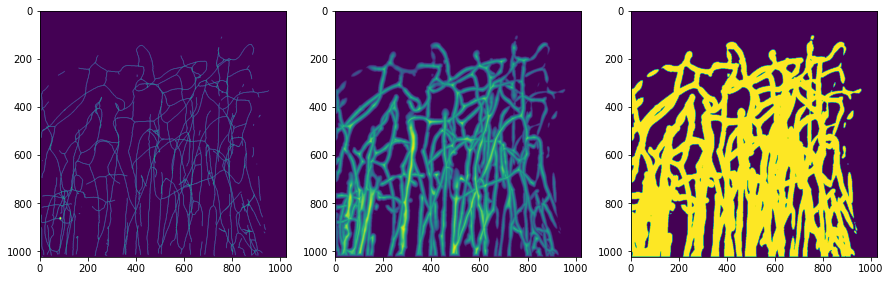

In [5]:
proj_skeleton = itk.maximum_projection_image_filter(skeleton_itk)
#print(proj_skeleton)
np_view_skeleton = itk.array_view_from_image(proj_skeleton)
# print(np_view_skeleton)
proj_dm = itk.maximum_projection_image_filter(dm_itk)
np_view_dm = itk.array_view_from_image(proj_dm)
proj_segm = itk.maximum_projection_image_filter(segm_itk)
np_view_segm = itk.array_view_from_image(proj_segm)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(np_view_skeleton[0])
plt.subplot(1,3,2)
plt.imshow(np_view_dm[0])
plt.subplot(1,3,3)
plt.imshow(np_view_segm[0])
plt.show()

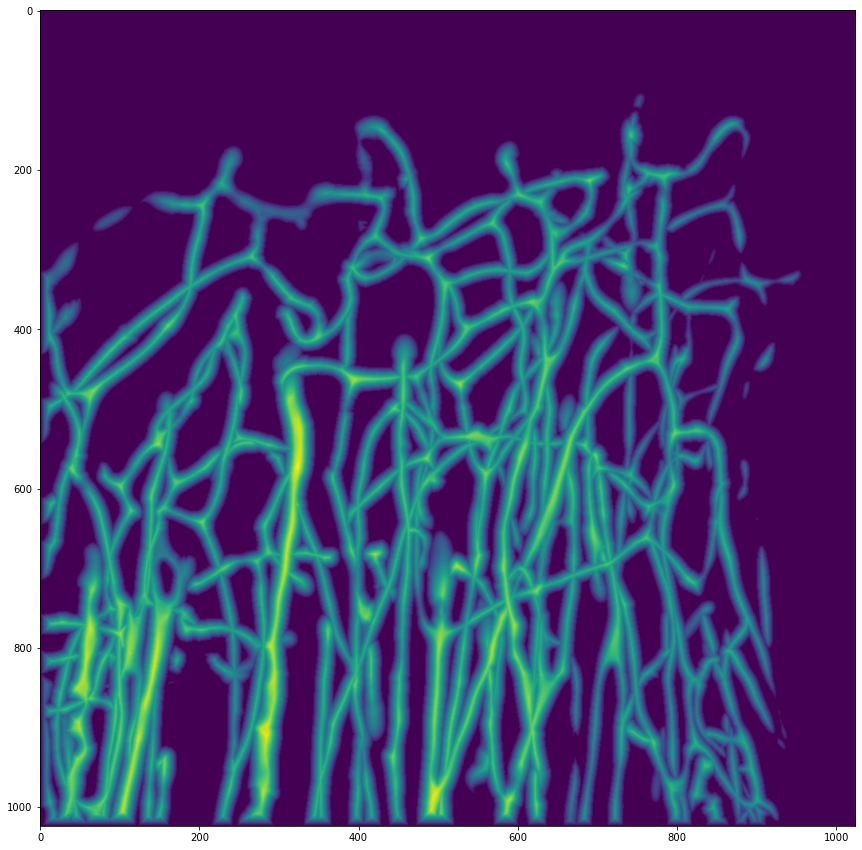

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(np_view_dm[0])
plt.show()


In [10]:
array_skeleton = itk.array_view_from_image(skeleton_itk)
array_dm = itk.array_view_from_image(dm_itk)
array_segm = itk.array_view_from_image(segm_itk)

print(array_skeleton.shape)
print(array_dm.shape)

(446, 1024, 1024)
(446, 1024, 1024)


In [11]:
diam = np.zeros((slices, height, width))

In [14]:
array_skeleton = itk.array_view_from_image(skeleton_itk)
print(array_skeleton.shape)
for y in range(height):
    for x in range(width):
        for z in range(slices):
            skeleton = array_skeleton[z,y,x]
            if skeleton != 0:
                diam[z,y,x] = array_dm[z,y,x]               

(446, 1024, 1024)


In [15]:
print(array_dm.max(),array_dm.min())
print(diam.max(),diam.min())
print(diam.shape)

19.748417 0.0
19.748416900634766 0.0
(446, 1024, 1024)


In [11]:
diam_255 = diam*(255/array_dm.max())
view(diam_255)

RuntimeError: C:\P\IPP\ITK-source\ITK\Modules\Core\Common\include\itkImportImageContainer.hxx:192:
Failed to allocate memory for image.

In [11]:
print(diam_255.max())

NameError: name 'diam_255' is not defined

In [16]:
diam_list = []
for y in range(height):
    for x in range(width):
        for z in range(slices):
            if diam[z,y,x] != 0:
                diam_list.append(diam[z,y,x])
diam_array = np.array(diam_list)
print(diam_array.shape)

(32184,)


In [18]:
import pandas as pd

df = pd.DataFrame(diam_array)
df.to_excel(excel_writer = r"D:\Cecile\Results\Dent saine\P09A_VECAD_dent saine_corne\diam.xlsx")

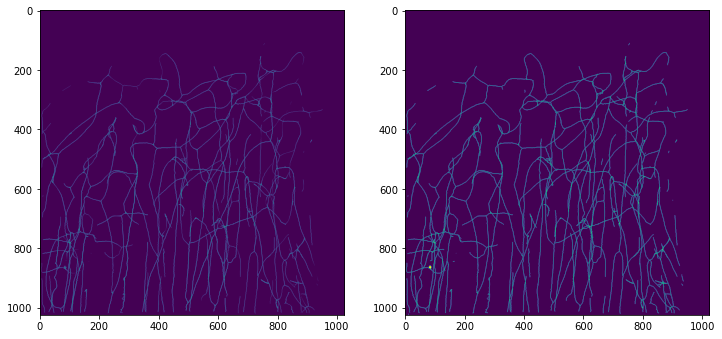

In [19]:
diam_itk = itk.image_from_array(diam)
proj_diam = itk.maximum_projection_image_filter(diam_itk)
# #print(proj_skeleton)
np_view_diam = itk.array_view_from_image(proj_diam)
# # print(np_view_skeleton)
# proj_dm = itk.maximum_projection_image_filter(dm_itk)
# np_view_dm = itk.array_view_from_image(proj_dm)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(np_view_diam[0])
plt.subplot(1,2,2)
plt.imshow(np_view_skeleton[0])
plt.show()

In [16]:
imsave(r"D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\skeleton_diam.tif",diam)

D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\skeleton_diam.tif is a low contrast image


In [20]:
count_diam = 0
for y in range(height):
    for x in range(width):
        for z in range(slices):
            diam_intensity = diam[z,y,x]
            if diam_intensity != 0:
                count_diam = count_diam +1
print(count_diam)

32184


In [21]:
count_skel = 0
for y in range(height):
    for x in range(width):
        for z in range(slices):
            skel_intensity = array_skeleton[z,y,x]
            if skel_intensity != 0:
                count_skel = count_skel+1
print(count_skel)

32184


In [22]:
diam_only = []
for y in range(height):
    for x in range(width):
        for z in range(slices):
            if diam[z,y,x] != 0:
                diam_only.append([z,y,x])

#print(diam_only)
#print(diam[14,3,11])
#print(len(diam_only))
# print(diam_only[2][0])

In [ ]:
#Prendre chaque voxel non nul dans la segmentation et lui assigner la valeur du
#voxel le plus proche dans sqeulette avec les valeurs de diamètres

import math

array_diam_segm = np.zeros((slices, height, width))
maxi = int(diam.max())
print(maxi)
for y in range(800,900):
    for x in range(100):
        for z in range(100):
            segm_intensity = array_segm[z,y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((slices)**2+(height)**2 + (width)**2)
#                 point_diam = (z,y,x)
                print("x,y,z: ", x,y,z)
                for a in range(-maxi, maxi):
                    for b in range(-maxi, maxi):
                        for c in range(-maxi, maxi):
                            if z+c > slices-1 or y+a > height-1:
                                break
                            diam_intensity = diam[z+c,y+a,x+b]
                            if diam_intensity != 0:
                                dist = math.sqrt((c)**2+(a)**2 + (b)**2)
                                if dist < dist_min:
                                    dist_min = dist
                                    intensity = diam[z+c,y+a,x+b]
                                    #print("in:", dist_min, diam[z+c,y+a,x+b], [z+c,y+a,x+b], [c,a,b])
                #print("out:" , dist_min, intensity)
                array_diam_segm[z,y,x] = intensity
                #print(array_diam_segm[z,y,x], [z,y,x])

#                 for k in range (len(diam_only)):
#                     dist = math.sqrt((z - diam_only[k][0])**2+(y - diam_only[k][1])**2 + (x - diam_only[k][2])**2)
#                     if dist < dist_min:
#                         dist_min = dist
#                         point_z = diam_only[k][0]
#                         point_y = diam_only[k][1]
#                         point_x = diam_only[k][2]
#                 print(dist_min, point_diam)
#                 print(diam[point_z,point_y,point_x])
#                 array_diam_segm[z,y,x] = diam[point_z,point_y,point_x]

19
x,y,z:  41 800 37
x,y,z:  41 800 38
x,y,z:  41 800 39
x,y,z:  41 800 40
x,y,z:  41 800 41
x,y,z:  41 800 42
x,y,z:  41 800 43
x,y,z:  41 800 44
x,y,z:  41 800 45
x,y,z:  41 800 46
x,y,z:  41 800 47
x,y,z:  42 800 34
x,y,z:  42 800 35
x,y,z:  42 800 36
x,y,z:  42 800 37
x,y,z:  42 800 38
x,y,z:  42 800 39
x,y,z:  42 800 40
x,y,z:  42 800 41
x,y,z:  42 800 42
x,y,z:  42 800 43
x,y,z:  42 800 44
x,y,z:  42 800 45
x,y,z:  42 800 46
x,y,z:  42 800 47
x,y,z:  42 800 48
x,y,z:  42 800 49
x,y,z:  43 800 32
x,y,z:  43 800 33
x,y,z:  43 800 34
x,y,z:  43 800 35
x,y,z:  43 800 36
x,y,z:  43 800 37
x,y,z:  43 800 38
x,y,z:  43 800 39
x,y,z:  43 800 40
x,y,z:  43 800 41
x,y,z:  43 800 42
x,y,z:  43 800 43
x,y,z:  43 800 44
x,y,z:  43 800 45
x,y,z:  43 800 46
x,y,z:  43 800 47
x,y,z:  43 800 48
x,y,z:  43 800 49
x,y,z:  43 800 50
x,y,z:  43 800 51
x,y,z:  44 800 30
x,y,z:  44 800 31
x,y,z:  44 800 32
x,y,z:  44 800 33
x,y,z:  44 800 34
x,y,z:  44 800 35
x,y,z:  44 800 36
x,y,z:  44 800 37
x,y,z: 

x,y,z:  56 800 45
x,y,z:  56 800 46
x,y,z:  56 800 47
x,y,z:  56 800 48
x,y,z:  56 800 49
x,y,z:  56 800 50
x,y,z:  56 800 51
x,y,z:  56 800 52
x,y,z:  56 800 53
x,y,z:  56 800 54
x,y,z:  56 800 55
x,y,z:  56 800 56
x,y,z:  56 800 57
x,y,z:  56 800 58
x,y,z:  56 800 59
x,y,z:  56 800 60
x,y,z:  57 800 23
x,y,z:  57 800 24
x,y,z:  57 800 25
x,y,z:  57 800 26
x,y,z:  57 800 27
x,y,z:  57 800 28
x,y,z:  57 800 29
x,y,z:  57 800 30
x,y,z:  57 800 31
x,y,z:  57 800 32
x,y,z:  57 800 33
x,y,z:  57 800 34
x,y,z:  57 800 35
x,y,z:  57 800 36
x,y,z:  57 800 37
x,y,z:  57 800 38
x,y,z:  57 800 39
x,y,z:  57 800 40
x,y,z:  57 800 41
x,y,z:  57 800 42
x,y,z:  57 800 43
x,y,z:  57 800 44
x,y,z:  57 800 45
x,y,z:  57 800 46
x,y,z:  57 800 47
x,y,z:  57 800 48
x,y,z:  57 800 49
x,y,z:  57 800 50
x,y,z:  57 800 51
x,y,z:  57 800 52
x,y,z:  57 800 53
x,y,z:  57 800 54
x,y,z:  57 800 55
x,y,z:  57 800 56
x,y,z:  57 800 57
x,y,z:  57 800 58
x,y,z:  57 800 59
x,y,z:  57 800 60
x,y,z:  58 800 23
x,y,z:  58

x,y,z:  68 800 55
x,y,z:  68 800 56
x,y,z:  68 800 57
x,y,z:  68 800 58
x,y,z:  68 800 59
x,y,z:  68 800 60
x,y,z:  68 800 61
x,y,z:  69 800 28
x,y,z:  69 800 29
x,y,z:  69 800 30
x,y,z:  69 800 31
x,y,z:  69 800 32
x,y,z:  69 800 33
x,y,z:  69 800 34
x,y,z:  69 800 35
x,y,z:  69 800 36
x,y,z:  69 800 37
x,y,z:  69 800 38
x,y,z:  69 800 39
x,y,z:  69 800 40
x,y,z:  69 800 41
x,y,z:  69 800 42
x,y,z:  69 800 43
x,y,z:  69 800 44
x,y,z:  69 800 45
x,y,z:  69 800 46
x,y,z:  69 800 47
x,y,z:  69 800 48
x,y,z:  69 800 49
x,y,z:  69 800 50
x,y,z:  69 800 51
x,y,z:  69 800 52
x,y,z:  69 800 53
x,y,z:  69 800 54
x,y,z:  69 800 55
x,y,z:  69 800 56
x,y,z:  69 800 57
x,y,z:  69 800 58
x,y,z:  69 800 59
x,y,z:  69 800 60
x,y,z:  69 800 61
x,y,z:  70 800 29
x,y,z:  70 800 30
x,y,z:  70 800 31
x,y,z:  70 800 32
x,y,z:  70 800 33
x,y,z:  70 800 34
x,y,z:  70 800 35
x,y,z:  70 800 36
x,y,z:  70 800 37
x,y,z:  70 800 38
x,y,z:  70 800 39
x,y,z:  70 800 40
x,y,z:  70 800 41
x,y,z:  70 800 42
x,y,z:  70

x,y,z:  47 801 46
x,y,z:  47 801 47
x,y,z:  47 801 48
x,y,z:  47 801 49
x,y,z:  47 801 50
x,y,z:  47 801 51
x,y,z:  47 801 52
x,y,z:  47 801 53
x,y,z:  47 801 54
x,y,z:  47 801 55
x,y,z:  47 801 56
x,y,z:  48 801 26
x,y,z:  48 801 27
x,y,z:  48 801 28
x,y,z:  48 801 29
x,y,z:  48 801 30
x,y,z:  48 801 31
x,y,z:  48 801 32
x,y,z:  48 801 33
x,y,z:  48 801 34
x,y,z:  48 801 35
x,y,z:  48 801 36
x,y,z:  48 801 37
x,y,z:  48 801 38
x,y,z:  48 801 39
x,y,z:  48 801 40
x,y,z:  48 801 41
x,y,z:  48 801 42
x,y,z:  48 801 43
x,y,z:  48 801 44
x,y,z:  48 801 45
x,y,z:  48 801 46
x,y,z:  48 801 47
x,y,z:  48 801 48
x,y,z:  48 801 49
x,y,z:  48 801 50
x,y,z:  48 801 51
x,y,z:  48 801 52
x,y,z:  48 801 53
x,y,z:  48 801 54
x,y,z:  48 801 55
x,y,z:  48 801 56
x,y,z:  48 801 57
x,y,z:  49 801 25
x,y,z:  49 801 26
x,y,z:  49 801 27
x,y,z:  49 801 28
x,y,z:  49 801 29
x,y,z:  49 801 30
x,y,z:  49 801 31
x,y,z:  49 801 32
x,y,z:  49 801 33
x,y,z:  49 801 34
x,y,z:  49 801 35
x,y,z:  49 801 36
x,y,z:  49

x,y,z:  60 801 31
x,y,z:  60 801 32
x,y,z:  60 801 33
x,y,z:  60 801 34
x,y,z:  60 801 35
x,y,z:  60 801 36
x,y,z:  60 801 37
x,y,z:  60 801 38
x,y,z:  60 801 39
x,y,z:  60 801 40
x,y,z:  60 801 41
x,y,z:  60 801 42
x,y,z:  60 801 43
x,y,z:  60 801 44
x,y,z:  60 801 45
x,y,z:  60 801 46
x,y,z:  60 801 47
x,y,z:  60 801 48
x,y,z:  60 801 49
x,y,z:  60 801 50
x,y,z:  60 801 51
x,y,z:  60 801 52
x,y,z:  60 801 53
x,y,z:  60 801 54
x,y,z:  60 801 55
x,y,z:  60 801 56
x,y,z:  60 801 57
x,y,z:  60 801 58
x,y,z:  60 801 59
x,y,z:  60 801 60
x,y,z:  60 801 61
x,y,z:  61 801 24
x,y,z:  61 801 25
x,y,z:  61 801 26
x,y,z:  61 801 27
x,y,z:  61 801 28
x,y,z:  61 801 29
x,y,z:  61 801 30
x,y,z:  61 801 31
x,y,z:  61 801 32
x,y,z:  61 801 33
x,y,z:  61 801 34
x,y,z:  61 801 35
x,y,z:  61 801 36
x,y,z:  61 801 37
x,y,z:  61 801 38
x,y,z:  61 801 39
x,y,z:  61 801 40
x,y,z:  61 801 41
x,y,z:  61 801 42
x,y,z:  61 801 43
x,y,z:  61 801 44
x,y,z:  61 801 45
x,y,z:  61 801 46
x,y,z:  61 801 47
x,y,z:  61

x,y,z:  73 801 38
x,y,z:  73 801 39
x,y,z:  73 801 40
x,y,z:  73 801 41
x,y,z:  73 801 42
x,y,z:  73 801 43
x,y,z:  73 801 44
x,y,z:  73 801 45
x,y,z:  73 801 46
x,y,z:  73 801 47
x,y,z:  73 801 48
x,y,z:  73 801 49
x,y,z:  73 801 50
x,y,z:  73 801 51
x,y,z:  73 801 52
x,y,z:  73 801 53
x,y,z:  73 801 54
x,y,z:  73 801 55
x,y,z:  73 801 56
x,y,z:  73 801 57
x,y,z:  73 801 58
x,y,z:  73 801 59
x,y,z:  74 801 33
x,y,z:  74 801 34
x,y,z:  74 801 35
x,y,z:  74 801 36
x,y,z:  74 801 37
x,y,z:  74 801 38
x,y,z:  74 801 39
x,y,z:  74 801 40
x,y,z:  74 801 41
x,y,z:  74 801 42
x,y,z:  74 801 43
x,y,z:  74 801 44
x,y,z:  74 801 45
x,y,z:  74 801 46
x,y,z:  74 801 47
x,y,z:  74 801 48
x,y,z:  74 801 49
x,y,z:  74 801 50
x,y,z:  74 801 51
x,y,z:  74 801 52
x,y,z:  74 801 53
x,y,z:  74 801 54
x,y,z:  74 801 55
x,y,z:  74 801 56
x,y,z:  74 801 57
x,y,z:  74 801 58
x,y,z:  74 801 59
x,y,z:  75 801 34
x,y,z:  75 801 35
x,y,z:  75 801 36
x,y,z:  75 801 37
x,y,z:  75 801 38
x,y,z:  75 801 39
x,y,z:  75

x,y,z:  51 802 57
x,y,z:  51 802 58
x,y,z:  51 802 59
x,y,z:  52 802 24
x,y,z:  52 802 25
x,y,z:  52 802 26
x,y,z:  52 802 27
x,y,z:  52 802 28
x,y,z:  52 802 29
x,y,z:  52 802 30
x,y,z:  52 802 31
x,y,z:  52 802 32
x,y,z:  52 802 33
x,y,z:  52 802 34
x,y,z:  52 802 35
x,y,z:  52 802 36
x,y,z:  52 802 37
x,y,z:  52 802 38
x,y,z:  52 802 39
x,y,z:  52 802 40
x,y,z:  52 802 41
x,y,z:  52 802 42
x,y,z:  52 802 43
x,y,z:  52 802 44
x,y,z:  52 802 45
x,y,z:  52 802 46
x,y,z:  52 802 47
x,y,z:  52 802 48
x,y,z:  52 802 49
x,y,z:  52 802 50
x,y,z:  52 802 51
x,y,z:  52 802 52
x,y,z:  52 802 53
x,y,z:  52 802 54
x,y,z:  52 802 55
x,y,z:  52 802 56
x,y,z:  52 802 57
x,y,z:  52 802 58
x,y,z:  52 802 59
x,y,z:  52 802 60
x,y,z:  53 802 24
x,y,z:  53 802 25
x,y,z:  53 802 26
x,y,z:  53 802 27
x,y,z:  53 802 28
x,y,z:  53 802 29
x,y,z:  53 802 30
x,y,z:  53 802 31
x,y,z:  53 802 32
x,y,z:  53 802 33
x,y,z:  53 802 34
x,y,z:  53 802 35
x,y,z:  53 802 36
x,y,z:  53 802 37
x,y,z:  53 802 38
x,y,z:  53

x,y,z:  63 802 59
x,y,z:  63 802 60
x,y,z:  63 802 61
x,y,z:  63 802 62
x,y,z:  64 802 25
x,y,z:  64 802 26
x,y,z:  64 802 27
x,y,z:  64 802 28
x,y,z:  64 802 29
x,y,z:  64 802 30
x,y,z:  64 802 31
x,y,z:  64 802 32
x,y,z:  64 802 33
x,y,z:  64 802 34
x,y,z:  64 802 35
x,y,z:  64 802 36
x,y,z:  64 802 37
x,y,z:  64 802 38
x,y,z:  64 802 39
x,y,z:  64 802 40
x,y,z:  64 802 41
x,y,z:  64 802 42
x,y,z:  64 802 43
x,y,z:  64 802 44
x,y,z:  64 802 45
x,y,z:  64 802 46
x,y,z:  64 802 47
x,y,z:  64 802 48
x,y,z:  64 802 49
x,y,z:  64 802 50
x,y,z:  64 802 51
x,y,z:  64 802 52
x,y,z:  64 802 53
x,y,z:  64 802 54
x,y,z:  64 802 55
x,y,z:  64 802 56
x,y,z:  64 802 57
x,y,z:  64 802 58
x,y,z:  64 802 59
x,y,z:  64 802 60
x,y,z:  64 802 61
x,y,z:  64 802 62
x,y,z:  65 802 26
x,y,z:  65 802 27
x,y,z:  65 802 28
x,y,z:  65 802 29
x,y,z:  65 802 30
x,y,z:  65 802 31
x,y,z:  65 802 32
x,y,z:  65 802 33
x,y,z:  65 802 34
x,y,z:  65 802 35
x,y,z:  65 802 36
x,y,z:  65 802 37
x,y,z:  65 802 38
x,y,z:  65

x,y,z:  79 802 42
x,y,z:  79 802 43
x,y,z:  79 802 44
x,y,z:  79 802 45
x,y,z:  79 802 46
x,y,z:  79 802 47
x,y,z:  79 802 48
x,y,z:  79 802 49
x,y,z:  79 802 50
x,y,z:  79 802 51
x,y,z:  79 802 52
x,y,z:  79 802 53
x,y,z:  80 802 42
x,y,z:  80 802 43
x,y,z:  80 802 44
x,y,z:  80 802 45
x,y,z:  80 802 46
x,y,z:  80 802 47
x,y,z:  80 802 48
x,y,z:  80 802 49
x,y,z:  80 802 50
x,y,z:  41 803 37
x,y,z:  41 803 38
x,y,z:  41 803 39
x,y,z:  41 803 40
x,y,z:  41 803 41
x,y,z:  41 803 42
x,y,z:  41 803 43
x,y,z:  41 803 44
x,y,z:  41 803 45
x,y,z:  41 803 46
x,y,z:  41 803 47
x,y,z:  41 803 48
x,y,z:  41 803 49
x,y,z:  42 803 35
x,y,z:  42 803 36
x,y,z:  42 803 37
x,y,z:  42 803 38
x,y,z:  42 803 39
x,y,z:  42 803 40
x,y,z:  42 803 41
x,y,z:  42 803 42
x,y,z:  42 803 43
x,y,z:  42 803 44
x,y,z:  42 803 45
x,y,z:  42 803 46
x,y,z:  42 803 47
x,y,z:  42 803 48
x,y,z:  42 803 49
x,y,z:  42 803 50
x,y,z:  42 803 51
x,y,z:  43 803 33
x,y,z:  43 803 34
x,y,z:  43 803 35
x,y,z:  43 803 36
x,y,z:  43

x,y,z:  55 803 46
x,y,z:  55 803 47
x,y,z:  55 803 48
x,y,z:  55 803 49
x,y,z:  55 803 50
x,y,z:  55 803 51
x,y,z:  55 803 52
x,y,z:  55 803 53
x,y,z:  55 803 54
x,y,z:  55 803 55
x,y,z:  55 803 56
x,y,z:  55 803 57
x,y,z:  55 803 58
x,y,z:  55 803 59
x,y,z:  55 803 60
x,y,z:  55 803 61
x,y,z:  56 803 24
x,y,z:  56 803 25
x,y,z:  56 803 26
x,y,z:  56 803 27
x,y,z:  56 803 28
x,y,z:  56 803 29
x,y,z:  56 803 30
x,y,z:  56 803 31
x,y,z:  56 803 32
x,y,z:  56 803 33
x,y,z:  56 803 34
x,y,z:  56 803 35
x,y,z:  56 803 36
x,y,z:  56 803 37
x,y,z:  56 803 38
x,y,z:  56 803 39
x,y,z:  56 803 40
x,y,z:  56 803 41
x,y,z:  56 803 42
x,y,z:  56 803 43
x,y,z:  56 803 44
x,y,z:  56 803 45
x,y,z:  56 803 46
x,y,z:  56 803 47
x,y,z:  56 803 48
x,y,z:  56 803 49
x,y,z:  56 803 50
x,y,z:  56 803 51
x,y,z:  56 803 52
x,y,z:  56 803 53
x,y,z:  56 803 54
x,y,z:  56 803 55
x,y,z:  56 803 56
x,y,z:  56 803 57
x,y,z:  56 803 58
x,y,z:  56 803 59
x,y,z:  56 803 60
x,y,z:  56 803 61
x,y,z:  56 803 62
x,y,z:  57

x,y,z:  67 803 46
x,y,z:  67 803 47
x,y,z:  67 803 48
x,y,z:  67 803 49
x,y,z:  67 803 50
x,y,z:  67 803 51
x,y,z:  67 803 52
x,y,z:  67 803 53
x,y,z:  67 803 54
x,y,z:  67 803 55
x,y,z:  67 803 56
x,y,z:  67 803 57
x,y,z:  67 803 58
x,y,z:  67 803 59
x,y,z:  67 803 60
x,y,z:  67 803 61
x,y,z:  67 803 62
x,y,z:  68 803 28
x,y,z:  68 803 29
x,y,z:  68 803 30
x,y,z:  68 803 31
x,y,z:  68 803 32
x,y,z:  68 803 33
x,y,z:  68 803 34
x,y,z:  68 803 35
x,y,z:  68 803 36
x,y,z:  68 803 37
x,y,z:  68 803 38
x,y,z:  68 803 39
x,y,z:  68 803 40
x,y,z:  68 803 41
x,y,z:  68 803 42
x,y,z:  68 803 43
x,y,z:  68 803 44
x,y,z:  68 803 45
x,y,z:  68 803 46
x,y,z:  68 803 47
x,y,z:  68 803 48
x,y,z:  68 803 49
x,y,z:  68 803 50
x,y,z:  68 803 51
x,y,z:  68 803 52
x,y,z:  68 803 53
x,y,z:  68 803 54
x,y,z:  68 803 55
x,y,z:  68 803 56
x,y,z:  68 803 57
x,y,z:  68 803 58
x,y,z:  68 803 59
x,y,z:  68 803 60
x,y,z:  68 803 61
x,y,z:  69 803 29
x,y,z:  69 803 30
x,y,z:  69 803 31
x,y,z:  69 803 32
x,y,z:  69

x,y,z:  46 804 50
x,y,z:  46 804 51
x,y,z:  46 804 52
x,y,z:  46 804 53
x,y,z:  46 804 54
x,y,z:  46 804 55
x,y,z:  46 804 56
x,y,z:  46 804 57
x,y,z:  47 804 27
x,y,z:  47 804 28
x,y,z:  47 804 29
x,y,z:  47 804 30
x,y,z:  47 804 31
x,y,z:  47 804 32
x,y,z:  47 804 33
x,y,z:  47 804 34
x,y,z:  47 804 35
x,y,z:  47 804 36
x,y,z:  47 804 37
x,y,z:  47 804 38
x,y,z:  47 804 39
x,y,z:  47 804 40
x,y,z:  47 804 41
x,y,z:  47 804 42
x,y,z:  47 804 43
x,y,z:  47 804 44
x,y,z:  47 804 45
x,y,z:  47 804 46
x,y,z:  47 804 47
x,y,z:  47 804 48
x,y,z:  47 804 49
x,y,z:  47 804 50
x,y,z:  47 804 51
x,y,z:  47 804 52
x,y,z:  47 804 53
x,y,z:  47 804 54
x,y,z:  47 804 55
x,y,z:  47 804 56
x,y,z:  47 804 57
x,y,z:  47 804 58
x,y,z:  48 804 27
x,y,z:  48 804 28
x,y,z:  48 804 29
x,y,z:  48 804 30
x,y,z:  48 804 31
x,y,z:  48 804 32
x,y,z:  48 804 33
x,y,z:  48 804 34
x,y,z:  48 804 35
x,y,z:  48 804 36
x,y,z:  48 804 37
x,y,z:  48 804 38
x,y,z:  48 804 39
x,y,z:  48 804 40
x,y,z:  48 804 41
x,y,z:  48

x,y,z:  59 804 35
x,y,z:  59 804 36
x,y,z:  59 804 37
x,y,z:  59 804 38
x,y,z:  59 804 39
x,y,z:  59 804 40
x,y,z:  59 804 41
x,y,z:  59 804 42
x,y,z:  59 804 43
x,y,z:  59 804 44
x,y,z:  59 804 45
x,y,z:  59 804 46
x,y,z:  59 804 47
x,y,z:  59 804 48
x,y,z:  59 804 49
x,y,z:  59 804 50
x,y,z:  59 804 51
x,y,z:  59 804 52
x,y,z:  59 804 53
x,y,z:  59 804 54
x,y,z:  59 804 55
x,y,z:  59 804 56
x,y,z:  59 804 57
x,y,z:  59 804 58
x,y,z:  59 804 59
x,y,z:  59 804 60
x,y,z:  59 804 61
x,y,z:  59 804 62
x,y,z:  60 804 24
x,y,z:  60 804 25
x,y,z:  60 804 26
x,y,z:  60 804 27
x,y,z:  60 804 28
x,y,z:  60 804 29
x,y,z:  60 804 30
x,y,z:  60 804 31
x,y,z:  60 804 32
x,y,z:  60 804 33
x,y,z:  60 804 34
x,y,z:  60 804 35
x,y,z:  60 804 36
x,y,z:  60 804 37
x,y,z:  60 804 38
x,y,z:  60 804 39
x,y,z:  60 804 40
x,y,z:  60 804 41
x,y,z:  60 804 42
x,y,z:  60 804 43
x,y,z:  60 804 44
x,y,z:  60 804 45
x,y,z:  60 804 46
x,y,z:  60 804 47
x,y,z:  60 804 48
x,y,z:  60 804 49
x,y,z:  60 804 50
x,y,z:  60

x,y,z:  72 804 37
x,y,z:  72 804 38
x,y,z:  72 804 39
x,y,z:  72 804 40
x,y,z:  72 804 41
x,y,z:  72 804 42
x,y,z:  72 804 43
x,y,z:  72 804 44
x,y,z:  72 804 45
x,y,z:  72 804 46
x,y,z:  72 804 47
x,y,z:  72 804 48
x,y,z:  72 804 49
x,y,z:  72 804 50
x,y,z:  72 804 51
x,y,z:  72 804 52
x,y,z:  72 804 53
x,y,z:  72 804 54
x,y,z:  72 804 55
x,y,z:  72 804 56
x,y,z:  72 804 57
x,y,z:  72 804 58
x,y,z:  72 804 59
x,y,z:  72 804 60
x,y,z:  73 804 33
x,y,z:  73 804 34
x,y,z:  73 804 35
x,y,z:  73 804 36
x,y,z:  73 804 37
x,y,z:  73 804 38
x,y,z:  73 804 39
x,y,z:  73 804 40
x,y,z:  73 804 41
x,y,z:  73 804 42
x,y,z:  73 804 43
x,y,z:  73 804 44
x,y,z:  73 804 45
x,y,z:  73 804 46
x,y,z:  73 804 47
x,y,z:  73 804 48
x,y,z:  73 804 49
x,y,z:  73 804 50
x,y,z:  73 804 51
x,y,z:  73 804 52
x,y,z:  73 804 53
x,y,z:  73 804 54
x,y,z:  73 804 55
x,y,z:  73 804 56
x,y,z:  73 804 57
x,y,z:  73 804 58
x,y,z:  73 804 59
x,y,z:  74 804 34
x,y,z:  74 804 35
x,y,z:  74 804 36
x,y,z:  74 804 37
x,y,z:  74

x,y,z:  51 805 41
x,y,z:  51 805 42
x,y,z:  51 805 43
x,y,z:  51 805 44
x,y,z:  51 805 45
x,y,z:  51 805 46
x,y,z:  51 805 47
x,y,z:  51 805 48
x,y,z:  51 805 49
x,y,z:  51 805 50
x,y,z:  51 805 51
x,y,z:  51 805 52
x,y,z:  51 805 53
x,y,z:  51 805 54
x,y,z:  51 805 55
x,y,z:  51 805 56
x,y,z:  51 805 57
x,y,z:  51 805 58
x,y,z:  51 805 59
x,y,z:  51 805 60
x,y,z:  51 805 61
x,y,z:  52 805 25
x,y,z:  52 805 26
x,y,z:  52 805 27
x,y,z:  52 805 28
x,y,z:  52 805 29
x,y,z:  52 805 30
x,y,z:  52 805 31
x,y,z:  52 805 32
x,y,z:  52 805 33
x,y,z:  52 805 34
x,y,z:  52 805 35
x,y,z:  52 805 36
x,y,z:  52 805 37
x,y,z:  52 805 38
x,y,z:  52 805 39
x,y,z:  52 805 40
x,y,z:  52 805 41
x,y,z:  52 805 42
x,y,z:  52 805 43
x,y,z:  52 805 44
x,y,z:  52 805 45
x,y,z:  52 805 46
x,y,z:  52 805 47
x,y,z:  52 805 48
x,y,z:  52 805 49
x,y,z:  52 805 50
x,y,z:  52 805 51
x,y,z:  52 805 52
x,y,z:  52 805 53
x,y,z:  52 805 54
x,y,z:  52 805 55
x,y,z:  52 805 56
x,y,z:  52 805 57
x,y,z:  52 805 58
x,y,z:  52

x,y,z:  63 805 37
x,y,z:  63 805 38
x,y,z:  63 805 39
x,y,z:  63 805 40
x,y,z:  63 805 41
x,y,z:  63 805 42
x,y,z:  63 805 43
x,y,z:  63 805 44
x,y,z:  63 805 45
x,y,z:  63 805 46
x,y,z:  63 805 47
x,y,z:  63 805 48
x,y,z:  63 805 49
x,y,z:  63 805 50
x,y,z:  63 805 51
x,y,z:  63 805 52
x,y,z:  63 805 53
x,y,z:  63 805 54
x,y,z:  63 805 55
x,y,z:  63 805 56
x,y,z:  63 805 57
x,y,z:  63 805 58
x,y,z:  63 805 59
x,y,z:  63 805 60
x,y,z:  63 805 61
x,y,z:  63 805 62
x,y,z:  63 805 63
x,y,z:  64 805 26
x,y,z:  64 805 27
x,y,z:  64 805 28
x,y,z:  64 805 29
x,y,z:  64 805 30
x,y,z:  64 805 31
x,y,z:  64 805 32
x,y,z:  64 805 33
x,y,z:  64 805 34
x,y,z:  64 805 35
x,y,z:  64 805 36
x,y,z:  64 805 37
x,y,z:  64 805 38
x,y,z:  64 805 39
x,y,z:  64 805 40
x,y,z:  64 805 41
x,y,z:  64 805 42
x,y,z:  64 805 43
x,y,z:  64 805 44
x,y,z:  64 805 45
x,y,z:  64 805 46
x,y,z:  64 805 47
x,y,z:  64 805 48
x,y,z:  64 805 49
x,y,z:  64 805 50
x,y,z:  64 805 51
x,y,z:  64 805 52
x,y,z:  64 805 53
x,y,z:  64

x,y,z:  78 805 53
x,y,z:  79 805 41
x,y,z:  79 805 42
x,y,z:  79 805 43
x,y,z:  79 805 44
x,y,z:  79 805 45
x,y,z:  79 805 46
x,y,z:  79 805 47
x,y,z:  79 805 48
x,y,z:  79 805 49
x,y,z:  79 805 50
x,y,z:  79 805 51
x,y,z:  80 805 45
x,y,z:  80 805 46
x,y,z:  80 805 47
x,y,z:  40 806 44
x,y,z:  40 806 45
x,y,z:  41 806 38
x,y,z:  41 806 39
x,y,z:  41 806 40
x,y,z:  41 806 41
x,y,z:  41 806 42
x,y,z:  41 806 43
x,y,z:  41 806 44
x,y,z:  41 806 45
x,y,z:  41 806 46
x,y,z:  41 806 47
x,y,z:  41 806 48
x,y,z:  41 806 49
x,y,z:  41 806 50
x,y,z:  42 806 35
x,y,z:  42 806 36
x,y,z:  42 806 37
x,y,z:  42 806 38
x,y,z:  42 806 39
x,y,z:  42 806 40
x,y,z:  42 806 41
x,y,z:  42 806 42
x,y,z:  42 806 43
x,y,z:  42 806 44
x,y,z:  42 806 45
x,y,z:  42 806 46
x,y,z:  42 806 47
x,y,z:  42 806 48
x,y,z:  42 806 49
x,y,z:  42 806 50
x,y,z:  42 806 51
x,y,z:  42 806 52
x,y,z:  43 806 33
x,y,z:  43 806 34
x,y,z:  43 806 35
x,y,z:  43 806 36
x,y,z:  43 806 37
x,y,z:  43 806 38
x,y,z:  43 806 39
x,y,z:  43

x,y,z:  55 806 37
x,y,z:  55 806 38
x,y,z:  55 806 39
x,y,z:  55 806 40
x,y,z:  55 806 41
x,y,z:  55 806 42
x,y,z:  55 806 43
x,y,z:  55 806 44
x,y,z:  55 806 45
x,y,z:  55 806 46
x,y,z:  55 806 47
x,y,z:  55 806 48
x,y,z:  55 806 49
x,y,z:  55 806 50
x,y,z:  55 806 51
x,y,z:  55 806 52
x,y,z:  55 806 53
x,y,z:  55 806 54
x,y,z:  55 806 55
x,y,z:  55 806 56
x,y,z:  55 806 57
x,y,z:  55 806 58
x,y,z:  55 806 59
x,y,z:  55 806 60
x,y,z:  55 806 61
x,y,z:  55 806 62
x,y,z:  55 806 63
x,y,z:  56 806 24
x,y,z:  56 806 25
x,y,z:  56 806 26
x,y,z:  56 806 27
x,y,z:  56 806 28
x,y,z:  56 806 29
x,y,z:  56 806 30
x,y,z:  56 806 31
x,y,z:  56 806 32
x,y,z:  56 806 33
x,y,z:  56 806 34
x,y,z:  56 806 35
x,y,z:  56 806 36
x,y,z:  56 806 37
x,y,z:  56 806 38
x,y,z:  56 806 39
x,y,z:  56 806 40
x,y,z:  56 806 41
x,y,z:  56 806 42
x,y,z:  56 806 43
x,y,z:  56 806 44
x,y,z:  56 806 45
x,y,z:  56 806 46
x,y,z:  56 806 47
x,y,z:  56 806 48
x,y,z:  56 806 49
x,y,z:  56 806 50
x,y,z:  56 806 51
x,y,z:  56

x,y,z:  66 806 63
x,y,z:  67 806 28
x,y,z:  67 806 29
x,y,z:  67 806 30
x,y,z:  67 806 31
x,y,z:  67 806 32
x,y,z:  67 806 33
x,y,z:  67 806 34
x,y,z:  67 806 35
x,y,z:  67 806 36
x,y,z:  67 806 37
x,y,z:  67 806 38
x,y,z:  67 806 39
x,y,z:  67 806 40
x,y,z:  67 806 41
x,y,z:  67 806 42
x,y,z:  67 806 43
x,y,z:  67 806 44
x,y,z:  67 806 45
x,y,z:  67 806 46
x,y,z:  67 806 47
x,y,z:  67 806 48
x,y,z:  67 806 49
x,y,z:  67 806 50
x,y,z:  67 806 51
x,y,z:  67 806 52
x,y,z:  67 806 53
x,y,z:  67 806 54
x,y,z:  67 806 55
x,y,z:  67 806 56
x,y,z:  67 806 57
x,y,z:  67 806 58
x,y,z:  67 806 59
x,y,z:  67 806 60
x,y,z:  67 806 61
x,y,z:  67 806 62
x,y,z:  68 806 28
x,y,z:  68 806 29
x,y,z:  68 806 30
x,y,z:  68 806 31
x,y,z:  68 806 32
x,y,z:  68 806 33
x,y,z:  68 806 34
x,y,z:  68 806 35
x,y,z:  68 806 36
x,y,z:  68 806 37
x,y,z:  68 806 38
x,y,z:  68 806 39
x,y,z:  68 806 40
x,y,z:  68 806 41
x,y,z:  68 806 42
x,y,z:  68 806 43
x,y,z:  68 806 44
x,y,z:  68 806 45
x,y,z:  68 806 46
x,y,z:  68

x,y,z:  46 807 47
x,y,z:  46 807 48
x,y,z:  46 807 49
x,y,z:  46 807 50
x,y,z:  46 807 51
x,y,z:  46 807 52
x,y,z:  46 807 53
x,y,z:  46 807 54
x,y,z:  46 807 55
x,y,z:  46 807 56
x,y,z:  46 807 57
x,y,z:  46 807 58
x,y,z:  46 807 59
x,y,z:  47 807 28
x,y,z:  47 807 29
x,y,z:  47 807 30
x,y,z:  47 807 31
x,y,z:  47 807 32
x,y,z:  47 807 33
x,y,z:  47 807 34
x,y,z:  47 807 35
x,y,z:  47 807 36
x,y,z:  47 807 37
x,y,z:  47 807 38
x,y,z:  47 807 39
x,y,z:  47 807 40
x,y,z:  47 807 41
x,y,z:  47 807 42
x,y,z:  47 807 43
x,y,z:  47 807 44
x,y,z:  47 807 45
x,y,z:  47 807 46
x,y,z:  47 807 47
x,y,z:  47 807 48
x,y,z:  47 807 49
x,y,z:  47 807 50
x,y,z:  47 807 51
x,y,z:  47 807 52
x,y,z:  47 807 53
x,y,z:  47 807 54
x,y,z:  47 807 55
x,y,z:  47 807 56
x,y,z:  47 807 57
x,y,z:  47 807 58
x,y,z:  47 807 59
x,y,z:  48 807 27
x,y,z:  48 807 28
x,y,z:  48 807 29
x,y,z:  48 807 30
x,y,z:  48 807 31
x,y,z:  48 807 32
x,y,z:  48 807 33
x,y,z:  48 807 34
x,y,z:  48 807 35
x,y,z:  48 807 36
x,y,z:  48

x,y,z:  58 807 53
x,y,z:  58 807 54
x,y,z:  58 807 55
x,y,z:  58 807 56
x,y,z:  58 807 57
x,y,z:  58 807 58
x,y,z:  58 807 59
x,y,z:  58 807 60
x,y,z:  58 807 61
x,y,z:  58 807 62
x,y,z:  58 807 63
x,y,z:  58 807 64
x,y,z:  59 807 24
x,y,z:  59 807 25
x,y,z:  59 807 26
x,y,z:  59 807 27
x,y,z:  59 807 28
x,y,z:  59 807 29
x,y,z:  59 807 30
x,y,z:  59 807 31
x,y,z:  59 807 32
x,y,z:  59 807 33
x,y,z:  59 807 34
x,y,z:  59 807 35
x,y,z:  59 807 36
x,y,z:  59 807 37
x,y,z:  59 807 38
x,y,z:  59 807 39
x,y,z:  59 807 40
x,y,z:  59 807 41
x,y,z:  59 807 42
x,y,z:  59 807 43
x,y,z:  59 807 44
x,y,z:  59 807 45
x,y,z:  59 807 46
x,y,z:  59 807 47
x,y,z:  59 807 48
x,y,z:  59 807 49
x,y,z:  59 807 50
x,y,z:  59 807 51
x,y,z:  59 807 52
x,y,z:  59 807 53
x,y,z:  59 807 54
x,y,z:  59 807 55
x,y,z:  59 807 56
x,y,z:  59 807 57
x,y,z:  59 807 58
x,y,z:  59 807 59
x,y,z:  59 807 60
x,y,z:  59 807 61
x,y,z:  59 807 62
x,y,z:  59 807 63
x,y,z:  59 807 64
x,y,z:  60 807 25
x,y,z:  60 807 26
x,y,z:  60

x,y,z:  70 807 59
x,y,z:  70 807 60
x,y,z:  70 807 61
x,y,z:  71 807 31
x,y,z:  71 807 32
x,y,z:  71 807 33
x,y,z:  71 807 34
x,y,z:  71 807 35
x,y,z:  71 807 36
x,y,z:  71 807 37
x,y,z:  71 807 38
x,y,z:  71 807 39
x,y,z:  71 807 40
x,y,z:  71 807 41
x,y,z:  71 807 42
x,y,z:  71 807 43
x,y,z:  71 807 44
x,y,z:  71 807 45
x,y,z:  71 807 46
x,y,z:  71 807 47
x,y,z:  71 807 48
x,y,z:  71 807 49
x,y,z:  71 807 50
x,y,z:  71 807 51
x,y,z:  71 807 52
x,y,z:  71 807 53
x,y,z:  71 807 54
x,y,z:  71 807 55
x,y,z:  71 807 56
x,y,z:  71 807 57
x,y,z:  71 807 58
x,y,z:  71 807 59
x,y,z:  71 807 60
x,y,z:  71 807 61
x,y,z:  72 807 32
x,y,z:  72 807 33
x,y,z:  72 807 34
x,y,z:  72 807 35
x,y,z:  72 807 36
x,y,z:  72 807 37
x,y,z:  72 807 38
x,y,z:  72 807 39
x,y,z:  72 807 40
x,y,z:  72 807 41
x,y,z:  72 807 42
x,y,z:  72 807 43
x,y,z:  72 807 44
x,y,z:  72 807 45
x,y,z:  72 807 46
x,y,z:  72 807 47
x,y,z:  72 807 48
x,y,z:  72 807 49
x,y,z:  72 807 50
x,y,z:  72 807 51
x,y,z:  72 807 52
x,y,z:  72

x,y,z:  50 808 44
x,y,z:  50 808 45
x,y,z:  50 808 46
x,y,z:  50 808 47
x,y,z:  50 808 48
x,y,z:  50 808 49
x,y,z:  50 808 50
x,y,z:  50 808 51
x,y,z:  50 808 52
x,y,z:  50 808 53
x,y,z:  50 808 54
x,y,z:  50 808 55
x,y,z:  50 808 56
x,y,z:  50 808 57
x,y,z:  50 808 58
x,y,z:  50 808 59
x,y,z:  50 808 60
x,y,z:  50 808 61
x,y,z:  50 808 62
x,y,z:  51 808 26
x,y,z:  51 808 27
x,y,z:  51 808 28
x,y,z:  51 808 29
x,y,z:  51 808 30
x,y,z:  51 808 31
x,y,z:  51 808 32
x,y,z:  51 808 33
x,y,z:  51 808 34
x,y,z:  51 808 35
x,y,z:  51 808 36
x,y,z:  51 808 37
x,y,z:  51 808 38
x,y,z:  51 808 39
x,y,z:  51 808 40
x,y,z:  51 808 41
x,y,z:  51 808 42
x,y,z:  51 808 43
x,y,z:  51 808 44
x,y,z:  51 808 45
x,y,z:  51 808 46
x,y,z:  51 808 47
x,y,z:  51 808 48
x,y,z:  51 808 49
x,y,z:  51 808 50
x,y,z:  51 808 51
x,y,z:  51 808 52
x,y,z:  51 808 53
x,y,z:  51 808 54
x,y,z:  51 808 55
x,y,z:  51 808 56
x,y,z:  51 808 57
x,y,z:  51 808 58
x,y,z:  51 808 59
x,y,z:  51 808 60
x,y,z:  51 808 61
x,y,z:  51

x,y,z:  62 808 26
x,y,z:  62 808 27
x,y,z:  62 808 28
x,y,z:  62 808 29
x,y,z:  62 808 30
x,y,z:  62 808 31
x,y,z:  62 808 32
x,y,z:  62 808 33
x,y,z:  62 808 34
x,y,z:  62 808 35
x,y,z:  62 808 36
x,y,z:  62 808 37
x,y,z:  62 808 38
x,y,z:  62 808 39
x,y,z:  62 808 40
x,y,z:  62 808 41
x,y,z:  62 808 42
x,y,z:  62 808 43
x,y,z:  62 808 44
x,y,z:  62 808 45
x,y,z:  62 808 46
x,y,z:  62 808 47
x,y,z:  62 808 48
x,y,z:  62 808 49
x,y,z:  62 808 50
x,y,z:  62 808 51
x,y,z:  62 808 52
x,y,z:  62 808 53
x,y,z:  62 808 54
x,y,z:  62 808 55
x,y,z:  62 808 56
x,y,z:  62 808 57
x,y,z:  62 808 58
x,y,z:  62 808 59
x,y,z:  62 808 60
x,y,z:  62 808 61
x,y,z:  62 808 62
x,y,z:  62 808 63
x,y,z:  62 808 64
x,y,z:  63 808 26
x,y,z:  63 808 27
x,y,z:  63 808 28
x,y,z:  63 808 29
x,y,z:  63 808 30
x,y,z:  63 808 31
x,y,z:  63 808 32
x,y,z:  63 808 33
x,y,z:  63 808 34
x,y,z:  63 808 35
x,y,z:  63 808 36
x,y,z:  63 808 37
x,y,z:  63 808 38
x,y,z:  63 808 39
x,y,z:  63 808 40
x,y,z:  63 808 41
x,y,z:  63

x,y,z:  76 808 38
x,y,z:  76 808 39
x,y,z:  76 808 40
x,y,z:  76 808 41
x,y,z:  76 808 42
x,y,z:  76 808 43
x,y,z:  76 808 44
x,y,z:  76 808 45
x,y,z:  76 808 46
x,y,z:  76 808 47
x,y,z:  76 808 48
x,y,z:  76 808 49
x,y,z:  76 808 50
x,y,z:  76 808 51
x,y,z:  76 808 52
x,y,z:  76 808 53
x,y,z:  76 808 54
x,y,z:  76 808 55
x,y,z:  76 808 56
x,y,z:  77 808 39
x,y,z:  77 808 40
x,y,z:  77 808 41
x,y,z:  77 808 42
x,y,z:  77 808 43
x,y,z:  77 808 44
x,y,z:  77 808 45
x,y,z:  77 808 46
x,y,z:  77 808 47
x,y,z:  77 808 48
x,y,z:  77 808 49
x,y,z:  77 808 50
x,y,z:  77 808 51
x,y,z:  77 808 52
x,y,z:  77 808 53
x,y,z:  77 808 54
x,y,z:  78 808 41
x,y,z:  78 808 42
x,y,z:  78 808 43
x,y,z:  78 808 44
x,y,z:  78 808 45
x,y,z:  78 808 46
x,y,z:  78 808 47
x,y,z:  78 808 48
x,y,z:  78 808 49
x,y,z:  78 808 50
x,y,z:  78 808 51
x,y,z:  78 808 52
x,y,z:  79 808 44
x,y,z:  79 808 45
x,y,z:  79 808 46
x,y,z:  79 808 47
x,y,z:  79 808 48
x,y,z:  79 808 49
x,y,z:  40 809 43
x,y,z:  40 809 44
x,y,z:  40

x,y,z:  54 809 32
x,y,z:  54 809 33
x,y,z:  54 809 34
x,y,z:  54 809 35
x,y,z:  54 809 36
x,y,z:  54 809 37
x,y,z:  54 809 38
x,y,z:  54 809 39
x,y,z:  54 809 40
x,y,z:  54 809 41
x,y,z:  54 809 42
x,y,z:  54 809 43
x,y,z:  54 809 44
x,y,z:  54 809 45
x,y,z:  54 809 46
x,y,z:  54 809 47
x,y,z:  54 809 48
x,y,z:  54 809 49
x,y,z:  54 809 50
x,y,z:  54 809 51
x,y,z:  54 809 52
x,y,z:  54 809 53
x,y,z:  54 809 54
x,y,z:  54 809 55
x,y,z:  54 809 56
x,y,z:  54 809 57
x,y,z:  54 809 58
x,y,z:  54 809 59
x,y,z:  54 809 60
x,y,z:  54 809 61
x,y,z:  54 809 62
x,y,z:  54 809 63
x,y,z:  54 809 64
x,y,z:  55 809 25
x,y,z:  55 809 26
x,y,z:  55 809 27
x,y,z:  55 809 28
x,y,z:  55 809 29
x,y,z:  55 809 30
x,y,z:  55 809 31
x,y,z:  55 809 32
x,y,z:  55 809 33
x,y,z:  55 809 34
x,y,z:  55 809 35
x,y,z:  55 809 36
x,y,z:  55 809 37
x,y,z:  55 809 38
x,y,z:  55 809 39
x,y,z:  55 809 40
x,y,z:  55 809 41
x,y,z:  55 809 42
x,y,z:  55 809 43
x,y,z:  55 809 44
x,y,z:  55 809 45
x,y,z:  55 809 46
x,y,z:  55

x,y,z:  65 809 51
x,y,z:  65 809 52
x,y,z:  65 809 53
x,y,z:  65 809 54
x,y,z:  65 809 55
x,y,z:  65 809 56
x,y,z:  65 809 57
x,y,z:  65 809 58
x,y,z:  65 809 59
x,y,z:  65 809 60
x,y,z:  65 809 61
x,y,z:  65 809 62
x,y,z:  65 809 63
x,y,z:  65 809 64
x,y,z:  66 809 28
x,y,z:  66 809 29
x,y,z:  66 809 30
x,y,z:  66 809 31
x,y,z:  66 809 32
x,y,z:  66 809 33
x,y,z:  66 809 34
x,y,z:  66 809 35
x,y,z:  66 809 36
x,y,z:  66 809 37
x,y,z:  66 809 38
x,y,z:  66 809 39
x,y,z:  66 809 40
x,y,z:  66 809 41
x,y,z:  66 809 42
x,y,z:  66 809 43
x,y,z:  66 809 44
x,y,z:  66 809 45
x,y,z:  66 809 46
x,y,z:  66 809 47
x,y,z:  66 809 48
x,y,z:  66 809 49
x,y,z:  66 809 50
x,y,z:  66 809 51
x,y,z:  66 809 52
x,y,z:  66 809 53
x,y,z:  66 809 54
x,y,z:  66 809 55
x,y,z:  66 809 56
x,y,z:  66 809 57
x,y,z:  66 809 58
x,y,z:  66 809 59
x,y,z:  66 809 60
x,y,z:  66 809 61
x,y,z:  66 809 62
x,y,z:  66 809 63
x,y,z:  67 809 28
x,y,z:  67 809 29
x,y,z:  67 809 30
x,y,z:  67 809 31
x,y,z:  67 809 32
x,y,z:  67

x,y,z:  45 810 41
x,y,z:  45 810 42
x,y,z:  45 810 43
x,y,z:  45 810 44
x,y,z:  45 810 45
x,y,z:  45 810 46
x,y,z:  45 810 47
x,y,z:  45 810 48
x,y,z:  45 810 49
x,y,z:  45 810 50
x,y,z:  45 810 51
x,y,z:  45 810 52
x,y,z:  45 810 53
x,y,z:  45 810 54
x,y,z:  45 810 55
x,y,z:  45 810 56
x,y,z:  45 810 57
x,y,z:  45 810 58
x,y,z:  45 810 59
x,y,z:  46 810 30
x,y,z:  46 810 31
x,y,z:  46 810 32
x,y,z:  46 810 33
x,y,z:  46 810 34
x,y,z:  46 810 35
x,y,z:  46 810 36
x,y,z:  46 810 37
x,y,z:  46 810 38
x,y,z:  46 810 39
x,y,z:  46 810 40
x,y,z:  46 810 41
x,y,z:  46 810 42
x,y,z:  46 810 43
x,y,z:  46 810 44
x,y,z:  46 810 45
x,y,z:  46 810 46
x,y,z:  46 810 47
x,y,z:  46 810 48
x,y,z:  46 810 49
x,y,z:  46 810 50
x,y,z:  46 810 51
x,y,z:  46 810 52
x,y,z:  46 810 53
x,y,z:  46 810 54
x,y,z:  46 810 55
x,y,z:  46 810 56
x,y,z:  46 810 57
x,y,z:  46 810 58
x,y,z:  46 810 59
x,y,z:  46 810 60
x,y,z:  47 810 29
x,y,z:  47 810 30
x,y,z:  47 810 31
x,y,z:  47 810 32
x,y,z:  47 810 33
x,y,z:  47

x,y,z:  57 810 49
x,y,z:  57 810 50
x,y,z:  57 810 51
x,y,z:  57 810 52
x,y,z:  57 810 53
x,y,z:  57 810 54
x,y,z:  57 810 55
x,y,z:  57 810 56
x,y,z:  57 810 57
x,y,z:  57 810 58
x,y,z:  57 810 59
x,y,z:  57 810 60
x,y,z:  57 810 61
x,y,z:  57 810 62
x,y,z:  57 810 63
x,y,z:  57 810 64
x,y,z:  57 810 65
x,y,z:  58 810 25
x,y,z:  58 810 26
x,y,z:  58 810 27
x,y,z:  58 810 28
x,y,z:  58 810 29
x,y,z:  58 810 30
x,y,z:  58 810 31
x,y,z:  58 810 32
x,y,z:  58 810 33
x,y,z:  58 810 34
x,y,z:  58 810 35
x,y,z:  58 810 36
x,y,z:  58 810 37
x,y,z:  58 810 38
x,y,z:  58 810 39
x,y,z:  58 810 40
x,y,z:  58 810 41
x,y,z:  58 810 42
x,y,z:  58 810 43
x,y,z:  58 810 44
x,y,z:  58 810 45
x,y,z:  58 810 46
x,y,z:  58 810 47
x,y,z:  58 810 48
x,y,z:  58 810 49
x,y,z:  58 810 50
x,y,z:  58 810 51
x,y,z:  58 810 52
x,y,z:  58 810 53
x,y,z:  58 810 54
x,y,z:  58 810 55
x,y,z:  58 810 56
x,y,z:  58 810 57
x,y,z:  58 810 58
x,y,z:  58 810 59
x,y,z:  58 810 60
x,y,z:  58 810 61
x,y,z:  58 810 62
x,y,z:  58

x,y,z:  69 810 45
x,y,z:  69 810 46
x,y,z:  69 810 47
x,y,z:  69 810 48
x,y,z:  69 810 49
x,y,z:  69 810 50
x,y,z:  69 810 51
x,y,z:  69 810 52
x,y,z:  69 810 53
x,y,z:  69 810 54
x,y,z:  69 810 55
x,y,z:  69 810 56
x,y,z:  69 810 57
x,y,z:  69 810 58
x,y,z:  69 810 59
x,y,z:  69 810 60
x,y,z:  69 810 61
x,y,z:  69 810 62
x,y,z:  70 810 31
x,y,z:  70 810 32
x,y,z:  70 810 33
x,y,z:  70 810 34
x,y,z:  70 810 35
x,y,z:  70 810 36
x,y,z:  70 810 37
x,y,z:  70 810 38
x,y,z:  70 810 39
x,y,z:  70 810 40
x,y,z:  70 810 41
x,y,z:  70 810 42
x,y,z:  70 810 43
x,y,z:  70 810 44
x,y,z:  70 810 45
x,y,z:  70 810 46
x,y,z:  70 810 47
x,y,z:  70 810 48
x,y,z:  70 810 49
x,y,z:  70 810 50
x,y,z:  70 810 51
x,y,z:  70 810 52
x,y,z:  70 810 53
x,y,z:  70 810 54
x,y,z:  70 810 55
x,y,z:  70 810 56
x,y,z:  70 810 57
x,y,z:  70 810 58
x,y,z:  70 810 59
x,y,z:  70 810 60
x,y,z:  70 810 61
x,y,z:  71 810 32
x,y,z:  71 810 33
x,y,z:  71 810 34
x,y,z:  71 810 35
x,y,z:  71 810 36
x,y,z:  71 810 37
x,y,z:  71

x,y,z:  49 811 53
x,y,z:  49 811 54
x,y,z:  49 811 55
x,y,z:  49 811 56
x,y,z:  49 811 57
x,y,z:  49 811 58
x,y,z:  49 811 59
x,y,z:  49 811 60
x,y,z:  49 811 61
x,y,z:  49 811 62
x,y,z:  49 811 63
x,y,z:  50 811 27
x,y,z:  50 811 28
x,y,z:  50 811 29
x,y,z:  50 811 30
x,y,z:  50 811 31
x,y,z:  50 811 32
x,y,z:  50 811 33
x,y,z:  50 811 34
x,y,z:  50 811 35
x,y,z:  50 811 36
x,y,z:  50 811 37
x,y,z:  50 811 38
x,y,z:  50 811 39
x,y,z:  50 811 40
x,y,z:  50 811 41
x,y,z:  50 811 42
x,y,z:  50 811 43
x,y,z:  50 811 44
x,y,z:  50 811 45
x,y,z:  50 811 46
x,y,z:  50 811 47
x,y,z:  50 811 48
x,y,z:  50 811 49
x,y,z:  50 811 50
x,y,z:  50 811 51
x,y,z:  50 811 52
x,y,z:  50 811 53
x,y,z:  50 811 54
x,y,z:  50 811 55
x,y,z:  50 811 56
x,y,z:  50 811 57
x,y,z:  50 811 58
x,y,z:  50 811 59
x,y,z:  50 811 60
x,y,z:  50 811 61
x,y,z:  50 811 62
x,y,z:  50 811 63
x,y,z:  50 811 64
x,y,z:  51 811 27
x,y,z:  51 811 28
x,y,z:  51 811 29
x,y,z:  51 811 30
x,y,z:  51 811 31
x,y,z:  51 811 32
x,y,z:  51

x,y,z:  61 811 30
x,y,z:  61 811 31
x,y,z:  61 811 32
x,y,z:  61 811 33
x,y,z:  61 811 34
x,y,z:  61 811 35
x,y,z:  61 811 36
x,y,z:  61 811 37
x,y,z:  61 811 38
x,y,z:  61 811 39
x,y,z:  61 811 40
x,y,z:  61 811 41
x,y,z:  61 811 42
x,y,z:  61 811 43
x,y,z:  61 811 44
x,y,z:  61 811 45
x,y,z:  61 811 46
x,y,z:  61 811 47
x,y,z:  61 811 48
x,y,z:  61 811 49
x,y,z:  61 811 50
x,y,z:  61 811 51
x,y,z:  61 811 52
x,y,z:  61 811 53
x,y,z:  61 811 54
x,y,z:  61 811 55
x,y,z:  61 811 56
x,y,z:  61 811 57
x,y,z:  61 811 58
x,y,z:  61 811 59
x,y,z:  61 811 60
x,y,z:  61 811 61
x,y,z:  61 811 62
x,y,z:  61 811 63
x,y,z:  61 811 64
x,y,z:  61 811 65
x,y,z:  62 811 26
x,y,z:  62 811 27
x,y,z:  62 811 28
x,y,z:  62 811 29
x,y,z:  62 811 30
x,y,z:  62 811 31
x,y,z:  62 811 32
x,y,z:  62 811 33
x,y,z:  62 811 34
x,y,z:  62 811 35
x,y,z:  62 811 36
x,y,z:  62 811 37
x,y,z:  62 811 38
x,y,z:  62 811 39
x,y,z:  62 811 40
x,y,z:  62 811 41
x,y,z:  62 811 42
x,y,z:  62 811 43
x,y,z:  62 811 44
x,y,z:  62

x,y,z:  74 811 45
x,y,z:  74 811 46
x,y,z:  74 811 47
x,y,z:  74 811 48
x,y,z:  74 811 49
x,y,z:  74 811 50
x,y,z:  74 811 51
x,y,z:  74 811 52
x,y,z:  74 811 53
x,y,z:  74 811 54
x,y,z:  74 811 55
x,y,z:  74 811 56
x,y,z:  74 811 57
x,y,z:  75 811 37
x,y,z:  75 811 38
x,y,z:  75 811 39
x,y,z:  75 811 40
x,y,z:  75 811 41
x,y,z:  75 811 42
x,y,z:  75 811 43
x,y,z:  75 811 44
x,y,z:  75 811 45
x,y,z:  75 811 46
x,y,z:  75 811 47
x,y,z:  75 811 48
x,y,z:  75 811 49
x,y,z:  75 811 50
x,y,z:  75 811 51
x,y,z:  75 811 52
x,y,z:  75 811 53
x,y,z:  75 811 54
x,y,z:  75 811 55
x,y,z:  75 811 56
x,y,z:  76 811 38
x,y,z:  76 811 39
x,y,z:  76 811 40
x,y,z:  76 811 41
x,y,z:  76 811 42
x,y,z:  76 811 43
x,y,z:  76 811 44
x,y,z:  76 811 45
x,y,z:  76 811 46
x,y,z:  76 811 47
x,y,z:  76 811 48
x,y,z:  76 811 49
x,y,z:  76 811 50
x,y,z:  76 811 51
x,y,z:  76 811 52
x,y,z:  76 811 53
x,y,z:  76 811 54
x,y,z:  77 811 40
x,y,z:  77 811 41
x,y,z:  77 811 42
x,y,z:  77 811 43
x,y,z:  77 811 44
x,y,z:  77

x,y,z:  53 812 45
x,y,z:  53 812 46
x,y,z:  53 812 47
x,y,z:  53 812 48
x,y,z:  53 812 49
x,y,z:  53 812 50
x,y,z:  53 812 51
x,y,z:  53 812 52
x,y,z:  53 812 53
x,y,z:  53 812 54
x,y,z:  53 812 55
x,y,z:  53 812 56
x,y,z:  53 812 57
x,y,z:  53 812 58
x,y,z:  53 812 59
x,y,z:  53 812 60
x,y,z:  53 812 61
x,y,z:  53 812 62
x,y,z:  53 812 63
x,y,z:  53 812 64
x,y,z:  53 812 65
x,y,z:  54 812 26
x,y,z:  54 812 27
x,y,z:  54 812 28
x,y,z:  54 812 29
x,y,z:  54 812 30
x,y,z:  54 812 31
x,y,z:  54 812 32
x,y,z:  54 812 33
x,y,z:  54 812 34
x,y,z:  54 812 35
x,y,z:  54 812 36
x,y,z:  54 812 37
x,y,z:  54 812 38
x,y,z:  54 812 39
x,y,z:  54 812 40
x,y,z:  54 812 41
x,y,z:  54 812 42
x,y,z:  54 812 43
x,y,z:  54 812 44
x,y,z:  54 812 45
x,y,z:  54 812 46
x,y,z:  54 812 47
x,y,z:  54 812 48
x,y,z:  54 812 49
x,y,z:  54 812 50
x,y,z:  54 812 51
x,y,z:  54 812 52
x,y,z:  54 812 53
x,y,z:  54 812 54
x,y,z:  54 812 55
x,y,z:  54 812 56
x,y,z:  54 812 57
x,y,z:  54 812 58
x,y,z:  54 812 59
x,y,z:  54

x,y,z:  64 812 51
x,y,z:  64 812 52
x,y,z:  64 812 53
x,y,z:  64 812 54
x,y,z:  64 812 55
x,y,z:  64 812 56
x,y,z:  64 812 57
x,y,z:  64 812 58
x,y,z:  64 812 59
x,y,z:  64 812 60
x,y,z:  64 812 61
x,y,z:  64 812 62
x,y,z:  64 812 63
x,y,z:  64 812 64
x,y,z:  64 812 65
x,y,z:  65 812 28
x,y,z:  65 812 29
x,y,z:  65 812 30
x,y,z:  65 812 31
x,y,z:  65 812 32
x,y,z:  65 812 33
x,y,z:  65 812 34
x,y,z:  65 812 35
x,y,z:  65 812 36
x,y,z:  65 812 37
x,y,z:  65 812 38
x,y,z:  65 812 39
x,y,z:  65 812 40
x,y,z:  65 812 41
x,y,z:  65 812 42
x,y,z:  65 812 43
x,y,z:  65 812 44
x,y,z:  65 812 45
x,y,z:  65 812 46
x,y,z:  65 812 47
x,y,z:  65 812 48
x,y,z:  65 812 49
x,y,z:  65 812 50
x,y,z:  65 812 51
x,y,z:  65 812 52
x,y,z:  65 812 53
x,y,z:  65 812 54
x,y,z:  65 812 55
x,y,z:  65 812 56
x,y,z:  65 812 57
x,y,z:  65 812 58
x,y,z:  65 812 59
x,y,z:  65 812 60
x,y,z:  65 812 61
x,y,z:  65 812 62
x,y,z:  65 812 63
x,y,z:  65 812 64
x,y,z:  65 812 65
x,y,z:  66 812 28
x,y,z:  66 812 29
x,y,z:  66

x,y,z:  44 813 49
x,y,z:  44 813 50
x,y,z:  44 813 51
x,y,z:  44 813 52
x,y,z:  44 813 53
x,y,z:  44 813 54
x,y,z:  44 813 55
x,y,z:  44 813 56
x,y,z:  44 813 57
x,y,z:  44 813 58
x,y,z:  44 813 59
x,y,z:  45 813 32
x,y,z:  45 813 33
x,y,z:  45 813 34
x,y,z:  45 813 35
x,y,z:  45 813 36
x,y,z:  45 813 37
x,y,z:  45 813 38
x,y,z:  45 813 39
x,y,z:  45 813 40
x,y,z:  45 813 41
x,y,z:  45 813 42
x,y,z:  45 813 43
x,y,z:  45 813 44
x,y,z:  45 813 45
x,y,z:  45 813 46
x,y,z:  45 813 47
x,y,z:  45 813 48
x,y,z:  45 813 49
x,y,z:  45 813 50
x,y,z:  45 813 51
x,y,z:  45 813 52
x,y,z:  45 813 53
x,y,z:  45 813 54
x,y,z:  45 813 55
x,y,z:  45 813 56
x,y,z:  45 813 57
x,y,z:  45 813 58
x,y,z:  45 813 59
x,y,z:  45 813 60
x,y,z:  45 813 61
x,y,z:  46 813 31
x,y,z:  46 813 32
x,y,z:  46 813 33
x,y,z:  46 813 34
x,y,z:  46 813 35
x,y,z:  46 813 36
x,y,z:  46 813 37
x,y,z:  46 813 38
x,y,z:  46 813 39
x,y,z:  46 813 40
x,y,z:  46 813 41
x,y,z:  46 813 42
x,y,z:  46 813 43
x,y,z:  46 813 44
x,y,z:  46

x,y,z:  56 813 66
x,y,z:  56 813 67
x,y,z:  57 813 26
x,y,z:  57 813 27
x,y,z:  57 813 28
x,y,z:  57 813 29
x,y,z:  57 813 30
x,y,z:  57 813 31
x,y,z:  57 813 32
x,y,z:  57 813 33
x,y,z:  57 813 34
x,y,z:  57 813 35
x,y,z:  57 813 36
x,y,z:  57 813 37
x,y,z:  57 813 38
x,y,z:  57 813 39
x,y,z:  57 813 40
x,y,z:  57 813 41
x,y,z:  57 813 42
x,y,z:  57 813 43
x,y,z:  57 813 44
x,y,z:  57 813 45
x,y,z:  57 813 46
x,y,z:  57 813 47
x,y,z:  57 813 48
x,y,z:  57 813 49
x,y,z:  57 813 50
x,y,z:  57 813 51
x,y,z:  57 813 52
x,y,z:  57 813 53
x,y,z:  57 813 54
x,y,z:  57 813 55
x,y,z:  57 813 56
x,y,z:  57 813 57
x,y,z:  57 813 58
x,y,z:  57 813 59
x,y,z:  57 813 60
x,y,z:  57 813 61
x,y,z:  57 813 62
x,y,z:  57 813 63
x,y,z:  57 813 64
x,y,z:  57 813 65
x,y,z:  57 813 66
x,y,z:  57 813 67
x,y,z:  58 813 26
x,y,z:  58 813 27
x,y,z:  58 813 28
x,y,z:  58 813 29
x,y,z:  58 813 30
x,y,z:  58 813 31
x,y,z:  58 813 32
x,y,z:  58 813 33
x,y,z:  58 813 34
x,y,z:  58 813 35
x,y,z:  58 813 36
x,y,z:  58

x,y,z:  68 813 47
x,y,z:  68 813 48
x,y,z:  68 813 49
x,y,z:  68 813 50
x,y,z:  68 813 51
x,y,z:  68 813 52
x,y,z:  68 813 53
x,y,z:  68 813 54
x,y,z:  68 813 55
x,y,z:  68 813 56
x,y,z:  68 813 57
x,y,z:  68 813 58
x,y,z:  68 813 59
x,y,z:  68 813 60
x,y,z:  68 813 61
x,y,z:  68 813 62
x,y,z:  68 813 63
x,y,z:  69 813 31
x,y,z:  69 813 32
x,y,z:  69 813 33
x,y,z:  69 813 34
x,y,z:  69 813 35
x,y,z:  69 813 36
x,y,z:  69 813 37
x,y,z:  69 813 38
x,y,z:  69 813 39
x,y,z:  69 813 40
x,y,z:  69 813 41
x,y,z:  69 813 42
x,y,z:  69 813 43
x,y,z:  69 813 44
x,y,z:  69 813 45
x,y,z:  69 813 46
x,y,z:  69 813 47
x,y,z:  69 813 48
x,y,z:  69 813 49
x,y,z:  69 813 50
x,y,z:  69 813 51
x,y,z:  69 813 52
x,y,z:  69 813 53
x,y,z:  69 813 54
x,y,z:  69 813 55
x,y,z:  69 813 56
x,y,z:  69 813 57
x,y,z:  69 813 58
x,y,z:  69 813 59
x,y,z:  69 813 60
x,y,z:  69 813 61
x,y,z:  69 813 62
x,y,z:  69 813 63
x,y,z:  70 813 32
x,y,z:  70 813 33
x,y,z:  70 813 34
x,y,z:  70 813 35
x,y,z:  70 813 36
x,y,z:  70

x,y,z:  49 814 39
x,y,z:  49 814 40
x,y,z:  49 814 41
x,y,z:  49 814 42
x,y,z:  49 814 43
x,y,z:  49 814 44
x,y,z:  49 814 45
x,y,z:  49 814 46
x,y,z:  49 814 47
x,y,z:  49 814 48
x,y,z:  49 814 49
x,y,z:  49 814 50
x,y,z:  49 814 51
x,y,z:  49 814 52
x,y,z:  49 814 53
x,y,z:  49 814 54
x,y,z:  49 814 55
x,y,z:  49 814 56
x,y,z:  49 814 57
x,y,z:  49 814 58
x,y,z:  49 814 59
x,y,z:  49 814 60
x,y,z:  49 814 61
x,y,z:  49 814 62
x,y,z:  49 814 63
x,y,z:  49 814 64
x,y,z:  49 814 65
x,y,z:  50 814 28
x,y,z:  50 814 29
x,y,z:  50 814 30
x,y,z:  50 814 31
x,y,z:  50 814 32
x,y,z:  50 814 33
x,y,z:  50 814 34
x,y,z:  50 814 35
x,y,z:  50 814 36
x,y,z:  50 814 37
x,y,z:  50 814 38
x,y,z:  50 814 39
x,y,z:  50 814 40
x,y,z:  50 814 41
x,y,z:  50 814 42
x,y,z:  50 814 43
x,y,z:  50 814 44
x,y,z:  50 814 45
x,y,z:  50 814 46
x,y,z:  50 814 47
x,y,z:  50 814 48
x,y,z:  50 814 49
x,y,z:  50 814 50
x,y,z:  50 814 51
x,y,z:  50 814 52
x,y,z:  50 814 53
x,y,z:  50 814 54
x,y,z:  50 814 55
x,y,z:  50

x,y,z:  60 814 48
x,y,z:  60 814 49
x,y,z:  60 814 50
x,y,z:  60 814 51
x,y,z:  60 814 52
x,y,z:  60 814 53
x,y,z:  60 814 54
x,y,z:  60 814 55
x,y,z:  60 814 56
x,y,z:  60 814 57
x,y,z:  60 814 58
x,y,z:  60 814 59
x,y,z:  60 814 60
x,y,z:  60 814 61
x,y,z:  60 814 62
x,y,z:  60 814 63
x,y,z:  60 814 64
x,y,z:  60 814 65
x,y,z:  60 814 66
x,y,z:  60 814 67
x,y,z:  61 814 26
x,y,z:  61 814 27
x,y,z:  61 814 28
x,y,z:  61 814 29
x,y,z:  61 814 30
x,y,z:  61 814 31
x,y,z:  61 814 32
x,y,z:  61 814 33
x,y,z:  61 814 34
x,y,z:  61 814 35
x,y,z:  61 814 36
x,y,z:  61 814 37
x,y,z:  61 814 38
x,y,z:  61 814 39
x,y,z:  61 814 40
x,y,z:  61 814 41
x,y,z:  61 814 42
x,y,z:  61 814 43
x,y,z:  61 814 44
x,y,z:  61 814 45
x,y,z:  61 814 46
x,y,z:  61 814 47
x,y,z:  61 814 48
x,y,z:  61 814 49
x,y,z:  61 814 50
x,y,z:  61 814 51
x,y,z:  61 814 52
x,y,z:  61 814 53
x,y,z:  61 814 54
x,y,z:  61 814 55
x,y,z:  61 814 56
x,y,z:  61 814 57
x,y,z:  61 814 58
x,y,z:  61 814 59
x,y,z:  61 814 60
x,y,z:  61

x,y,z:  73 814 51
x,y,z:  73 814 52
x,y,z:  73 814 53
x,y,z:  73 814 54
x,y,z:  73 814 55
x,y,z:  73 814 56
x,y,z:  73 814 57
x,y,z:  73 814 58
x,y,z:  74 814 37
x,y,z:  74 814 38
x,y,z:  74 814 39
x,y,z:  74 814 40
x,y,z:  74 814 41
x,y,z:  74 814 42
x,y,z:  74 814 43
x,y,z:  74 814 44
x,y,z:  74 814 45
x,y,z:  74 814 46
x,y,z:  74 814 47
x,y,z:  74 814 48
x,y,z:  74 814 49
x,y,z:  74 814 50
x,y,z:  74 814 51
x,y,z:  74 814 52
x,y,z:  74 814 53
x,y,z:  74 814 54
x,y,z:  74 814 55
x,y,z:  74 814 56
x,y,z:  74 814 57
x,y,z:  75 814 38
x,y,z:  75 814 39
x,y,z:  75 814 40
x,y,z:  75 814 41
x,y,z:  75 814 42
x,y,z:  75 814 43
x,y,z:  75 814 44
x,y,z:  75 814 45
x,y,z:  75 814 46
x,y,z:  75 814 47
x,y,z:  75 814 48
x,y,z:  75 814 49
x,y,z:  75 814 50
x,y,z:  75 814 51
x,y,z:  75 814 52
x,y,z:  75 814 53
x,y,z:  75 814 54
x,y,z:  75 814 55
x,y,z:  76 814 40
x,y,z:  76 814 41
x,y,z:  76 814 42
x,y,z:  76 814 43
x,y,z:  76 814 44
x,y,z:  76 814 45
x,y,z:  76 814 46
x,y,z:  76 814 47
x,y,z:  76

x,y,z:  53 815 34
x,y,z:  53 815 35
x,y,z:  53 815 36
x,y,z:  53 815 37
x,y,z:  53 815 38
x,y,z:  53 815 39
x,y,z:  53 815 40
x,y,z:  53 815 41
x,y,z:  53 815 42
x,y,z:  53 815 43
x,y,z:  53 815 44
x,y,z:  53 815 45
x,y,z:  53 815 46
x,y,z:  53 815 47
x,y,z:  53 815 48
x,y,z:  53 815 49
x,y,z:  53 815 50
x,y,z:  53 815 51
x,y,z:  53 815 52
x,y,z:  53 815 53
x,y,z:  53 815 54
x,y,z:  53 815 55
x,y,z:  53 815 56
x,y,z:  53 815 57
x,y,z:  53 815 58
x,y,z:  53 815 59
x,y,z:  53 815 60
x,y,z:  53 815 61
x,y,z:  53 815 62
x,y,z:  53 815 63
x,y,z:  53 815 64
x,y,z:  53 815 65
x,y,z:  53 815 66
x,y,z:  53 815 67
x,y,z:  54 815 27
x,y,z:  54 815 28
x,y,z:  54 815 29
x,y,z:  54 815 30
x,y,z:  54 815 31
x,y,z:  54 815 32
x,y,z:  54 815 33
x,y,z:  54 815 34
x,y,z:  54 815 35
x,y,z:  54 815 36
x,y,z:  54 815 37
x,y,z:  54 815 38
x,y,z:  54 815 39
x,y,z:  54 815 40
x,y,z:  54 815 41
x,y,z:  54 815 42
x,y,z:  54 815 43
x,y,z:  54 815 44
x,y,z:  54 815 45
x,y,z:  54 815 46
x,y,z:  54 815 47
x,y,z:  54

x,y,z:  64 815 36
x,y,z:  64 815 37
x,y,z:  64 815 38
x,y,z:  64 815 39
x,y,z:  64 815 40
x,y,z:  64 815 41
x,y,z:  64 815 42
x,y,z:  64 815 43
x,y,z:  64 815 44
x,y,z:  64 815 45
x,y,z:  64 815 46
x,y,z:  64 815 47
x,y,z:  64 815 48
x,y,z:  64 815 49
x,y,z:  64 815 50
x,y,z:  64 815 51
x,y,z:  64 815 52
x,y,z:  64 815 53
x,y,z:  64 815 54
x,y,z:  64 815 55
x,y,z:  64 815 56
x,y,z:  64 815 57
x,y,z:  64 815 58
x,y,z:  64 815 59
x,y,z:  64 815 60
x,y,z:  64 815 61
x,y,z:  64 815 62
x,y,z:  64 815 63
x,y,z:  64 815 64
x,y,z:  64 815 65
x,y,z:  64 815 66
x,y,z:  65 815 28
x,y,z:  65 815 29
x,y,z:  65 815 30
x,y,z:  65 815 31
x,y,z:  65 815 32
x,y,z:  65 815 33
x,y,z:  65 815 34
x,y,z:  65 815 35
x,y,z:  65 815 36
x,y,z:  65 815 37
x,y,z:  65 815 38
x,y,z:  65 815 39
x,y,z:  65 815 40
x,y,z:  65 815 41
x,y,z:  65 815 42
x,y,z:  65 815 43
x,y,z:  65 815 44
x,y,z:  65 815 45
x,y,z:  65 815 46
x,y,z:  65 815 47
x,y,z:  65 815 48
x,y,z:  65 815 49
x,y,z:  65 815 50
x,y,z:  65 815 51
x,y,z:  65

x,y,z:  44 816 51
x,y,z:  44 816 52
x,y,z:  44 816 53
x,y,z:  44 816 54
x,y,z:  44 816 55
x,y,z:  44 816 56
x,y,z:  44 816 57
x,y,z:  44 816 58
x,y,z:  44 816 59
x,y,z:  44 816 60
x,y,z:  44 816 61
x,y,z:  45 816 33
x,y,z:  45 816 34
x,y,z:  45 816 35
x,y,z:  45 816 36
x,y,z:  45 816 37
x,y,z:  45 816 38
x,y,z:  45 816 39
x,y,z:  45 816 40
x,y,z:  45 816 41
x,y,z:  45 816 42
x,y,z:  45 816 43
x,y,z:  45 816 44
x,y,z:  45 816 45
x,y,z:  45 816 46
x,y,z:  45 816 47
x,y,z:  45 816 48
x,y,z:  45 816 49
x,y,z:  45 816 50
x,y,z:  45 816 51
x,y,z:  45 816 52
x,y,z:  45 816 53
x,y,z:  45 816 54
x,y,z:  45 816 55
x,y,z:  45 816 56
x,y,z:  45 816 57
x,y,z:  45 816 58
x,y,z:  45 816 59
x,y,z:  45 816 60
x,y,z:  45 816 61
x,y,z:  45 816 62
x,y,z:  46 816 32
x,y,z:  46 816 33
x,y,z:  46 816 34
x,y,z:  46 816 35
x,y,z:  46 816 36
x,y,z:  46 816 37
x,y,z:  46 816 38
x,y,z:  46 816 39
x,y,z:  46 816 40
x,y,z:  46 816 41
x,y,z:  46 816 42
x,y,z:  46 816 43
x,y,z:  46 816 44
x,y,z:  46 816 45
x,y,z:  46

x,y,z:  56 816 63
x,y,z:  56 816 64
x,y,z:  56 816 65
x,y,z:  56 816 66
x,y,z:  56 816 67
x,y,z:  56 816 68
x,y,z:  57 816 26
x,y,z:  57 816 27
x,y,z:  57 816 28
x,y,z:  57 816 29
x,y,z:  57 816 30
x,y,z:  57 816 31
x,y,z:  57 816 32
x,y,z:  57 816 33
x,y,z:  57 816 34
x,y,z:  57 816 35
x,y,z:  57 816 36
x,y,z:  57 816 37
x,y,z:  57 816 38
x,y,z:  57 816 39
x,y,z:  57 816 40
x,y,z:  57 816 41
x,y,z:  57 816 42
x,y,z:  57 816 43
x,y,z:  57 816 44
x,y,z:  57 816 45
x,y,z:  57 816 46
x,y,z:  57 816 47
x,y,z:  57 816 48
x,y,z:  57 816 49
x,y,z:  57 816 50
x,y,z:  57 816 51
x,y,z:  57 816 52
x,y,z:  57 816 53
x,y,z:  57 816 54
x,y,z:  57 816 55
x,y,z:  57 816 56
x,y,z:  57 816 57
x,y,z:  57 816 58
x,y,z:  57 816 59
x,y,z:  57 816 60
x,y,z:  57 816 61
x,y,z:  57 816 62
x,y,z:  57 816 63
x,y,z:  57 816 64
x,y,z:  57 816 65
x,y,z:  57 816 66
x,y,z:  57 816 67
x,y,z:  57 816 68
x,y,z:  58 816 26
x,y,z:  58 816 27
x,y,z:  58 816 28
x,y,z:  58 816 29
x,y,z:  58 816 30
x,y,z:  58 816 31
x,y,z:  58

x,y,z:  68 816 34
x,y,z:  68 816 35
x,y,z:  68 816 36
x,y,z:  68 816 37
x,y,z:  68 816 38
x,y,z:  68 816 39
x,y,z:  68 816 40
x,y,z:  68 816 41
x,y,z:  68 816 42
x,y,z:  68 816 43
x,y,z:  68 816 44
x,y,z:  68 816 45
x,y,z:  68 816 46
x,y,z:  68 816 47
x,y,z:  68 816 48
x,y,z:  68 816 49
x,y,z:  68 816 50
x,y,z:  68 816 51
x,y,z:  68 816 52
x,y,z:  68 816 53
x,y,z:  68 816 54
x,y,z:  68 816 55
x,y,z:  68 816 56
x,y,z:  68 816 57
x,y,z:  68 816 58
x,y,z:  68 816 59
x,y,z:  68 816 60
x,y,z:  68 816 61
x,y,z:  68 816 62
x,y,z:  68 816 63
x,y,z:  68 816 64
x,y,z:  69 816 31
x,y,z:  69 816 32
x,y,z:  69 816 33
x,y,z:  69 816 34
x,y,z:  69 816 35
x,y,z:  69 816 36
x,y,z:  69 816 37
x,y,z:  69 816 38
x,y,z:  69 816 39
x,y,z:  69 816 40
x,y,z:  69 816 41
x,y,z:  69 816 42
x,y,z:  69 816 43
x,y,z:  69 816 44
x,y,z:  69 816 45
x,y,z:  69 816 46
x,y,z:  69 816 47
x,y,z:  69 816 48
x,y,z:  69 816 49
x,y,z:  69 816 50
x,y,z:  69 816 51
x,y,z:  69 816 52
x,y,z:  69 816 53
x,y,z:  69 816 54
x,y,z:  69

x,y,z:  49 817 33
x,y,z:  49 817 34
x,y,z:  49 817 35
x,y,z:  49 817 36
x,y,z:  49 817 37
x,y,z:  49 817 38
x,y,z:  49 817 39
x,y,z:  49 817 40
x,y,z:  49 817 41
x,y,z:  49 817 42
x,y,z:  49 817 43
x,y,z:  49 817 44
x,y,z:  49 817 45
x,y,z:  49 817 46
x,y,z:  49 817 47
x,y,z:  49 817 48
x,y,z:  49 817 49
x,y,z:  49 817 50
x,y,z:  49 817 51
x,y,z:  49 817 52
x,y,z:  49 817 53
x,y,z:  49 817 54
x,y,z:  49 817 55
x,y,z:  49 817 56
x,y,z:  49 817 57
x,y,z:  49 817 58
x,y,z:  49 817 59
x,y,z:  49 817 60
x,y,z:  49 817 61
x,y,z:  49 817 62
x,y,z:  49 817 63
x,y,z:  49 817 64
x,y,z:  49 817 65
x,y,z:  49 817 66
x,y,z:  50 817 29
x,y,z:  50 817 30
x,y,z:  50 817 31
x,y,z:  50 817 32
x,y,z:  50 817 33
x,y,z:  50 817 34
x,y,z:  50 817 35
x,y,z:  50 817 36
x,y,z:  50 817 37
x,y,z:  50 817 38
x,y,z:  50 817 39
x,y,z:  50 817 40
x,y,z:  50 817 41
x,y,z:  50 817 42
x,y,z:  50 817 43
x,y,z:  50 817 44
x,y,z:  50 817 45
x,y,z:  50 817 46
x,y,z:  50 817 47
x,y,z:  50 817 48
x,y,z:  50 817 49
x,y,z:  50

x,y,z:  60 817 32
x,y,z:  60 817 33
x,y,z:  60 817 34
x,y,z:  60 817 35
x,y,z:  60 817 36
x,y,z:  60 817 37
x,y,z:  60 817 38
x,y,z:  60 817 39
x,y,z:  60 817 40
x,y,z:  60 817 41
x,y,z:  60 817 42
x,y,z:  60 817 43
x,y,z:  60 817 44
x,y,z:  60 817 45
x,y,z:  60 817 46
x,y,z:  60 817 47
x,y,z:  60 817 48
x,y,z:  60 817 49
x,y,z:  60 817 50
x,y,z:  60 817 51
x,y,z:  60 817 52
x,y,z:  60 817 53
x,y,z:  60 817 54
x,y,z:  60 817 55
x,y,z:  60 817 56
x,y,z:  60 817 57
x,y,z:  60 817 58
x,y,z:  60 817 59
x,y,z:  60 817 60
x,y,z:  60 817 61
x,y,z:  60 817 62
x,y,z:  60 817 63
x,y,z:  60 817 64
x,y,z:  60 817 65
x,y,z:  60 817 66
x,y,z:  60 817 67
x,y,z:  60 817 68
x,y,z:  61 817 26
x,y,z:  61 817 27
x,y,z:  61 817 28
x,y,z:  61 817 29
x,y,z:  61 817 30
x,y,z:  61 817 31
x,y,z:  61 817 32
x,y,z:  61 817 33
x,y,z:  61 817 34
x,y,z:  61 817 35
x,y,z:  61 817 36
x,y,z:  61 817 37
x,y,z:  61 817 38
x,y,z:  61 817 39
x,y,z:  61 817 40
x,y,z:  61 817 41
x,y,z:  61 817 42
x,y,z:  61 817 43
x,y,z:  61

x,y,z:  72 817 44
x,y,z:  72 817 45
x,y,z:  72 817 46
x,y,z:  72 817 47
x,y,z:  72 817 48
x,y,z:  72 817 49
x,y,z:  72 817 50
x,y,z:  72 817 51
x,y,z:  72 817 52
x,y,z:  72 817 53
x,y,z:  72 817 54
x,y,z:  72 817 55
x,y,z:  72 817 56
x,y,z:  72 817 57
x,y,z:  72 817 58
x,y,z:  72 817 59
x,y,z:  73 817 37
x,y,z:  73 817 38
x,y,z:  73 817 39
x,y,z:  73 817 40
x,y,z:  73 817 41
x,y,z:  73 817 42
x,y,z:  73 817 43
x,y,z:  73 817 44
x,y,z:  73 817 45
x,y,z:  73 817 46
x,y,z:  73 817 47
x,y,z:  73 817 48
x,y,z:  73 817 49
x,y,z:  73 817 50
x,y,z:  73 817 51
x,y,z:  73 817 52
x,y,z:  73 817 53
x,y,z:  73 817 54
x,y,z:  73 817 55
x,y,z:  73 817 56
x,y,z:  73 817 57
x,y,z:  73 817 58
x,y,z:  74 817 38
x,y,z:  74 817 39
x,y,z:  74 817 40
x,y,z:  74 817 41
x,y,z:  74 817 42
x,y,z:  74 817 43
x,y,z:  74 817 44
x,y,z:  74 817 45
x,y,z:  74 817 46
x,y,z:  74 817 47
x,y,z:  74 817 48
x,y,z:  74 817 49
x,y,z:  74 817 50
x,y,z:  74 817 51
x,y,z:  74 817 52
x,y,z:  74 817 53
x,y,z:  74 817 54
x,y,z:  74

x,y,z:  52 818 45
x,y,z:  52 818 46
x,y,z:  52 818 47
x,y,z:  52 818 48
x,y,z:  52 818 49
x,y,z:  52 818 50
x,y,z:  52 818 51
x,y,z:  52 818 52
x,y,z:  52 818 53
x,y,z:  52 818 54
x,y,z:  52 818 55
x,y,z:  52 818 56
x,y,z:  52 818 57
x,y,z:  52 818 58
x,y,z:  52 818 59
x,y,z:  52 818 60
x,y,z:  52 818 61
x,y,z:  52 818 62
x,y,z:  52 818 63
x,y,z:  52 818 64
x,y,z:  52 818 65
x,y,z:  52 818 66
x,y,z:  52 818 67
x,y,z:  52 818 68
x,y,z:  53 818 28
x,y,z:  53 818 29
x,y,z:  53 818 30
x,y,z:  53 818 31
x,y,z:  53 818 32
x,y,z:  53 818 33
x,y,z:  53 818 34
x,y,z:  53 818 35
x,y,z:  53 818 36
x,y,z:  53 818 37
x,y,z:  53 818 38
x,y,z:  53 818 39
x,y,z:  53 818 40
x,y,z:  53 818 41
x,y,z:  53 818 42
x,y,z:  53 818 43
x,y,z:  53 818 44
x,y,z:  53 818 45
x,y,z:  53 818 46
x,y,z:  53 818 47
x,y,z:  53 818 48
x,y,z:  53 818 49
x,y,z:  53 818 50
x,y,z:  53 818 51
x,y,z:  53 818 52
x,y,z:  53 818 53
x,y,z:  53 818 54
x,y,z:  53 818 55
x,y,z:  53 818 56
x,y,z:  53 818 57
x,y,z:  53 818 58
x,y,z:  53

x,y,z:  63 818 27
x,y,z:  63 818 28
x,y,z:  63 818 29
x,y,z:  63 818 30
x,y,z:  63 818 31
x,y,z:  63 818 32
x,y,z:  63 818 33
x,y,z:  63 818 34
x,y,z:  63 818 35
x,y,z:  63 818 36
x,y,z:  63 818 37
x,y,z:  63 818 38
x,y,z:  63 818 39
x,y,z:  63 818 40
x,y,z:  63 818 41
x,y,z:  63 818 42
x,y,z:  63 818 43
x,y,z:  63 818 44
x,y,z:  63 818 45
x,y,z:  63 818 46
x,y,z:  63 818 47
x,y,z:  63 818 48
x,y,z:  63 818 49
x,y,z:  63 818 50
x,y,z:  63 818 51
x,y,z:  63 818 52
x,y,z:  63 818 53
x,y,z:  63 818 54
x,y,z:  63 818 55
x,y,z:  63 818 56
x,y,z:  63 818 57
x,y,z:  63 818 58
x,y,z:  63 818 59
x,y,z:  63 818 60
x,y,z:  63 818 61
x,y,z:  63 818 62
x,y,z:  63 818 63
x,y,z:  63 818 64
x,y,z:  63 818 65
x,y,z:  63 818 66
x,y,z:  63 818 67
x,y,z:  63 818 68
x,y,z:  64 818 26
x,y,z:  64 818 27
x,y,z:  64 818 28
x,y,z:  64 818 29
x,y,z:  64 818 30
x,y,z:  64 818 31
x,y,z:  64 818 32
x,y,z:  64 818 33
x,y,z:  64 818 34
x,y,z:  64 818 35
x,y,z:  64 818 36
x,y,z:  64 818 37
x,y,z:  64 818 38
x,y,z:  64

x,y,z:  42 819 53
x,y,z:  42 819 54
x,y,z:  42 819 55
x,y,z:  42 819 56
x,y,z:  42 819 57
x,y,z:  42 819 58
x,y,z:  42 819 59
x,y,z:  42 819 60
x,y,z:  43 819 37
x,y,z:  43 819 38
x,y,z:  43 819 39
x,y,z:  43 819 40
x,y,z:  43 819 41
x,y,z:  43 819 42
x,y,z:  43 819 43
x,y,z:  43 819 44
x,y,z:  43 819 45
x,y,z:  43 819 46
x,y,z:  43 819 47
x,y,z:  43 819 48
x,y,z:  43 819 49
x,y,z:  43 819 50
x,y,z:  43 819 51
x,y,z:  43 819 52
x,y,z:  43 819 53
x,y,z:  43 819 54
x,y,z:  43 819 55
x,y,z:  43 819 56
x,y,z:  43 819 57
x,y,z:  43 819 58
x,y,z:  43 819 59
x,y,z:  43 819 60
x,y,z:  43 819 61
x,y,z:  43 819 62
x,y,z:  44 819 35
x,y,z:  44 819 36
x,y,z:  44 819 37
x,y,z:  44 819 38
x,y,z:  44 819 39
x,y,z:  44 819 40
x,y,z:  44 819 41
x,y,z:  44 819 42
x,y,z:  44 819 43
x,y,z:  44 819 44
x,y,z:  44 819 45
x,y,z:  44 819 46
x,y,z:  44 819 47
x,y,z:  44 819 48
x,y,z:  44 819 49
x,y,z:  44 819 50
x,y,z:  44 819 51
x,y,z:  44 819 52
x,y,z:  44 819 53
x,y,z:  44 819 54
x,y,z:  44 819 55
x,y,z:  44

x,y,z:  55 819 45
x,y,z:  55 819 46
x,y,z:  55 819 47
x,y,z:  55 819 48
x,y,z:  55 819 49
x,y,z:  55 819 50
x,y,z:  55 819 51
x,y,z:  55 819 52
x,y,z:  55 819 53
x,y,z:  55 819 54
x,y,z:  55 819 55
x,y,z:  55 819 56
x,y,z:  55 819 57
x,y,z:  55 819 58
x,y,z:  55 819 59
x,y,z:  55 819 60
x,y,z:  55 819 61
x,y,z:  55 819 62
x,y,z:  55 819 63
x,y,z:  55 819 64
x,y,z:  55 819 65
x,y,z:  55 819 66
x,y,z:  55 819 67
x,y,z:  55 819 68
x,y,z:  55 819 69
x,y,z:  56 819 27
x,y,z:  56 819 28
x,y,z:  56 819 29
x,y,z:  56 819 30
x,y,z:  56 819 31
x,y,z:  56 819 32
x,y,z:  56 819 33
x,y,z:  56 819 34
x,y,z:  56 819 35
x,y,z:  56 819 36
x,y,z:  56 819 37
x,y,z:  56 819 38
x,y,z:  56 819 39
x,y,z:  56 819 40
x,y,z:  56 819 41
x,y,z:  56 819 42
x,y,z:  56 819 43
x,y,z:  56 819 44
x,y,z:  56 819 45
x,y,z:  56 819 46
x,y,z:  56 819 47
x,y,z:  56 819 48
x,y,z:  56 819 49
x,y,z:  56 819 50
x,y,z:  56 819 51
x,y,z:  56 819 52
x,y,z:  56 819 53
x,y,z:  56 819 54
x,y,z:  56 819 55
x,y,z:  56 819 56
x,y,z:  56

x,y,z:  66 819 33
x,y,z:  66 819 34
x,y,z:  66 819 35
x,y,z:  66 819 36
x,y,z:  66 819 37
x,y,z:  66 819 38
x,y,z:  66 819 39
x,y,z:  66 819 40
x,y,z:  66 819 41
x,y,z:  66 819 42
x,y,z:  66 819 43
x,y,z:  66 819 44
x,y,z:  66 819 45
x,y,z:  66 819 46
x,y,z:  66 819 47
x,y,z:  66 819 48
x,y,z:  66 819 49
x,y,z:  66 819 50
x,y,z:  66 819 51
x,y,z:  66 819 52
x,y,z:  66 819 53
x,y,z:  66 819 54
x,y,z:  66 819 55
x,y,z:  66 819 56
x,y,z:  66 819 57
x,y,z:  66 819 58
x,y,z:  66 819 59
x,y,z:  66 819 60
x,y,z:  66 819 61
x,y,z:  66 819 62
x,y,z:  66 819 63
x,y,z:  66 819 64
x,y,z:  66 819 65
x,y,z:  66 819 66
x,y,z:  67 819 27
x,y,z:  67 819 28
x,y,z:  67 819 29
x,y,z:  67 819 30
x,y,z:  67 819 31
x,y,z:  67 819 32
x,y,z:  67 819 33
x,y,z:  67 819 34
x,y,z:  67 819 35
x,y,z:  67 819 36
x,y,z:  67 819 37
x,y,z:  67 819 38
x,y,z:  67 819 39
x,y,z:  67 819 40
x,y,z:  67 819 41
x,y,z:  67 819 42
x,y,z:  67 819 43
x,y,z:  67 819 44
x,y,z:  67 819 45
x,y,z:  67 819 46
x,y,z:  67 819 47
x,y,z:  67

x,y,z:  47 820 37
x,y,z:  47 820 38
x,y,z:  47 820 39
x,y,z:  47 820 40
x,y,z:  47 820 41
x,y,z:  47 820 42
x,y,z:  47 820 43
x,y,z:  47 820 44
x,y,z:  47 820 45
x,y,z:  47 820 46
x,y,z:  47 820 47
x,y,z:  47 820 48
x,y,z:  47 820 49
x,y,z:  47 820 50
x,y,z:  47 820 51
x,y,z:  47 820 52
x,y,z:  47 820 53
x,y,z:  47 820 54
x,y,z:  47 820 55
x,y,z:  47 820 56
x,y,z:  47 820 57
x,y,z:  47 820 58
x,y,z:  47 820 59
x,y,z:  47 820 60
x,y,z:  47 820 61
x,y,z:  47 820 62
x,y,z:  47 820 63
x,y,z:  47 820 64
x,y,z:  47 820 65
x,y,z:  47 820 66
x,y,z:  48 820 31
x,y,z:  48 820 32
x,y,z:  48 820 33
x,y,z:  48 820 34
x,y,z:  48 820 35
x,y,z:  48 820 36
x,y,z:  48 820 37
x,y,z:  48 820 38
x,y,z:  48 820 39
x,y,z:  48 820 40
x,y,z:  48 820 41
x,y,z:  48 820 42
x,y,z:  48 820 43
x,y,z:  48 820 44
x,y,z:  48 820 45
x,y,z:  48 820 46
x,y,z:  48 820 47
x,y,z:  48 820 48
x,y,z:  48 820 49
x,y,z:  48 820 50
x,y,z:  48 820 51
x,y,z:  48 820 52
x,y,z:  48 820 53
x,y,z:  48 820 54
x,y,z:  48 820 55
x,y,z:  48

x,y,z:  58 820 45
x,y,z:  58 820 46
x,y,z:  58 820 47
x,y,z:  58 820 48
x,y,z:  58 820 49
x,y,z:  58 820 50
x,y,z:  58 820 51
x,y,z:  58 820 52
x,y,z:  58 820 53
x,y,z:  58 820 54
x,y,z:  58 820 55
x,y,z:  58 820 56
x,y,z:  58 820 57
x,y,z:  58 820 58
x,y,z:  58 820 59
x,y,z:  58 820 60
x,y,z:  58 820 61
x,y,z:  58 820 62
x,y,z:  58 820 63
x,y,z:  58 820 64
x,y,z:  58 820 65
x,y,z:  58 820 66
x,y,z:  58 820 67
x,y,z:  58 820 68
x,y,z:  58 820 69
x,y,z:  58 820 70
x,y,z:  59 820 27
x,y,z:  59 820 28
x,y,z:  59 820 29
x,y,z:  59 820 30
x,y,z:  59 820 31
x,y,z:  59 820 32
x,y,z:  59 820 33
x,y,z:  59 820 34
x,y,z:  59 820 35
x,y,z:  59 820 36
x,y,z:  59 820 37
x,y,z:  59 820 38
x,y,z:  59 820 39
x,y,z:  59 820 40
x,y,z:  59 820 41
x,y,z:  59 820 42
x,y,z:  59 820 43
x,y,z:  59 820 44
x,y,z:  59 820 45
x,y,z:  59 820 46
x,y,z:  59 820 47
x,y,z:  59 820 48
x,y,z:  59 820 49
x,y,z:  59 820 50
x,y,z:  59 820 51
x,y,z:  59 820 52
x,y,z:  59 820 53
x,y,z:  59 820 54
x,y,z:  59 820 55
x,y,z:  59

x,y,z:  69 820 38
x,y,z:  69 820 39
x,y,z:  69 820 40
x,y,z:  69 820 41
x,y,z:  69 820 42
x,y,z:  69 820 43
x,y,z:  69 820 44
x,y,z:  69 820 45
x,y,z:  69 820 46
x,y,z:  69 820 47
x,y,z:  69 820 48
x,y,z:  69 820 49
x,y,z:  69 820 50
x,y,z:  69 820 51
x,y,z:  69 820 52
x,y,z:  69 820 53
x,y,z:  69 820 54
x,y,z:  69 820 55
x,y,z:  69 820 56
x,y,z:  69 820 57
x,y,z:  69 820 58
x,y,z:  69 820 59
x,y,z:  69 820 60
x,y,z:  69 820 61
x,y,z:  69 820 62
x,y,z:  69 820 63
x,y,z:  70 820 30
x,y,z:  70 820 31
x,y,z:  70 820 32
x,y,z:  70 820 33
x,y,z:  70 820 34
x,y,z:  70 820 35
x,y,z:  70 820 36
x,y,z:  70 820 37
x,y,z:  70 820 38
x,y,z:  70 820 39
x,y,z:  70 820 40
x,y,z:  70 820 41
x,y,z:  70 820 42
x,y,z:  70 820 43
x,y,z:  70 820 44
x,y,z:  70 820 45
x,y,z:  70 820 46
x,y,z:  70 820 47
x,y,z:  70 820 48
x,y,z:  70 820 49
x,y,z:  70 820 50
x,y,z:  70 820 51
x,y,z:  70 820 52
x,y,z:  70 820 53
x,y,z:  70 820 54
x,y,z:  70 820 55
x,y,z:  70 820 56
x,y,z:  70 820 57
x,y,z:  70 820 58
x,y,z:  70

x,y,z:  50 821 36
x,y,z:  50 821 37
x,y,z:  50 821 38
x,y,z:  50 821 39
x,y,z:  50 821 40
x,y,z:  50 821 41
x,y,z:  50 821 42
x,y,z:  50 821 43
x,y,z:  50 821 44
x,y,z:  50 821 45
x,y,z:  50 821 46
x,y,z:  50 821 47
x,y,z:  50 821 48
x,y,z:  50 821 49
x,y,z:  50 821 50
x,y,z:  50 821 51
x,y,z:  50 821 52
x,y,z:  50 821 53
x,y,z:  50 821 54
x,y,z:  50 821 55
x,y,z:  50 821 56
x,y,z:  50 821 57
x,y,z:  50 821 58
x,y,z:  50 821 59
x,y,z:  50 821 60
x,y,z:  50 821 61
x,y,z:  50 821 62
x,y,z:  50 821 63
x,y,z:  50 821 64
x,y,z:  50 821 65
x,y,z:  50 821 66
x,y,z:  50 821 67
x,y,z:  50 821 68
x,y,z:  50 821 69
x,y,z:  51 821 29
x,y,z:  51 821 30
x,y,z:  51 821 31
x,y,z:  51 821 32
x,y,z:  51 821 33
x,y,z:  51 821 34
x,y,z:  51 821 35
x,y,z:  51 821 36
x,y,z:  51 821 37
x,y,z:  51 821 38
x,y,z:  51 821 39
x,y,z:  51 821 40
x,y,z:  51 821 41
x,y,z:  51 821 42
x,y,z:  51 821 43
x,y,z:  51 821 44
x,y,z:  51 821 45
x,y,z:  51 821 46
x,y,z:  51 821 47
x,y,z:  51 821 48
x,y,z:  51 821 49
x,y,z:  51

x,y,z:  61 821 26
x,y,z:  61 821 27
x,y,z:  61 821 28
x,y,z:  61 821 29
x,y,z:  61 821 30
x,y,z:  61 821 31
x,y,z:  61 821 32
x,y,z:  61 821 33
x,y,z:  61 821 34
x,y,z:  61 821 35
x,y,z:  61 821 36
x,y,z:  61 821 37
x,y,z:  61 821 38
x,y,z:  61 821 39
x,y,z:  61 821 40
x,y,z:  61 821 41
x,y,z:  61 821 42
x,y,z:  61 821 43
x,y,z:  61 821 44
x,y,z:  61 821 45
x,y,z:  61 821 46
x,y,z:  61 821 47
x,y,z:  61 821 48
x,y,z:  61 821 49
x,y,z:  61 821 50
x,y,z:  61 821 51
x,y,z:  61 821 52
x,y,z:  61 821 53
x,y,z:  61 821 54
x,y,z:  61 821 55
x,y,z:  61 821 56
x,y,z:  61 821 57
x,y,z:  61 821 58
x,y,z:  61 821 59
x,y,z:  61 821 60
x,y,z:  61 821 61
x,y,z:  61 821 62
x,y,z:  61 821 63
x,y,z:  61 821 64
x,y,z:  61 821 65
x,y,z:  61 821 66
x,y,z:  61 821 67
x,y,z:  61 821 68
x,y,z:  61 821 69
x,y,z:  62 821 26
x,y,z:  62 821 27
x,y,z:  62 821 28
x,y,z:  62 821 29
x,y,z:  62 821 30
x,y,z:  62 821 31
x,y,z:  62 821 32
x,y,z:  62 821 33
x,y,z:  62 821 34
x,y,z:  62 821 35
x,y,z:  62 821 36
x,y,z:  62

x,y,z:  72 821 58
x,y,z:  72 821 59
x,y,z:  73 821 39
x,y,z:  73 821 40
x,y,z:  73 821 41
x,y,z:  73 821 42
x,y,z:  73 821 43
x,y,z:  73 821 44
x,y,z:  73 821 45
x,y,z:  73 821 46
x,y,z:  73 821 47
x,y,z:  73 821 48
x,y,z:  73 821 49
x,y,z:  73 821 50
x,y,z:  73 821 51
x,y,z:  73 821 52
x,y,z:  73 821 53
x,y,z:  73 821 54
x,y,z:  73 821 55
x,y,z:  73 821 56
x,y,z:  73 821 57
x,y,z:  74 821 41
x,y,z:  74 821 42
x,y,z:  74 821 43
x,y,z:  74 821 44
x,y,z:  74 821 45
x,y,z:  74 821 46
x,y,z:  74 821 47
x,y,z:  74 821 48
x,y,z:  74 821 49
x,y,z:  74 821 50
x,y,z:  74 821 51
x,y,z:  74 821 52
x,y,z:  74 821 53
x,y,z:  74 821 54
x,y,z:  74 821 55
x,y,z:  75 821 44
x,y,z:  75 821 45
x,y,z:  75 821 46
x,y,z:  75 821 47
x,y,z:  75 821 48
x,y,z:  75 821 49
x,y,z:  75 821 50
x,y,z:  75 821 51
x,y,z:  40 822 43
x,y,z:  40 822 44
x,y,z:  40 822 45
x,y,z:  40 822 46
x,y,z:  40 822 47
x,y,z:  40 822 48
x,y,z:  40 822 49
x,y,z:  40 822 50
x,y,z:  40 822 51
x,y,z:  40 822 52
x,y,z:  40 822 53
x,y,z:  40

x,y,z:  53 822 29
x,y,z:  53 822 30
x,y,z:  53 822 31
x,y,z:  53 822 32
x,y,z:  53 822 33
x,y,z:  53 822 34
x,y,z:  53 822 35
x,y,z:  53 822 36
x,y,z:  53 822 37
x,y,z:  53 822 38
x,y,z:  53 822 39
x,y,z:  53 822 40
x,y,z:  53 822 41
x,y,z:  53 822 42
x,y,z:  53 822 43
x,y,z:  53 822 44
x,y,z:  53 822 45
x,y,z:  53 822 46
x,y,z:  53 822 47
x,y,z:  53 822 48
x,y,z:  53 822 49
x,y,z:  53 822 50
x,y,z:  53 822 51
x,y,z:  53 822 52
x,y,z:  53 822 53
x,y,z:  53 822 54
x,y,z:  53 822 55
x,y,z:  53 822 56
x,y,z:  53 822 57
x,y,z:  53 822 58
x,y,z:  53 822 59
x,y,z:  53 822 60
x,y,z:  53 822 61
x,y,z:  53 822 62
x,y,z:  53 822 63
x,y,z:  53 822 64
x,y,z:  53 822 65
x,y,z:  53 822 66
x,y,z:  53 822 67
x,y,z:  53 822 68
x,y,z:  53 822 69
x,y,z:  53 822 70
x,y,z:  54 822 29
x,y,z:  54 822 30
x,y,z:  54 822 31
x,y,z:  54 822 32
x,y,z:  54 822 33
x,y,z:  54 822 34
x,y,z:  54 822 35
x,y,z:  54 822 36
x,y,z:  54 822 37
x,y,z:  54 822 38
x,y,z:  54 822 39
x,y,z:  54 822 40
x,y,z:  54 822 41
x,y,z:  54

x,y,z:  63 822 45
x,y,z:  63 822 46
x,y,z:  63 822 47
x,y,z:  63 822 48
x,y,z:  63 822 49
x,y,z:  63 822 50
x,y,z:  63 822 51
x,y,z:  63 822 52
x,y,z:  63 822 53
x,y,z:  63 822 54
x,y,z:  63 822 55
x,y,z:  63 822 56
x,y,z:  63 822 57
x,y,z:  63 822 58
x,y,z:  63 822 59
x,y,z:  63 822 60
x,y,z:  63 822 61
x,y,z:  63 822 62
x,y,z:  63 822 63
x,y,z:  63 822 64
x,y,z:  63 822 65
x,y,z:  63 822 66
x,y,z:  63 822 67
x,y,z:  63 822 68
x,y,z:  63 822 69
x,y,z:  64 822 26
x,y,z:  64 822 27
x,y,z:  64 822 28
x,y,z:  64 822 29
x,y,z:  64 822 30
x,y,z:  64 822 31
x,y,z:  64 822 32
x,y,z:  64 822 33
x,y,z:  64 822 34
x,y,z:  64 822 35
x,y,z:  64 822 36
x,y,z:  64 822 37
x,y,z:  64 822 38
x,y,z:  64 822 39
x,y,z:  64 822 40
x,y,z:  64 822 41
x,y,z:  64 822 42
x,y,z:  64 822 43
x,y,z:  64 822 44
x,y,z:  64 822 45
x,y,z:  64 822 46
x,y,z:  64 822 47
x,y,z:  64 822 48
x,y,z:  64 822 49
x,y,z:  64 822 50
x,y,z:  64 822 51
x,y,z:  64 822 52
x,y,z:  64 822 53
x,y,z:  64 822 54
x,y,z:  64 822 55
x,y,z:  64

x,y,z:  42 823 60
x,y,z:  42 823 61
x,y,z:  42 823 62
x,y,z:  42 823 63
x,y,z:  43 823 37
x,y,z:  43 823 38
x,y,z:  43 823 39
x,y,z:  43 823 40
x,y,z:  43 823 41
x,y,z:  43 823 42
x,y,z:  43 823 43
x,y,z:  43 823 44
x,y,z:  43 823 45
x,y,z:  43 823 46
x,y,z:  43 823 47
x,y,z:  43 823 48
x,y,z:  43 823 49
x,y,z:  43 823 50
x,y,z:  43 823 51
x,y,z:  43 823 52
x,y,z:  43 823 53
x,y,z:  43 823 54
x,y,z:  43 823 55
x,y,z:  43 823 56
x,y,z:  43 823 57
x,y,z:  43 823 58
x,y,z:  43 823 59
x,y,z:  43 823 60
x,y,z:  43 823 61
x,y,z:  43 823 62
x,y,z:  43 823 63
x,y,z:  43 823 64
x,y,z:  44 823 36
x,y,z:  44 823 37
x,y,z:  44 823 38
x,y,z:  44 823 39
x,y,z:  44 823 40
x,y,z:  44 823 41
x,y,z:  44 823 42
x,y,z:  44 823 43
x,y,z:  44 823 44
x,y,z:  44 823 45
x,y,z:  44 823 46
x,y,z:  44 823 47
x,y,z:  44 823 48
x,y,z:  44 823 49
x,y,z:  44 823 50
x,y,z:  44 823 51
x,y,z:  44 823 52
x,y,z:  44 823 53
x,y,z:  44 823 54
x,y,z:  44 823 55
x,y,z:  44 823 56
x,y,z:  44 823 57
x,y,z:  44 823 58
x,y,z:  44

x,y,z:  55 823 36
x,y,z:  55 823 37
x,y,z:  55 823 38
x,y,z:  55 823 39
x,y,z:  55 823 40
x,y,z:  55 823 41
x,y,z:  55 823 42
x,y,z:  55 823 43
x,y,z:  55 823 44
x,y,z:  55 823 45
x,y,z:  55 823 46
x,y,z:  55 823 47
x,y,z:  55 823 48
x,y,z:  55 823 49
x,y,z:  55 823 50
x,y,z:  55 823 51
x,y,z:  55 823 52
x,y,z:  55 823 53
x,y,z:  55 823 54
x,y,z:  55 823 55
x,y,z:  55 823 56
x,y,z:  55 823 57
x,y,z:  55 823 58
x,y,z:  55 823 59
x,y,z:  55 823 60
x,y,z:  55 823 61
x,y,z:  55 823 62
x,y,z:  55 823 63
x,y,z:  55 823 64
x,y,z:  55 823 65
x,y,z:  55 823 66
x,y,z:  55 823 67
x,y,z:  55 823 68
x,y,z:  55 823 69
x,y,z:  55 823 70
x,y,z:  55 823 71
x,y,z:  56 823 29
x,y,z:  56 823 30
x,y,z:  56 823 31
x,y,z:  56 823 32
x,y,z:  56 823 33
x,y,z:  56 823 34
x,y,z:  56 823 35
x,y,z:  56 823 36
x,y,z:  56 823 37
x,y,z:  56 823 38
x,y,z:  56 823 39
x,y,z:  56 823 40
x,y,z:  56 823 41
x,y,z:  56 823 42
x,y,z:  56 823 43
x,y,z:  56 823 44
x,y,z:  56 823 45
x,y,z:  56 823 46
x,y,z:  56 823 47
x,y,z:  56

x,y,z:  65 823 57
x,y,z:  65 823 58
x,y,z:  65 823 59
x,y,z:  65 823 60
x,y,z:  65 823 61
x,y,z:  65 823 62
x,y,z:  65 823 63
x,y,z:  65 823 64
x,y,z:  65 823 65
x,y,z:  65 823 66
x,y,z:  65 823 67
x,y,z:  65 823 68
x,y,z:  66 823 27
x,y,z:  66 823 28
x,y,z:  66 823 29
x,y,z:  66 823 30
x,y,z:  66 823 31
x,y,z:  66 823 32
x,y,z:  66 823 33
x,y,z:  66 823 34
x,y,z:  66 823 35
x,y,z:  66 823 36
x,y,z:  66 823 37
x,y,z:  66 823 38
x,y,z:  66 823 39
x,y,z:  66 823 40
x,y,z:  66 823 41
x,y,z:  66 823 42
x,y,z:  66 823 43
x,y,z:  66 823 44
x,y,z:  66 823 45
x,y,z:  66 823 46
x,y,z:  66 823 47
x,y,z:  66 823 48
x,y,z:  66 823 49
x,y,z:  66 823 50
x,y,z:  66 823 51
x,y,z:  66 823 52
x,y,z:  66 823 53
x,y,z:  66 823 54
x,y,z:  66 823 55
x,y,z:  66 823 56
x,y,z:  66 823 57
x,y,z:  66 823 58
x,y,z:  66 823 59
x,y,z:  66 823 60
x,y,z:  66 823 61
x,y,z:  66 823 62
x,y,z:  66 823 63
x,y,z:  66 823 64
x,y,z:  66 823 65
x,y,z:  66 823 66
x,y,z:  66 823 67
x,y,z:  67 823 27
x,y,z:  67 823 28
x,y,z:  67

x,y,z:  46 824 40
x,y,z:  46 824 41
x,y,z:  46 824 42
x,y,z:  46 824 43
x,y,z:  46 824 44
x,y,z:  46 824 45
x,y,z:  46 824 46
x,y,z:  46 824 47
x,y,z:  46 824 48
x,y,z:  46 824 49
x,y,z:  46 824 50
x,y,z:  46 824 51
x,y,z:  46 824 52
x,y,z:  46 824 53
x,y,z:  46 824 54
x,y,z:  46 824 55
x,y,z:  46 824 56
x,y,z:  46 824 57
x,y,z:  46 824 58
x,y,z:  46 824 59
x,y,z:  46 824 60
x,y,z:  46 824 61
x,y,z:  46 824 62
x,y,z:  46 824 63
x,y,z:  46 824 64
x,y,z:  46 824 65
x,y,z:  46 824 66
x,y,z:  46 824 67
x,y,z:  46 824 68
x,y,z:  47 824 33
x,y,z:  47 824 34
x,y,z:  47 824 35
x,y,z:  47 824 36
x,y,z:  47 824 37
x,y,z:  47 824 38
x,y,z:  47 824 39
x,y,z:  47 824 40
x,y,z:  47 824 41
x,y,z:  47 824 42
x,y,z:  47 824 43
x,y,z:  47 824 44
x,y,z:  47 824 45
x,y,z:  47 824 46
x,y,z:  47 824 47
x,y,z:  47 824 48
x,y,z:  47 824 49
x,y,z:  47 824 50
x,y,z:  47 824 51
x,y,z:  47 824 52
x,y,z:  47 824 53
x,y,z:  47 824 54
x,y,z:  47 824 55
x,y,z:  47 824 56
x,y,z:  47 824 57
x,y,z:  47 824 58
x,y,z:  47

x,y,z:  57 824 47
x,y,z:  57 824 48
x,y,z:  57 824 49
x,y,z:  57 824 50
x,y,z:  57 824 51
x,y,z:  57 824 52
x,y,z:  57 824 53
x,y,z:  57 824 54
x,y,z:  57 824 55
x,y,z:  57 824 56
x,y,z:  57 824 57
x,y,z:  57 824 58
x,y,z:  57 824 59
x,y,z:  57 824 60
x,y,z:  57 824 61
x,y,z:  57 824 62
x,y,z:  57 824 63
x,y,z:  57 824 64
x,y,z:  57 824 65
x,y,z:  57 824 66
x,y,z:  57 824 67
x,y,z:  57 824 68
x,y,z:  57 824 69
x,y,z:  57 824 70
x,y,z:  57 824 71
x,y,z:  58 824 29
x,y,z:  58 824 30
x,y,z:  58 824 31
x,y,z:  58 824 32
x,y,z:  58 824 33
x,y,z:  58 824 34
x,y,z:  58 824 35
x,y,z:  58 824 36
x,y,z:  58 824 37
x,y,z:  58 824 38
x,y,z:  58 824 39
x,y,z:  58 824 40
x,y,z:  58 824 41
x,y,z:  58 824 42
x,y,z:  58 824 43
x,y,z:  58 824 44
x,y,z:  58 824 45
x,y,z:  58 824 46
x,y,z:  58 824 47
x,y,z:  58 824 48
x,y,z:  58 824 49
x,y,z:  58 824 50
x,y,z:  58 824 51
x,y,z:  58 824 52
x,y,z:  58 824 53
x,y,z:  58 824 54
x,y,z:  58 824 55
x,y,z:  58 824 56
x,y,z:  58 824 57
x,y,z:  58 824 58
x,y,z:  58

x,y,z:  68 824 40
x,y,z:  68 824 41
x,y,z:  68 824 42
x,y,z:  68 824 43
x,y,z:  68 824 44
x,y,z:  68 824 45
x,y,z:  68 824 46
x,y,z:  68 824 47
x,y,z:  68 824 48
x,y,z:  68 824 49
x,y,z:  68 824 50
x,y,z:  68 824 51
x,y,z:  68 824 52
x,y,z:  68 824 53
x,y,z:  68 824 54
x,y,z:  68 824 55
x,y,z:  68 824 56
x,y,z:  68 824 57
x,y,z:  68 824 58
x,y,z:  68 824 59
x,y,z:  68 824 60
x,y,z:  68 824 61
x,y,z:  68 824 62
x,y,z:  68 824 63
x,y,z:  68 824 64
x,y,z:  68 824 65
x,y,z:  68 824 66
x,y,z:  69 824 30
x,y,z:  69 824 31
x,y,z:  69 824 32
x,y,z:  69 824 33
x,y,z:  69 824 34
x,y,z:  69 824 35
x,y,z:  69 824 36
x,y,z:  69 824 37
x,y,z:  69 824 38
x,y,z:  69 824 39
x,y,z:  69 824 40
x,y,z:  69 824 41
x,y,z:  69 824 42
x,y,z:  69 824 43
x,y,z:  69 824 44
x,y,z:  69 824 45
x,y,z:  69 824 46
x,y,z:  69 824 47
x,y,z:  69 824 48
x,y,z:  69 824 49
x,y,z:  69 824 50
x,y,z:  69 824 51
x,y,z:  69 824 52
x,y,z:  69 824 53
x,y,z:  69 824 54
x,y,z:  69 824 55
x,y,z:  69 824 56
x,y,z:  69 824 57
x,y,z:  69

x,y,z:  49 825 43
x,y,z:  49 825 44
x,y,z:  49 825 45
x,y,z:  49 825 46
x,y,z:  49 825 47
x,y,z:  49 825 48
x,y,z:  49 825 49
x,y,z:  49 825 50
x,y,z:  49 825 51
x,y,z:  49 825 52
x,y,z:  49 825 53
x,y,z:  49 825 54
x,y,z:  49 825 55
x,y,z:  49 825 56
x,y,z:  49 825 57
x,y,z:  49 825 58
x,y,z:  49 825 59
x,y,z:  49 825 60
x,y,z:  49 825 61
x,y,z:  49 825 62
x,y,z:  49 825 63
x,y,z:  49 825 64
x,y,z:  49 825 65
x,y,z:  49 825 66
x,y,z:  49 825 67
x,y,z:  49 825 68
x,y,z:  49 825 69
x,y,z:  49 825 70
x,y,z:  50 825 31
x,y,z:  50 825 32
x,y,z:  50 825 33
x,y,z:  50 825 34
x,y,z:  50 825 35
x,y,z:  50 825 36
x,y,z:  50 825 37
x,y,z:  50 825 38
x,y,z:  50 825 39
x,y,z:  50 825 40
x,y,z:  50 825 41
x,y,z:  50 825 42
x,y,z:  50 825 43
x,y,z:  50 825 44
x,y,z:  50 825 45
x,y,z:  50 825 46
x,y,z:  50 825 47
x,y,z:  50 825 48
x,y,z:  50 825 49
x,y,z:  50 825 50
x,y,z:  50 825 51
x,y,z:  50 825 52
x,y,z:  50 825 53
x,y,z:  50 825 54
x,y,z:  50 825 55
x,y,z:  50 825 56
x,y,z:  50 825 57
x,y,z:  50

x,y,z:  60 825 36
x,y,z:  60 825 37
x,y,z:  60 825 38
x,y,z:  60 825 39
x,y,z:  60 825 40
x,y,z:  60 825 41
x,y,z:  60 825 42
x,y,z:  60 825 43
x,y,z:  60 825 44
x,y,z:  60 825 45
x,y,z:  60 825 46
x,y,z:  60 825 47
x,y,z:  60 825 48
x,y,z:  60 825 49
x,y,z:  60 825 50
x,y,z:  60 825 51
x,y,z:  60 825 52
x,y,z:  60 825 53
x,y,z:  60 825 54
x,y,z:  60 825 55
x,y,z:  60 825 56
x,y,z:  60 825 57
x,y,z:  60 825 58
x,y,z:  60 825 59
x,y,z:  60 825 60
x,y,z:  60 825 61
x,y,z:  60 825 62
x,y,z:  60 825 63
x,y,z:  60 825 64
x,y,z:  60 825 65
x,y,z:  60 825 66
x,y,z:  60 825 67
x,y,z:  60 825 68
x,y,z:  60 825 69
x,y,z:  60 825 70
x,y,z:  60 825 71
x,y,z:  61 825 30
x,y,z:  61 825 31
x,y,z:  61 825 32
x,y,z:  61 825 33
x,y,z:  61 825 34
x,y,z:  61 825 35
x,y,z:  61 825 36
x,y,z:  61 825 37
x,y,z:  61 825 38
x,y,z:  61 825 39
x,y,z:  61 825 40
x,y,z:  61 825 41
x,y,z:  61 825 42
x,y,z:  61 825 43
x,y,z:  61 825 44
x,y,z:  61 825 45
x,y,z:  61 825 46
x,y,z:  61 825 47
x,y,z:  61 825 48
x,y,z:  61

x,y,z:  73 825 45
x,y,z:  73 825 46
x,y,z:  73 825 47
x,y,z:  73 825 48
x,y,z:  73 825 49
x,y,z:  73 825 50
x,y,z:  73 825 51
x,y,z:  73 825 52
x,y,z:  73 825 53
x,y,z:  73 825 54
x,y,z:  73 825 55
x,y,z:  73 825 56
x,y,z:  73 825 57
x,y,z:  74 825 44
x,y,z:  74 825 45
x,y,z:  74 825 46
x,y,z:  74 825 47
x,y,z:  74 825 48
x,y,z:  74 825 49
x,y,z:  74 825 50
x,y,z:  74 825 51
x,y,z:  74 825 52
x,y,z:  74 825 53
x,y,z:  39 826 46
x,y,z:  39 826 47
x,y,z:  39 826 48
x,y,z:  39 826 49
x,y,z:  39 826 50
x,y,z:  39 826 51
x,y,z:  39 826 52
x,y,z:  39 826 53
x,y,z:  39 826 54
x,y,z:  39 826 55
x,y,z:  39 826 56
x,y,z:  39 826 57
x,y,z:  39 826 58
x,y,z:  40 826 43
x,y,z:  40 826 44
x,y,z:  40 826 45
x,y,z:  40 826 46
x,y,z:  40 826 47
x,y,z:  40 826 48
x,y,z:  40 826 49
x,y,z:  40 826 50
x,y,z:  40 826 51
x,y,z:  40 826 52
x,y,z:  40 826 53
x,y,z:  40 826 54
x,y,z:  40 826 55
x,y,z:  40 826 56
x,y,z:  40 826 57
x,y,z:  40 826 58
x,y,z:  40 826 59
x,y,z:  40 826 60
x,y,z:  40 826 61
x,y,z:  41

x,y,z:  52 826 57
x,y,z:  52 826 58
x,y,z:  52 826 59
x,y,z:  52 826 60
x,y,z:  52 826 61
x,y,z:  52 826 62
x,y,z:  52 826 63
x,y,z:  52 826 64
x,y,z:  52 826 65
x,y,z:  52 826 66
x,y,z:  52 826 67
x,y,z:  52 826 68
x,y,z:  52 826 69
x,y,z:  52 826 70
x,y,z:  52 826 71
x,y,z:  52 826 72
x,y,z:  53 826 30
x,y,z:  53 826 31
x,y,z:  53 826 32
x,y,z:  53 826 33
x,y,z:  53 826 34
x,y,z:  53 826 35
x,y,z:  53 826 36
x,y,z:  53 826 37
x,y,z:  53 826 38
x,y,z:  53 826 39
x,y,z:  53 826 40
x,y,z:  53 826 41
x,y,z:  53 826 42
x,y,z:  53 826 43
x,y,z:  53 826 44
x,y,z:  53 826 45
x,y,z:  53 826 46
x,y,z:  53 826 47
x,y,z:  53 826 48
x,y,z:  53 826 49
x,y,z:  53 826 50
x,y,z:  53 826 51
x,y,z:  53 826 52
x,y,z:  53 826 53
x,y,z:  53 826 54
x,y,z:  53 826 55
x,y,z:  53 826 56
x,y,z:  53 826 57
x,y,z:  53 826 58
x,y,z:  53 826 59
x,y,z:  53 826 60
x,y,z:  53 826 61
x,y,z:  53 826 62
x,y,z:  53 826 63
x,y,z:  53 826 64
x,y,z:  53 826 65
x,y,z:  53 826 66
x,y,z:  53 826 67
x,y,z:  53 826 68
x,y,z:  53

x,y,z:  63 826 46
x,y,z:  63 826 47
x,y,z:  63 826 48
x,y,z:  63 826 49
x,y,z:  63 826 50
x,y,z:  63 826 51
x,y,z:  63 826 52
x,y,z:  63 826 53
x,y,z:  63 826 54
x,y,z:  63 826 55
x,y,z:  63 826 56
x,y,z:  63 826 57
x,y,z:  63 826 58
x,y,z:  63 826 59
x,y,z:  63 826 60
x,y,z:  63 826 61
x,y,z:  63 826 62
x,y,z:  63 826 63
x,y,z:  63 826 64
x,y,z:  63 826 65
x,y,z:  63 826 66
x,y,z:  63 826 67
x,y,z:  63 826 68
x,y,z:  63 826 69
x,y,z:  63 826 70
x,y,z:  64 826 31
x,y,z:  64 826 32
x,y,z:  64 826 33
x,y,z:  64 826 34
x,y,z:  64 826 35
x,y,z:  64 826 36
x,y,z:  64 826 37
x,y,z:  64 826 38
x,y,z:  64 826 39
x,y,z:  64 826 40
x,y,z:  64 826 41
x,y,z:  64 826 42
x,y,z:  64 826 43
x,y,z:  64 826 44
x,y,z:  64 826 45
x,y,z:  64 826 46
x,y,z:  64 826 47
x,y,z:  64 826 48
x,y,z:  64 826 49
x,y,z:  64 826 50
x,y,z:  64 826 51
x,y,z:  64 826 52
x,y,z:  64 826 53
x,y,z:  64 826 54
x,y,z:  64 826 55
x,y,z:  64 826 56
x,y,z:  64 826 57
x,y,z:  64 826 58
x,y,z:  64 826 59
x,y,z:  64 826 60
x,y,z:  64

x,y,z:  43 827 66
x,y,z:  44 827 37
x,y,z:  44 827 38
x,y,z:  44 827 39
x,y,z:  44 827 40
x,y,z:  44 827 41
x,y,z:  44 827 42
x,y,z:  44 827 43
x,y,z:  44 827 44
x,y,z:  44 827 45
x,y,z:  44 827 46
x,y,z:  44 827 47
x,y,z:  44 827 48
x,y,z:  44 827 49
x,y,z:  44 827 50
x,y,z:  44 827 51
x,y,z:  44 827 52
x,y,z:  44 827 53
x,y,z:  44 827 54
x,y,z:  44 827 55
x,y,z:  44 827 56
x,y,z:  44 827 57
x,y,z:  44 827 58
x,y,z:  44 827 59
x,y,z:  44 827 60
x,y,z:  44 827 61
x,y,z:  44 827 62
x,y,z:  44 827 63
x,y,z:  44 827 64
x,y,z:  44 827 65
x,y,z:  44 827 66
x,y,z:  44 827 67
x,y,z:  45 827 36
x,y,z:  45 827 37
x,y,z:  45 827 38
x,y,z:  45 827 39
x,y,z:  45 827 40
x,y,z:  45 827 41
x,y,z:  45 827 42
x,y,z:  45 827 43
x,y,z:  45 827 44
x,y,z:  45 827 45
x,y,z:  45 827 46
x,y,z:  45 827 47
x,y,z:  45 827 48
x,y,z:  45 827 49
x,y,z:  45 827 50
x,y,z:  45 827 51
x,y,z:  45 827 52
x,y,z:  45 827 53
x,y,z:  45 827 54
x,y,z:  45 827 55
x,y,z:  45 827 56
x,y,z:  45 827 57
x,y,z:  45 827 58
x,y,z:  45

x,y,z:  55 827 64
x,y,z:  55 827 65
x,y,z:  55 827 66
x,y,z:  55 827 67
x,y,z:  55 827 68
x,y,z:  55 827 69
x,y,z:  55 827 70
x,y,z:  55 827 71
x,y,z:  55 827 72
x,y,z:  55 827 73
x,y,z:  56 827 31
x,y,z:  56 827 32
x,y,z:  56 827 33
x,y,z:  56 827 34
x,y,z:  56 827 35
x,y,z:  56 827 36
x,y,z:  56 827 37
x,y,z:  56 827 38
x,y,z:  56 827 39
x,y,z:  56 827 40
x,y,z:  56 827 41
x,y,z:  56 827 42
x,y,z:  56 827 43
x,y,z:  56 827 44
x,y,z:  56 827 45
x,y,z:  56 827 46
x,y,z:  56 827 47
x,y,z:  56 827 48
x,y,z:  56 827 49
x,y,z:  56 827 50
x,y,z:  56 827 51
x,y,z:  56 827 52
x,y,z:  56 827 53
x,y,z:  56 827 54
x,y,z:  56 827 55
x,y,z:  56 827 56
x,y,z:  56 827 57
x,y,z:  56 827 58
x,y,z:  56 827 59
x,y,z:  56 827 60
x,y,z:  56 827 61
x,y,z:  56 827 62
x,y,z:  56 827 63
x,y,z:  56 827 64
x,y,z:  56 827 65
x,y,z:  56 827 66
x,y,z:  56 827 67
x,y,z:  56 827 68
x,y,z:  56 827 69
x,y,z:  56 827 70
x,y,z:  56 827 71
x,y,z:  56 827 72
x,y,z:  56 827 73
x,y,z:  57 827 31
x,y,z:  57 827 32
x,y,z:  57

x,y,z:  67 827 38
x,y,z:  67 827 39
x,y,z:  67 827 40
x,y,z:  67 827 41
x,y,z:  67 827 42
x,y,z:  67 827 43
x,y,z:  67 827 44
x,y,z:  67 827 45
x,y,z:  67 827 46
x,y,z:  67 827 47
x,y,z:  67 827 48
x,y,z:  67 827 49
x,y,z:  67 827 50
x,y,z:  67 827 51
x,y,z:  67 827 52
x,y,z:  67 827 53
x,y,z:  67 827 54
x,y,z:  67 827 55
x,y,z:  67 827 56
x,y,z:  67 827 57
x,y,z:  67 827 58
x,y,z:  67 827 59
x,y,z:  67 827 60
x,y,z:  67 827 61
x,y,z:  67 827 62
x,y,z:  67 827 63
x,y,z:  67 827 64
x,y,z:  67 827 65
x,y,z:  67 827 66
x,y,z:  67 827 67
x,y,z:  67 827 68
x,y,z:  68 827 36
x,y,z:  68 827 37
x,y,z:  68 827 38
x,y,z:  68 827 39
x,y,z:  68 827 40
x,y,z:  68 827 41
x,y,z:  68 827 42
x,y,z:  68 827 43
x,y,z:  68 827 44
x,y,z:  68 827 45
x,y,z:  68 827 46
x,y,z:  68 827 47
x,y,z:  68 827 48
x,y,z:  68 827 49
x,y,z:  68 827 50
x,y,z:  68 827 51
x,y,z:  68 827 52
x,y,z:  68 827 53
x,y,z:  68 827 54
x,y,z:  68 827 55
x,y,z:  68 827 56
x,y,z:  68 827 57
x,y,z:  68 827 58
x,y,z:  68 827 59
x,y,z:  68

x,y,z:  48 828 36
x,y,z:  48 828 37
x,y,z:  48 828 38
x,y,z:  48 828 39
x,y,z:  48 828 40
x,y,z:  48 828 41
x,y,z:  48 828 42
x,y,z:  48 828 43
x,y,z:  48 828 44
x,y,z:  48 828 45
x,y,z:  48 828 46
x,y,z:  48 828 47
x,y,z:  48 828 48
x,y,z:  48 828 49
x,y,z:  48 828 50
x,y,z:  48 828 51
x,y,z:  48 828 52
x,y,z:  48 828 53
x,y,z:  48 828 54
x,y,z:  48 828 55
x,y,z:  48 828 56
x,y,z:  48 828 57
x,y,z:  48 828 58
x,y,z:  48 828 59
x,y,z:  48 828 60
x,y,z:  48 828 61
x,y,z:  48 828 62
x,y,z:  48 828 63
x,y,z:  48 828 64
x,y,z:  48 828 65
x,y,z:  48 828 66
x,y,z:  48 828 67
x,y,z:  48 828 68
x,y,z:  48 828 69
x,y,z:  48 828 70
x,y,z:  48 828 71
x,y,z:  49 828 33
x,y,z:  49 828 34
x,y,z:  49 828 35
x,y,z:  49 828 36
x,y,z:  49 828 37
x,y,z:  49 828 38
x,y,z:  49 828 39
x,y,z:  49 828 40
x,y,z:  49 828 41
x,y,z:  49 828 42
x,y,z:  49 828 43
x,y,z:  49 828 44
x,y,z:  49 828 45
x,y,z:  49 828 46
x,y,z:  49 828 47
x,y,z:  49 828 48
x,y,z:  49 828 49
x,y,z:  49 828 50
x,y,z:  49 828 51
x,y,z:  49

x,y,z:  58 828 73
x,y,z:  59 828 32
x,y,z:  59 828 33
x,y,z:  59 828 34
x,y,z:  59 828 35
x,y,z:  59 828 36
x,y,z:  59 828 37
x,y,z:  59 828 38
x,y,z:  59 828 39
x,y,z:  59 828 40
x,y,z:  59 828 41
x,y,z:  59 828 42
x,y,z:  59 828 43
x,y,z:  59 828 44
x,y,z:  59 828 45
x,y,z:  59 828 46
x,y,z:  59 828 47
x,y,z:  59 828 48
x,y,z:  59 828 49
x,y,z:  59 828 50
x,y,z:  59 828 51
x,y,z:  59 828 52
x,y,z:  59 828 53
x,y,z:  59 828 54
x,y,z:  59 828 55
x,y,z:  59 828 56
x,y,z:  59 828 57
x,y,z:  59 828 58
x,y,z:  59 828 59
x,y,z:  59 828 60
x,y,z:  59 828 61
x,y,z:  59 828 62
x,y,z:  59 828 63
x,y,z:  59 828 64
x,y,z:  59 828 65
x,y,z:  59 828 66
x,y,z:  59 828 67
x,y,z:  59 828 68
x,y,z:  59 828 69
x,y,z:  59 828 70
x,y,z:  59 828 71
x,y,z:  59 828 72
x,y,z:  60 828 32
x,y,z:  60 828 33
x,y,z:  60 828 34
x,y,z:  60 828 35
x,y,z:  60 828 36
x,y,z:  60 828 37
x,y,z:  60 828 38
x,y,z:  60 828 39
x,y,z:  60 828 40
x,y,z:  60 828 41
x,y,z:  60 828 42
x,y,z:  60 828 43
x,y,z:  60 828 44
x,y,z:  60

x,y,z:  72 828 48
x,y,z:  72 828 49
x,y,z:  72 828 50
x,y,z:  72 828 51
x,y,z:  72 828 52
x,y,z:  72 828 53
x,y,z:  72 828 54
x,y,z:  72 828 55
x,y,z:  72 828 56
x,y,z:  72 828 57
x,y,z:  72 828 58
x,y,z:  72 828 59
x,y,z:  72 828 60
x,y,z:  73 828 44
x,y,z:  73 828 45
x,y,z:  73 828 46
x,y,z:  73 828 47
x,y,z:  73 828 48
x,y,z:  73 828 49
x,y,z:  73 828 50
x,y,z:  73 828 51
x,y,z:  73 828 52
x,y,z:  73 828 53
x,y,z:  73 828 54
x,y,z:  73 828 55
x,y,z:  73 828 56
x,y,z:  73 828 57
x,y,z:  74 828 48
x,y,z:  74 828 49
x,y,z:  74 828 50
x,y,z:  74 828 51
x,y,z:  74 828 52
x,y,z:  74 828 53
x,y,z:  38 829 47
x,y,z:  38 829 48
x,y,z:  38 829 49
x,y,z:  38 829 50
x,y,z:  38 829 51
x,y,z:  38 829 52
x,y,z:  38 829 53
x,y,z:  38 829 54
x,y,z:  38 829 55
x,y,z:  38 829 56
x,y,z:  38 829 57
x,y,z:  38 829 58
x,y,z:  39 829 44
x,y,z:  39 829 45
x,y,z:  39 829 46
x,y,z:  39 829 47
x,y,z:  39 829 48
x,y,z:  39 829 49
x,y,z:  39 829 50
x,y,z:  39 829 51
x,y,z:  39 829 52
x,y,z:  39 829 53
x,y,z:  39

x,y,z:  51 829 60
x,y,z:  51 829 61
x,y,z:  51 829 62
x,y,z:  51 829 63
x,y,z:  51 829 64
x,y,z:  51 829 65
x,y,z:  51 829 66
x,y,z:  51 829 67
x,y,z:  51 829 68
x,y,z:  51 829 69
x,y,z:  51 829 70
x,y,z:  51 829 71
x,y,z:  51 829 72
x,y,z:  51 829 73
x,y,z:  52 829 32
x,y,z:  52 829 33
x,y,z:  52 829 34
x,y,z:  52 829 35
x,y,z:  52 829 36
x,y,z:  52 829 37
x,y,z:  52 829 38
x,y,z:  52 829 39
x,y,z:  52 829 40
x,y,z:  52 829 41
x,y,z:  52 829 42
x,y,z:  52 829 43
x,y,z:  52 829 44
x,y,z:  52 829 45
x,y,z:  52 829 46
x,y,z:  52 829 47
x,y,z:  52 829 48
x,y,z:  52 829 49
x,y,z:  52 829 50
x,y,z:  52 829 51
x,y,z:  52 829 52
x,y,z:  52 829 53
x,y,z:  52 829 54
x,y,z:  52 829 55
x,y,z:  52 829 56
x,y,z:  52 829 57
x,y,z:  52 829 58
x,y,z:  52 829 59
x,y,z:  52 829 60
x,y,z:  52 829 61
x,y,z:  52 829 62
x,y,z:  52 829 63
x,y,z:  52 829 64
x,y,z:  52 829 65
x,y,z:  52 829 66
x,y,z:  52 829 67
x,y,z:  52 829 68
x,y,z:  52 829 69
x,y,z:  52 829 70
x,y,z:  52 829 71
x,y,z:  52 829 72
x,y,z:  52

x,y,z:  62 829 63
x,y,z:  62 829 64
x,y,z:  62 829 65
x,y,z:  62 829 66
x,y,z:  62 829 67
x,y,z:  62 829 68
x,y,z:  62 829 69
x,y,z:  62 829 70
x,y,z:  62 829 71
x,y,z:  62 829 72
x,y,z:  63 829 34
x,y,z:  63 829 35
x,y,z:  63 829 36
x,y,z:  63 829 37
x,y,z:  63 829 38
x,y,z:  63 829 39
x,y,z:  63 829 40
x,y,z:  63 829 41
x,y,z:  63 829 42
x,y,z:  63 829 43
x,y,z:  63 829 44
x,y,z:  63 829 45
x,y,z:  63 829 46
x,y,z:  63 829 47
x,y,z:  63 829 48
x,y,z:  63 829 49
x,y,z:  63 829 50
x,y,z:  63 829 51
x,y,z:  63 829 52
x,y,z:  63 829 53
x,y,z:  63 829 54
x,y,z:  63 829 55
x,y,z:  63 829 56
x,y,z:  63 829 57
x,y,z:  63 829 58
x,y,z:  63 829 59
x,y,z:  63 829 60
x,y,z:  63 829 61
x,y,z:  63 829 62
x,y,z:  63 829 63
x,y,z:  63 829 64
x,y,z:  63 829 65
x,y,z:  63 829 66
x,y,z:  63 829 67
x,y,z:  63 829 68
x,y,z:  63 829 69
x,y,z:  63 829 70
x,y,z:  63 829 71
x,y,z:  64 829 34
x,y,z:  64 829 35
x,y,z:  64 829 36
x,y,z:  64 829 37
x,y,z:  64 829 38
x,y,z:  64 829 39
x,y,z:  64 829 40
x,y,z:  64

x,y,z:  43 830 44
x,y,z:  43 830 45
x,y,z:  43 830 46
x,y,z:  43 830 47
x,y,z:  43 830 48
x,y,z:  43 830 49
x,y,z:  43 830 50
x,y,z:  43 830 51
x,y,z:  43 830 52
x,y,z:  43 830 53
x,y,z:  43 830 54
x,y,z:  43 830 55
x,y,z:  43 830 56
x,y,z:  43 830 57
x,y,z:  43 830 58
x,y,z:  43 830 59
x,y,z:  43 830 60
x,y,z:  43 830 61
x,y,z:  43 830 62
x,y,z:  43 830 63
x,y,z:  43 830 64
x,y,z:  43 830 65
x,y,z:  43 830 66
x,y,z:  43 830 67
x,y,z:  43 830 68
x,y,z:  44 830 37
x,y,z:  44 830 38
x,y,z:  44 830 39
x,y,z:  44 830 40
x,y,z:  44 830 41
x,y,z:  44 830 42
x,y,z:  44 830 43
x,y,z:  44 830 44
x,y,z:  44 830 45
x,y,z:  44 830 46
x,y,z:  44 830 47
x,y,z:  44 830 48
x,y,z:  44 830 49
x,y,z:  44 830 50
x,y,z:  44 830 51
x,y,z:  44 830 52
x,y,z:  44 830 53
x,y,z:  44 830 54
x,y,z:  44 830 55
x,y,z:  44 830 56
x,y,z:  44 830 57
x,y,z:  44 830 58
x,y,z:  44 830 59
x,y,z:  44 830 60
x,y,z:  44 830 61
x,y,z:  44 830 62
x,y,z:  44 830 63
x,y,z:  44 830 64
x,y,z:  44 830 65
x,y,z:  44 830 66
x,y,z:  44

x,y,z:  55 830 33
x,y,z:  55 830 34
x,y,z:  55 830 35
x,y,z:  55 830 36
x,y,z:  55 830 37
x,y,z:  55 830 38
x,y,z:  55 830 39
x,y,z:  55 830 40
x,y,z:  55 830 41
x,y,z:  55 830 42
x,y,z:  55 830 43
x,y,z:  55 830 44
x,y,z:  55 830 45
x,y,z:  55 830 46
x,y,z:  55 830 47
x,y,z:  55 830 48
x,y,z:  55 830 49
x,y,z:  55 830 50
x,y,z:  55 830 51
x,y,z:  55 830 52
x,y,z:  55 830 53
x,y,z:  55 830 54
x,y,z:  55 830 55
x,y,z:  55 830 56
x,y,z:  55 830 57
x,y,z:  55 830 58
x,y,z:  55 830 59
x,y,z:  55 830 60
x,y,z:  55 830 61
x,y,z:  55 830 62
x,y,z:  55 830 63
x,y,z:  55 830 64
x,y,z:  55 830 65
x,y,z:  55 830 66
x,y,z:  55 830 67
x,y,z:  55 830 68
x,y,z:  55 830 69
x,y,z:  55 830 70
x,y,z:  55 830 71
x,y,z:  55 830 72
x,y,z:  55 830 73
x,y,z:  55 830 74
x,y,z:  56 830 32
x,y,z:  56 830 33
x,y,z:  56 830 34
x,y,z:  56 830 35
x,y,z:  56 830 36
x,y,z:  56 830 37
x,y,z:  56 830 38
x,y,z:  56 830 39
x,y,z:  56 830 40
x,y,z:  56 830 41
x,y,z:  56 830 42
x,y,z:  56 830 43
x,y,z:  56 830 44
x,y,z:  56

x,y,z:  66 830 54
x,y,z:  66 830 55
x,y,z:  66 830 56
x,y,z:  66 830 57
x,y,z:  66 830 58
x,y,z:  66 830 59
x,y,z:  66 830 60
x,y,z:  66 830 61
x,y,z:  66 830 62
x,y,z:  66 830 63
x,y,z:  66 830 64
x,y,z:  66 830 65
x,y,z:  66 830 66
x,y,z:  66 830 67
x,y,z:  66 830 68
x,y,z:  66 830 69
x,y,z:  66 830 70
x,y,z:  67 830 37
x,y,z:  67 830 38
x,y,z:  67 830 39
x,y,z:  67 830 40
x,y,z:  67 830 41
x,y,z:  67 830 42
x,y,z:  67 830 43
x,y,z:  67 830 44
x,y,z:  67 830 45
x,y,z:  67 830 46
x,y,z:  67 830 47
x,y,z:  67 830 48
x,y,z:  67 830 49
x,y,z:  67 830 50
x,y,z:  67 830 51
x,y,z:  67 830 52
x,y,z:  67 830 53
x,y,z:  67 830 54
x,y,z:  67 830 55
x,y,z:  67 830 56
x,y,z:  67 830 57
x,y,z:  67 830 58
x,y,z:  67 830 59
x,y,z:  67 830 60
x,y,z:  67 830 61
x,y,z:  67 830 62
x,y,z:  67 830 63
x,y,z:  67 830 64
x,y,z:  67 830 65
x,y,z:  67 830 66
x,y,z:  67 830 67
x,y,z:  67 830 68
x,y,z:  67 830 69
x,y,z:  68 830 38
x,y,z:  68 830 39
x,y,z:  68 830 40
x,y,z:  68 830 41
x,y,z:  68 830 42
x,y,z:  68

x,y,z:  47 831 36
x,y,z:  47 831 37
x,y,z:  47 831 38
x,y,z:  47 831 39
x,y,z:  47 831 40
x,y,z:  47 831 41
x,y,z:  47 831 42
x,y,z:  47 831 43
x,y,z:  47 831 44
x,y,z:  47 831 45
x,y,z:  47 831 46
x,y,z:  47 831 47
x,y,z:  47 831 48
x,y,z:  47 831 49
x,y,z:  47 831 50
x,y,z:  47 831 51
x,y,z:  47 831 52
x,y,z:  47 831 53
x,y,z:  47 831 54
x,y,z:  47 831 55
x,y,z:  47 831 56
x,y,z:  47 831 57
x,y,z:  47 831 58
x,y,z:  47 831 59
x,y,z:  47 831 60
x,y,z:  47 831 61
x,y,z:  47 831 62
x,y,z:  47 831 63
x,y,z:  47 831 64
x,y,z:  47 831 65
x,y,z:  47 831 66
x,y,z:  47 831 67
x,y,z:  47 831 68
x,y,z:  47 831 69
x,y,z:  47 831 70
x,y,z:  47 831 71
x,y,z:  47 831 72
x,y,z:  48 831 34
x,y,z:  48 831 35
x,y,z:  48 831 36
x,y,z:  48 831 37
x,y,z:  48 831 38
x,y,z:  48 831 39
x,y,z:  48 831 40
x,y,z:  48 831 41
x,y,z:  48 831 42
x,y,z:  48 831 43
x,y,z:  48 831 44
x,y,z:  48 831 45
x,y,z:  48 831 46
x,y,z:  48 831 47
x,y,z:  48 831 48
x,y,z:  48 831 49
x,y,z:  48 831 50
x,y,z:  48 831 51
x,y,z:  48

x,y,z:  58 831 38
x,y,z:  58 831 39
x,y,z:  58 831 40
x,y,z:  58 831 41
x,y,z:  58 831 42
x,y,z:  58 831 43
x,y,z:  58 831 44
x,y,z:  58 831 45
x,y,z:  58 831 46
x,y,z:  58 831 47
x,y,z:  58 831 48
x,y,z:  58 831 49
x,y,z:  58 831 50
x,y,z:  58 831 51
x,y,z:  58 831 52
x,y,z:  58 831 53
x,y,z:  58 831 54
x,y,z:  58 831 55
x,y,z:  58 831 56
x,y,z:  58 831 57
x,y,z:  58 831 58
x,y,z:  58 831 59
x,y,z:  58 831 60
x,y,z:  58 831 61
x,y,z:  58 831 62
x,y,z:  58 831 63
x,y,z:  58 831 64
x,y,z:  58 831 65
x,y,z:  58 831 66
x,y,z:  58 831 67
x,y,z:  58 831 68
x,y,z:  58 831 69
x,y,z:  58 831 70
x,y,z:  58 831 71
x,y,z:  58 831 72
x,y,z:  58 831 73
x,y,z:  58 831 74
x,y,z:  59 831 33
x,y,z:  59 831 34
x,y,z:  59 831 35
x,y,z:  59 831 36
x,y,z:  59 831 37
x,y,z:  59 831 38
x,y,z:  59 831 39
x,y,z:  59 831 40
x,y,z:  59 831 41
x,y,z:  59 831 42
x,y,z:  59 831 43
x,y,z:  59 831 44
x,y,z:  59 831 45
x,y,z:  59 831 46
x,y,z:  59 831 47
x,y,z:  59 831 48
x,y,z:  59 831 49
x,y,z:  59 831 50
x,y,z:  59

x,y,z:  71 831 48
x,y,z:  71 831 49
x,y,z:  71 831 50
x,y,z:  71 831 51
x,y,z:  71 831 52
x,y,z:  71 831 53
x,y,z:  71 831 54
x,y,z:  71 831 55
x,y,z:  71 831 56
x,y,z:  71 831 57
x,y,z:  71 831 58
x,y,z:  71 831 59
x,y,z:  71 831 60
x,y,z:  71 831 61
x,y,z:  71 831 62
x,y,z:  71 831 63
x,y,z:  71 831 64
x,y,z:  72 831 44
x,y,z:  72 831 45
x,y,z:  72 831 46
x,y,z:  72 831 47
x,y,z:  72 831 48
x,y,z:  72 831 49
x,y,z:  72 831 50
x,y,z:  72 831 51
x,y,z:  72 831 52
x,y,z:  72 831 53
x,y,z:  72 831 54
x,y,z:  72 831 55
x,y,z:  72 831 56
x,y,z:  72 831 57
x,y,z:  72 831 58
x,y,z:  72 831 59
x,y,z:  72 831 60
x,y,z:  72 831 61
x,y,z:  72 831 62
x,y,z:  73 831 46
x,y,z:  73 831 47
x,y,z:  73 831 48
x,y,z:  73 831 49
x,y,z:  73 831 50
x,y,z:  73 831 51
x,y,z:  73 831 52
x,y,z:  73 831 53
x,y,z:  73 831 54
x,y,z:  73 831 55
x,y,z:  73 831 56
x,y,z:  73 831 57
x,y,z:  73 831 58
x,y,z:  73 831 59
x,y,z:  37 832 49
x,y,z:  37 832 50
x,y,z:  37 832 51
x,y,z:  37 832 52
x,y,z:  37 832 53
x,y,z:  37

x,y,z:  50 832 49
x,y,z:  50 832 50
x,y,z:  50 832 51
x,y,z:  50 832 52
x,y,z:  50 832 53
x,y,z:  50 832 54
x,y,z:  50 832 55
x,y,z:  50 832 56
x,y,z:  50 832 57
x,y,z:  50 832 58
x,y,z:  50 832 59
x,y,z:  50 832 60
x,y,z:  50 832 61
x,y,z:  50 832 62
x,y,z:  50 832 63
x,y,z:  50 832 64
x,y,z:  50 832 65
x,y,z:  50 832 66
x,y,z:  50 832 67
x,y,z:  50 832 68
x,y,z:  50 832 69
x,y,z:  50 832 70
x,y,z:  50 832 71
x,y,z:  50 832 72
x,y,z:  50 832 73
x,y,z:  50 832 74
x,y,z:  50 832 75
x,y,z:  51 832 33
x,y,z:  51 832 34
x,y,z:  51 832 35
x,y,z:  51 832 36
x,y,z:  51 832 37
x,y,z:  51 832 38
x,y,z:  51 832 39
x,y,z:  51 832 40
x,y,z:  51 832 41
x,y,z:  51 832 42
x,y,z:  51 832 43
x,y,z:  51 832 44
x,y,z:  51 832 45
x,y,z:  51 832 46
x,y,z:  51 832 47
x,y,z:  51 832 48
x,y,z:  51 832 49
x,y,z:  51 832 50
x,y,z:  51 832 51
x,y,z:  51 832 52
x,y,z:  51 832 53
x,y,z:  51 832 54
x,y,z:  51 832 55
x,y,z:  51 832 56
x,y,z:  51 832 57
x,y,z:  51 832 58
x,y,z:  51 832 59
x,y,z:  51 832 60
x,y,z:  51

x,y,z:  61 832 51
x,y,z:  61 832 52
x,y,z:  61 832 53
x,y,z:  61 832 54
x,y,z:  61 832 55
x,y,z:  61 832 56
x,y,z:  61 832 57
x,y,z:  61 832 58
x,y,z:  61 832 59
x,y,z:  61 832 60
x,y,z:  61 832 61
x,y,z:  61 832 62
x,y,z:  61 832 63
x,y,z:  61 832 64
x,y,z:  61 832 65
x,y,z:  61 832 66
x,y,z:  61 832 67
x,y,z:  61 832 68
x,y,z:  61 832 69
x,y,z:  61 832 70
x,y,z:  61 832 71
x,y,z:  61 832 72
x,y,z:  61 832 73
x,y,z:  62 832 35
x,y,z:  62 832 36
x,y,z:  62 832 37
x,y,z:  62 832 38
x,y,z:  62 832 39
x,y,z:  62 832 40
x,y,z:  62 832 41
x,y,z:  62 832 42
x,y,z:  62 832 43
x,y,z:  62 832 44
x,y,z:  62 832 45
x,y,z:  62 832 46
x,y,z:  62 832 47
x,y,z:  62 832 48
x,y,z:  62 832 49
x,y,z:  62 832 50
x,y,z:  62 832 51
x,y,z:  62 832 52
x,y,z:  62 832 53
x,y,z:  62 832 54
x,y,z:  62 832 55
x,y,z:  62 832 56
x,y,z:  62 832 57
x,y,z:  62 832 58
x,y,z:  62 832 59
x,y,z:  62 832 60
x,y,z:  62 832 61
x,y,z:  62 832 62
x,y,z:  62 832 63
x,y,z:  62 832 64
x,y,z:  62 832 65
x,y,z:  62 832 66
x,y,z:  62

x,y,z:  41 833 41
x,y,z:  41 833 42
x,y,z:  41 833 43
x,y,z:  41 833 44
x,y,z:  41 833 45
x,y,z:  41 833 46
x,y,z:  41 833 47
x,y,z:  41 833 48
x,y,z:  41 833 49
x,y,z:  41 833 50
x,y,z:  41 833 51
x,y,z:  41 833 52
x,y,z:  41 833 53
x,y,z:  41 833 54
x,y,z:  41 833 55
x,y,z:  41 833 56
x,y,z:  41 833 57
x,y,z:  41 833 58
x,y,z:  41 833 59
x,y,z:  41 833 60
x,y,z:  41 833 61
x,y,z:  41 833 62
x,y,z:  41 833 63
x,y,z:  41 833 64
x,y,z:  41 833 65
x,y,z:  41 833 66
x,y,z:  41 833 67
x,y,z:  41 833 68
x,y,z:  42 833 39
x,y,z:  42 833 40
x,y,z:  42 833 41
x,y,z:  42 833 42
x,y,z:  42 833 43
x,y,z:  42 833 44
x,y,z:  42 833 45
x,y,z:  42 833 46
x,y,z:  42 833 47
x,y,z:  42 833 48
x,y,z:  42 833 49
x,y,z:  42 833 50
x,y,z:  42 833 51
x,y,z:  42 833 52
x,y,z:  42 833 53
x,y,z:  42 833 54
x,y,z:  42 833 55
x,y,z:  42 833 56
x,y,z:  42 833 57
x,y,z:  42 833 58
x,y,z:  42 833 59
x,y,z:  42 833 60
x,y,z:  42 833 61
x,y,z:  42 833 62
x,y,z:  42 833 63
x,y,z:  42 833 64
x,y,z:  42 833 65
x,y,z:  42

x,y,z:  53 833 34
x,y,z:  53 833 35
x,y,z:  53 833 36
x,y,z:  53 833 37
x,y,z:  53 833 38
x,y,z:  53 833 39
x,y,z:  53 833 40
x,y,z:  53 833 41
x,y,z:  53 833 42
x,y,z:  53 833 43
x,y,z:  53 833 44
x,y,z:  53 833 45
x,y,z:  53 833 46
x,y,z:  53 833 47
x,y,z:  53 833 48
x,y,z:  53 833 49
x,y,z:  53 833 50
x,y,z:  53 833 51
x,y,z:  53 833 52
x,y,z:  53 833 53
x,y,z:  53 833 54
x,y,z:  53 833 55
x,y,z:  53 833 56
x,y,z:  53 833 57
x,y,z:  53 833 58
x,y,z:  53 833 59
x,y,z:  53 833 60
x,y,z:  53 833 61
x,y,z:  53 833 62
x,y,z:  53 833 63
x,y,z:  53 833 64
x,y,z:  53 833 65
x,y,z:  53 833 66
x,y,z:  53 833 67
x,y,z:  53 833 68
x,y,z:  53 833 69
x,y,z:  53 833 70
x,y,z:  53 833 71
x,y,z:  53 833 72
x,y,z:  53 833 73
x,y,z:  53 833 74
x,y,z:  53 833 75
x,y,z:  54 833 34
x,y,z:  54 833 35
x,y,z:  54 833 36
x,y,z:  54 833 37
x,y,z:  54 833 38
x,y,z:  54 833 39
x,y,z:  54 833 40
x,y,z:  54 833 41
x,y,z:  54 833 42
x,y,z:  54 833 43
x,y,z:  54 833 44
x,y,z:  54 833 45
x,y,z:  54 833 46
x,y,z:  54

x,y,z:  64 833 49
x,y,z:  64 833 50
x,y,z:  64 833 51
x,y,z:  64 833 52
x,y,z:  64 833 53
x,y,z:  64 833 54
x,y,z:  64 833 55
x,y,z:  64 833 56
x,y,z:  64 833 57
x,y,z:  64 833 58
x,y,z:  64 833 59
x,y,z:  64 833 60
x,y,z:  64 833 61
x,y,z:  64 833 62
x,y,z:  64 833 63
x,y,z:  64 833 64
x,y,z:  64 833 65
x,y,z:  64 833 66
x,y,z:  64 833 67
x,y,z:  64 833 68
x,y,z:  64 833 69
x,y,z:  64 833 70
x,y,z:  64 833 71
x,y,z:  64 833 72
x,y,z:  65 833 38
x,y,z:  65 833 39
x,y,z:  65 833 40
x,y,z:  65 833 41
x,y,z:  65 833 42
x,y,z:  65 833 43
x,y,z:  65 833 44
x,y,z:  65 833 45
x,y,z:  65 833 46
x,y,z:  65 833 47
x,y,z:  65 833 48
x,y,z:  65 833 49
x,y,z:  65 833 50
x,y,z:  65 833 51
x,y,z:  65 833 52
x,y,z:  65 833 53
x,y,z:  65 833 54
x,y,z:  65 833 55
x,y,z:  65 833 56
x,y,z:  65 833 57
x,y,z:  65 833 58
x,y,z:  65 833 59
x,y,z:  65 833 60
x,y,z:  65 833 61
x,y,z:  65 833 62
x,y,z:  65 833 63
x,y,z:  65 833 64
x,y,z:  65 833 65
x,y,z:  65 833 66
x,y,z:  65 833 67
x,y,z:  65 833 68
x,y,z:  65

x,y,z:  44 834 44
x,y,z:  44 834 45
x,y,z:  44 834 46
x,y,z:  44 834 47
x,y,z:  44 834 48
x,y,z:  44 834 49
x,y,z:  44 834 50
x,y,z:  44 834 51
x,y,z:  44 834 52
x,y,z:  44 834 53
x,y,z:  44 834 54
x,y,z:  44 834 55
x,y,z:  44 834 56
x,y,z:  44 834 57
x,y,z:  44 834 58
x,y,z:  44 834 59
x,y,z:  44 834 60
x,y,z:  44 834 61
x,y,z:  44 834 62
x,y,z:  44 834 63
x,y,z:  44 834 64
x,y,z:  44 834 65
x,y,z:  44 834 66
x,y,z:  44 834 67
x,y,z:  44 834 68
x,y,z:  44 834 69
x,y,z:  44 834 70
x,y,z:  44 834 71
x,y,z:  44 834 72
x,y,z:  44 834 73
x,y,z:  45 834 37
x,y,z:  45 834 38
x,y,z:  45 834 39
x,y,z:  45 834 40
x,y,z:  45 834 41
x,y,z:  45 834 42
x,y,z:  45 834 43
x,y,z:  45 834 44
x,y,z:  45 834 45
x,y,z:  45 834 46
x,y,z:  45 834 47
x,y,z:  45 834 48
x,y,z:  45 834 49
x,y,z:  45 834 50
x,y,z:  45 834 51
x,y,z:  45 834 52
x,y,z:  45 834 53
x,y,z:  45 834 54
x,y,z:  45 834 55
x,y,z:  45 834 56
x,y,z:  45 834 57
x,y,z:  45 834 58
x,y,z:  45 834 59
x,y,z:  45 834 60
x,y,z:  45 834 61
x,y,z:  45

x,y,z:  55 834 48
x,y,z:  55 834 49
x,y,z:  55 834 50
x,y,z:  55 834 51
x,y,z:  55 834 52
x,y,z:  55 834 53
x,y,z:  55 834 54
x,y,z:  55 834 55
x,y,z:  55 834 56
x,y,z:  55 834 57
x,y,z:  55 834 58
x,y,z:  55 834 59
x,y,z:  55 834 60
x,y,z:  55 834 61
x,y,z:  55 834 62
x,y,z:  55 834 63
x,y,z:  55 834 64
x,y,z:  55 834 65
x,y,z:  55 834 66
x,y,z:  55 834 67
x,y,z:  55 834 68
x,y,z:  55 834 69
x,y,z:  55 834 70
x,y,z:  55 834 71
x,y,z:  55 834 72
x,y,z:  55 834 73
x,y,z:  55 834 74
x,y,z:  55 834 75
x,y,z:  56 834 34
x,y,z:  56 834 35
x,y,z:  56 834 36
x,y,z:  56 834 37
x,y,z:  56 834 38
x,y,z:  56 834 39
x,y,z:  56 834 40
x,y,z:  56 834 41
x,y,z:  56 834 42
x,y,z:  56 834 43
x,y,z:  56 834 44
x,y,z:  56 834 45
x,y,z:  56 834 46
x,y,z:  56 834 47
x,y,z:  56 834 48
x,y,z:  56 834 49
x,y,z:  56 834 50
x,y,z:  56 834 51
x,y,z:  56 834 52
x,y,z:  56 834 53
x,y,z:  56 834 54
x,y,z:  56 834 55
x,y,z:  56 834 56
x,y,z:  56 834 57
x,y,z:  56 834 58
x,y,z:  56 834 59
x,y,z:  56 834 60
x,y,z:  56

x,y,z:  67 834 50
x,y,z:  67 834 51
x,y,z:  67 834 52
x,y,z:  67 834 53
x,y,z:  67 834 54
x,y,z:  67 834 55
x,y,z:  67 834 56
x,y,z:  67 834 57
x,y,z:  67 834 58
x,y,z:  67 834 59
x,y,z:  67 834 60
x,y,z:  67 834 61
x,y,z:  67 834 62
x,y,z:  67 834 63
x,y,z:  67 834 64
x,y,z:  67 834 65
x,y,z:  67 834 66
x,y,z:  67 834 67
x,y,z:  67 834 68
x,y,z:  67 834 69
x,y,z:  67 834 70
x,y,z:  68 834 41
x,y,z:  68 834 42
x,y,z:  68 834 43
x,y,z:  68 834 44
x,y,z:  68 834 45
x,y,z:  68 834 46
x,y,z:  68 834 47
x,y,z:  68 834 48
x,y,z:  68 834 49
x,y,z:  68 834 50
x,y,z:  68 834 51
x,y,z:  68 834 52
x,y,z:  68 834 53
x,y,z:  68 834 54
x,y,z:  68 834 55
x,y,z:  68 834 56
x,y,z:  68 834 57
x,y,z:  68 834 58
x,y,z:  68 834 59
x,y,z:  68 834 60
x,y,z:  68 834 61
x,y,z:  68 834 62
x,y,z:  68 834 63
x,y,z:  68 834 64
x,y,z:  68 834 65
x,y,z:  68 834 66
x,y,z:  68 834 67
x,y,z:  68 834 68
x,y,z:  68 834 69
x,y,z:  69 834 42
x,y,z:  69 834 43
x,y,z:  69 834 44
x,y,z:  69 834 45
x,y,z:  69 834 46
x,y,z:  69

x,y,z:  46 835 45
x,y,z:  46 835 46
x,y,z:  46 835 47
x,y,z:  46 835 48
x,y,z:  46 835 49
x,y,z:  46 835 50
x,y,z:  46 835 51
x,y,z:  46 835 52
x,y,z:  46 835 53
x,y,z:  46 835 54
x,y,z:  46 835 55
x,y,z:  46 835 56
x,y,z:  46 835 57
x,y,z:  46 835 58
x,y,z:  46 835 59
x,y,z:  46 835 60
x,y,z:  46 835 61
x,y,z:  46 835 62
x,y,z:  46 835 63
x,y,z:  46 835 64
x,y,z:  46 835 65
x,y,z:  46 835 66
x,y,z:  46 835 67
x,y,z:  46 835 68
x,y,z:  46 835 69
x,y,z:  46 835 70
x,y,z:  46 835 71
x,y,z:  46 835 72
x,y,z:  46 835 73
x,y,z:  46 835 74
x,y,z:  46 835 75
x,y,z:  47 835 36
x,y,z:  47 835 37
x,y,z:  47 835 38
x,y,z:  47 835 39
x,y,z:  47 835 40
x,y,z:  47 835 41
x,y,z:  47 835 42
x,y,z:  47 835 43
x,y,z:  47 835 44
x,y,z:  47 835 45
x,y,z:  47 835 46
x,y,z:  47 835 47
x,y,z:  47 835 48
x,y,z:  47 835 49
x,y,z:  47 835 50
x,y,z:  47 835 51
x,y,z:  47 835 52
x,y,z:  47 835 53
x,y,z:  47 835 54
x,y,z:  47 835 55
x,y,z:  47 835 56
x,y,z:  47 835 57
x,y,z:  47 835 58
x,y,z:  47 835 59
x,y,z:  47

x,y,z:  57 835 47
x,y,z:  57 835 48
x,y,z:  57 835 49
x,y,z:  57 835 50
x,y,z:  57 835 51
x,y,z:  57 835 52
x,y,z:  57 835 53
x,y,z:  57 835 54
x,y,z:  57 835 55
x,y,z:  57 835 56
x,y,z:  57 835 57
x,y,z:  57 835 58
x,y,z:  57 835 59
x,y,z:  57 835 60
x,y,z:  57 835 61
x,y,z:  57 835 62
x,y,z:  57 835 63
x,y,z:  57 835 64
x,y,z:  57 835 65
x,y,z:  57 835 66
x,y,z:  57 835 67
x,y,z:  57 835 68
x,y,z:  57 835 69
x,y,z:  57 835 70
x,y,z:  57 835 71
x,y,z:  57 835 72
x,y,z:  57 835 73
x,y,z:  57 835 74
x,y,z:  57 835 75
x,y,z:  58 835 36
x,y,z:  58 835 37
x,y,z:  58 835 38
x,y,z:  58 835 39
x,y,z:  58 835 40
x,y,z:  58 835 41
x,y,z:  58 835 42
x,y,z:  58 835 43
x,y,z:  58 835 44
x,y,z:  58 835 45
x,y,z:  58 835 46
x,y,z:  58 835 47
x,y,z:  58 835 48
x,y,z:  58 835 49
x,y,z:  58 835 50
x,y,z:  58 835 51
x,y,z:  58 835 52
x,y,z:  58 835 53
x,y,z:  58 835 54
x,y,z:  58 835 55
x,y,z:  58 835 56
x,y,z:  58 835 57
x,y,z:  58 835 58
x,y,z:  58 835 59
x,y,z:  58 835 60
x,y,z:  58 835 61
x,y,z:  58

x,y,z:  70 835 49
x,y,z:  70 835 50
x,y,z:  70 835 51
x,y,z:  70 835 52
x,y,z:  70 835 53
x,y,z:  70 835 54
x,y,z:  70 835 55
x,y,z:  70 835 56
x,y,z:  70 835 57
x,y,z:  70 835 58
x,y,z:  70 835 59
x,y,z:  70 835 60
x,y,z:  70 835 61
x,y,z:  70 835 62
x,y,z:  70 835 63
x,y,z:  70 835 64
x,y,z:  70 835 65
x,y,z:  70 835 66
x,y,z:  70 835 67
x,y,z:  70 835 68
x,y,z:  71 835 45
x,y,z:  71 835 46
x,y,z:  71 835 47
x,y,z:  71 835 48
x,y,z:  71 835 49
x,y,z:  71 835 50
x,y,z:  71 835 51
x,y,z:  71 835 52
x,y,z:  71 835 53
x,y,z:  71 835 54
x,y,z:  71 835 55
x,y,z:  71 835 56
x,y,z:  71 835 57
x,y,z:  71 835 58
x,y,z:  71 835 59
x,y,z:  71 835 60
x,y,z:  71 835 61
x,y,z:  71 835 62
x,y,z:  71 835 63
x,y,z:  71 835 64
x,y,z:  71 835 65
x,y,z:  71 835 66
x,y,z:  72 835 47
x,y,z:  72 835 48
x,y,z:  72 835 49
x,y,z:  72 835 50
x,y,z:  72 835 51
x,y,z:  72 835 52
x,y,z:  72 835 53
x,y,z:  72 835 54
x,y,z:  72 835 55
x,y,z:  72 835 56
x,y,z:  72 835 57
x,y,z:  72 835 58
x,y,z:  72 835 59
x,y,z:  72

x,y,z:  47 836 76
x,y,z:  48 836 36
x,y,z:  48 836 37
x,y,z:  48 836 38
x,y,z:  48 836 39
x,y,z:  48 836 40
x,y,z:  48 836 41
x,y,z:  48 836 42
x,y,z:  48 836 43
x,y,z:  48 836 44
x,y,z:  48 836 45
x,y,z:  48 836 46
x,y,z:  48 836 47
x,y,z:  48 836 48
x,y,z:  48 836 49
x,y,z:  48 836 50
x,y,z:  48 836 51
x,y,z:  48 836 52
x,y,z:  48 836 53
x,y,z:  48 836 54
x,y,z:  48 836 55
x,y,z:  48 836 56
x,y,z:  48 836 57
x,y,z:  48 836 58
x,y,z:  48 836 59
x,y,z:  48 836 60
x,y,z:  48 836 61
x,y,z:  48 836 62
x,y,z:  48 836 63
x,y,z:  48 836 64
x,y,z:  48 836 65
x,y,z:  48 836 66
x,y,z:  48 836 67
x,y,z:  48 836 68
x,y,z:  48 836 69
x,y,z:  48 836 70
x,y,z:  48 836 71
x,y,z:  48 836 72
x,y,z:  48 836 73
x,y,z:  48 836 74
x,y,z:  48 836 75
x,y,z:  48 836 76
x,y,z:  49 836 35
x,y,z:  49 836 36
x,y,z:  49 836 37
x,y,z:  49 836 38
x,y,z:  49 836 39
x,y,z:  49 836 40
x,y,z:  49 836 41
x,y,z:  49 836 42
x,y,z:  49 836 43
x,y,z:  49 836 44
x,y,z:  49 836 45
x,y,z:  49 836 46
x,y,z:  49 836 47
x,y,z:  49

x,y,z:  58 836 75
x,y,z:  59 836 37
x,y,z:  59 836 38
x,y,z:  59 836 39
x,y,z:  59 836 40
x,y,z:  59 836 41
x,y,z:  59 836 42
x,y,z:  59 836 43
x,y,z:  59 836 44
x,y,z:  59 836 45
x,y,z:  59 836 46
x,y,z:  59 836 47
x,y,z:  59 836 48
x,y,z:  59 836 49
x,y,z:  59 836 50
x,y,z:  59 836 51
x,y,z:  59 836 52
x,y,z:  59 836 53
x,y,z:  59 836 54
x,y,z:  59 836 55
x,y,z:  59 836 56
x,y,z:  59 836 57
x,y,z:  59 836 58
x,y,z:  59 836 59
x,y,z:  59 836 60
x,y,z:  59 836 61
x,y,z:  59 836 62
x,y,z:  59 836 63
x,y,z:  59 836 64
x,y,z:  59 836 65
x,y,z:  59 836 66
x,y,z:  59 836 67
x,y,z:  59 836 68
x,y,z:  59 836 69
x,y,z:  59 836 70
x,y,z:  59 836 71
x,y,z:  59 836 72
x,y,z:  59 836 73
x,y,z:  59 836 74
x,y,z:  59 836 75
x,y,z:  60 836 37
x,y,z:  60 836 38
x,y,z:  60 836 39
x,y,z:  60 836 40
x,y,z:  60 836 41
x,y,z:  60 836 42
x,y,z:  60 836 43
x,y,z:  60 836 44
x,y,z:  60 836 45
x,y,z:  60 836 46
x,y,z:  60 836 47
x,y,z:  60 836 48
x,y,z:  60 836 49
x,y,z:  60 836 50
x,y,z:  60 836 51
x,y,z:  60

x,y,z:  35 837 57
x,y,z:  35 837 58
x,y,z:  35 837 59
x,y,z:  35 837 60
x,y,z:  35 837 61
x,y,z:  35 837 62
x,y,z:  35 837 63
x,y,z:  35 837 64
x,y,z:  35 837 65
x,y,z:  35 837 66
x,y,z:  36 837 48
x,y,z:  36 837 49
x,y,z:  36 837 50
x,y,z:  36 837 51
x,y,z:  36 837 52
x,y,z:  36 837 53
x,y,z:  36 837 54
x,y,z:  36 837 55
x,y,z:  36 837 56
x,y,z:  36 837 57
x,y,z:  36 837 58
x,y,z:  36 837 59
x,y,z:  36 837 60
x,y,z:  36 837 61
x,y,z:  36 837 62
x,y,z:  36 837 63
x,y,z:  36 837 64
x,y,z:  36 837 65
x,y,z:  36 837 66
x,y,z:  36 837 67
x,y,z:  36 837 68
x,y,z:  37 837 46
x,y,z:  37 837 47
x,y,z:  37 837 48
x,y,z:  37 837 49
x,y,z:  37 837 50
x,y,z:  37 837 51
x,y,z:  37 837 52
x,y,z:  37 837 53
x,y,z:  37 837 54
x,y,z:  37 837 55
x,y,z:  37 837 56
x,y,z:  37 837 57
x,y,z:  37 837 58
x,y,z:  37 837 59
x,y,z:  37 837 60
x,y,z:  37 837 61
x,y,z:  37 837 62
x,y,z:  37 837 63
x,y,z:  37 837 64
x,y,z:  37 837 65
x,y,z:  37 837 66
x,y,z:  37 837 67
x,y,z:  37 837 68
x,y,z:  37 837 69
x,y,z:  37

x,y,z:  49 837 41
x,y,z:  49 837 42
x,y,z:  49 837 43
x,y,z:  49 837 44
x,y,z:  49 837 45
x,y,z:  49 837 46
x,y,z:  49 837 47
x,y,z:  49 837 48
x,y,z:  49 837 49
x,y,z:  49 837 50
x,y,z:  49 837 51
x,y,z:  49 837 52
x,y,z:  49 837 53
x,y,z:  49 837 54
x,y,z:  49 837 55
x,y,z:  49 837 56
x,y,z:  49 837 57
x,y,z:  49 837 58
x,y,z:  49 837 59
x,y,z:  49 837 60
x,y,z:  49 837 61
x,y,z:  49 837 62
x,y,z:  49 837 63
x,y,z:  49 837 64
x,y,z:  49 837 65
x,y,z:  49 837 66
x,y,z:  49 837 67
x,y,z:  49 837 68
x,y,z:  49 837 69
x,y,z:  49 837 70
x,y,z:  49 837 71
x,y,z:  49 837 72
x,y,z:  49 837 73
x,y,z:  49 837 74
x,y,z:  49 837 75
x,y,z:  49 837 76
x,y,z:  50 837 36
x,y,z:  50 837 37
x,y,z:  50 837 38
x,y,z:  50 837 39
x,y,z:  50 837 40
x,y,z:  50 837 41
x,y,z:  50 837 42
x,y,z:  50 837 43
x,y,z:  50 837 44
x,y,z:  50 837 45
x,y,z:  50 837 46
x,y,z:  50 837 47
x,y,z:  50 837 48
x,y,z:  50 837 49
x,y,z:  50 837 50
x,y,z:  50 837 51
x,y,z:  50 837 52
x,y,z:  50 837 53
x,y,z:  50 837 54
x,y,z:  50

x,y,z:  60 837 53
x,y,z:  60 837 54
x,y,z:  60 837 55
x,y,z:  60 837 56
x,y,z:  60 837 57
x,y,z:  60 837 58
x,y,z:  60 837 59
x,y,z:  60 837 60
x,y,z:  60 837 61
x,y,z:  60 837 62
x,y,z:  60 837 63
x,y,z:  60 837 64
x,y,z:  60 837 65
x,y,z:  60 837 66
x,y,z:  60 837 67
x,y,z:  60 837 68
x,y,z:  60 837 69
x,y,z:  60 837 70
x,y,z:  60 837 71
x,y,z:  60 837 72
x,y,z:  60 837 73
x,y,z:  60 837 74
x,y,z:  60 837 75
x,y,z:  60 837 76
x,y,z:  61 837 38
x,y,z:  61 837 39
x,y,z:  61 837 40
x,y,z:  61 837 41
x,y,z:  61 837 42
x,y,z:  61 837 43
x,y,z:  61 837 44
x,y,z:  61 837 45
x,y,z:  61 837 46
x,y,z:  61 837 47
x,y,z:  61 837 48
x,y,z:  61 837 49
x,y,z:  61 837 50
x,y,z:  61 837 51
x,y,z:  61 837 52
x,y,z:  61 837 53
x,y,z:  61 837 54
x,y,z:  61 837 55
x,y,z:  61 837 56
x,y,z:  61 837 57
x,y,z:  61 837 58
x,y,z:  61 837 59
x,y,z:  61 837 60
x,y,z:  61 837 61
x,y,z:  61 837 62
x,y,z:  61 837 63
x,y,z:  61 837 64
x,y,z:  61 837 65
x,y,z:  61 837 66
x,y,z:  61 837 67
x,y,z:  61 837 68
x,y,z:  61

x,y,z:  36 838 67
x,y,z:  36 838 68
x,y,z:  36 838 69
x,y,z:  36 838 70
x,y,z:  37 838 45
x,y,z:  37 838 46
x,y,z:  37 838 47
x,y,z:  37 838 48
x,y,z:  37 838 49
x,y,z:  37 838 50
x,y,z:  37 838 51
x,y,z:  37 838 52
x,y,z:  37 838 53
x,y,z:  37 838 54
x,y,z:  37 838 55
x,y,z:  37 838 56
x,y,z:  37 838 57
x,y,z:  37 838 58
x,y,z:  37 838 59
x,y,z:  37 838 60
x,y,z:  37 838 61
x,y,z:  37 838 62
x,y,z:  37 838 63
x,y,z:  37 838 64
x,y,z:  37 838 65
x,y,z:  37 838 66
x,y,z:  37 838 67
x,y,z:  37 838 68
x,y,z:  37 838 69
x,y,z:  37 838 70
x,y,z:  37 838 71
x,y,z:  38 838 44
x,y,z:  38 838 45
x,y,z:  38 838 46
x,y,z:  38 838 47
x,y,z:  38 838 48
x,y,z:  38 838 49
x,y,z:  38 838 50
x,y,z:  38 838 51
x,y,z:  38 838 52
x,y,z:  38 838 53
x,y,z:  38 838 54
x,y,z:  38 838 55
x,y,z:  38 838 56
x,y,z:  38 838 57
x,y,z:  38 838 58
x,y,z:  38 838 59
x,y,z:  38 838 60
x,y,z:  38 838 61
x,y,z:  38 838 62
x,y,z:  38 838 63
x,y,z:  38 838 64
x,y,z:  38 838 65
x,y,z:  38 838 66
x,y,z:  38 838 67
x,y,z:  38

x,y,z:  49 838 58
x,y,z:  49 838 59
x,y,z:  49 838 60
x,y,z:  49 838 61
x,y,z:  49 838 62
x,y,z:  49 838 63
x,y,z:  49 838 64
x,y,z:  49 838 65
x,y,z:  49 838 66
x,y,z:  49 838 67
x,y,z:  49 838 68
x,y,z:  49 838 69
x,y,z:  49 838 70
x,y,z:  49 838 71
x,y,z:  49 838 72
x,y,z:  49 838 73
x,y,z:  49 838 74
x,y,z:  49 838 75
x,y,z:  49 838 76
x,y,z:  50 838 36
x,y,z:  50 838 37
x,y,z:  50 838 38
x,y,z:  50 838 39
x,y,z:  50 838 40
x,y,z:  50 838 41
x,y,z:  50 838 42
x,y,z:  50 838 43
x,y,z:  50 838 44
x,y,z:  50 838 45
x,y,z:  50 838 46
x,y,z:  50 838 47
x,y,z:  50 838 48
x,y,z:  50 838 49
x,y,z:  50 838 50
x,y,z:  50 838 51
x,y,z:  50 838 52
x,y,z:  50 838 53
x,y,z:  50 838 54
x,y,z:  50 838 55
x,y,z:  50 838 56
x,y,z:  50 838 57
x,y,z:  50 838 58
x,y,z:  50 838 59
x,y,z:  50 838 60
x,y,z:  50 838 61
x,y,z:  50 838 62
x,y,z:  50 838 63
x,y,z:  50 838 64
x,y,z:  50 838 65
x,y,z:  50 838 66
x,y,z:  50 838 67
x,y,z:  50 838 68
x,y,z:  50 838 69
x,y,z:  50 838 70
x,y,z:  50 838 71
x,y,z:  50

x,y,z:  60 838 71
x,y,z:  60 838 72
x,y,z:  60 838 73
x,y,z:  60 838 74
x,y,z:  60 838 75
x,y,z:  60 838 76
x,y,z:  61 838 39
x,y,z:  61 838 40
x,y,z:  61 838 41
x,y,z:  61 838 42
x,y,z:  61 838 43
x,y,z:  61 838 44
x,y,z:  61 838 45
x,y,z:  61 838 46
x,y,z:  61 838 47
x,y,z:  61 838 48
x,y,z:  61 838 49
x,y,z:  61 838 50
x,y,z:  61 838 51
x,y,z:  61 838 52
x,y,z:  61 838 53
x,y,z:  61 838 54
x,y,z:  61 838 55
x,y,z:  61 838 56
x,y,z:  61 838 57
x,y,z:  61 838 58
x,y,z:  61 838 59
x,y,z:  61 838 60
x,y,z:  61 838 61
x,y,z:  61 838 62
x,y,z:  61 838 63
x,y,z:  61 838 64
x,y,z:  61 838 65
x,y,z:  61 838 66
x,y,z:  61 838 67
x,y,z:  61 838 68
x,y,z:  61 838 69
x,y,z:  61 838 70
x,y,z:  61 838 71
x,y,z:  61 838 72
x,y,z:  61 838 73
x,y,z:  61 838 74
x,y,z:  61 838 75
x,y,z:  61 838 76
x,y,z:  62 838 40
x,y,z:  62 838 41
x,y,z:  62 838 42
x,y,z:  62 838 43
x,y,z:  62 838 44
x,y,z:  62 838 45
x,y,z:  62 838 46
x,y,z:  62 838 47
x,y,z:  62 838 48
x,y,z:  62 838 49
x,y,z:  62 838 50
x,y,z:  62

x,y,z:  36 839 69
x,y,z:  36 839 70
x,y,z:  36 839 71
x,y,z:  37 839 45
x,y,z:  37 839 46
x,y,z:  37 839 47
x,y,z:  37 839 48
x,y,z:  37 839 49
x,y,z:  37 839 50
x,y,z:  37 839 51
x,y,z:  37 839 52
x,y,z:  37 839 53
x,y,z:  37 839 54
x,y,z:  37 839 55
x,y,z:  37 839 56
x,y,z:  37 839 57
x,y,z:  37 839 58
x,y,z:  37 839 59
x,y,z:  37 839 60
x,y,z:  37 839 61
x,y,z:  37 839 62
x,y,z:  37 839 63
x,y,z:  37 839 64
x,y,z:  37 839 65
x,y,z:  37 839 66
x,y,z:  37 839 67
x,y,z:  37 839 68
x,y,z:  37 839 69
x,y,z:  37 839 70
x,y,z:  37 839 71
x,y,z:  37 839 72
x,y,z:  38 839 44
x,y,z:  38 839 45
x,y,z:  38 839 46
x,y,z:  38 839 47
x,y,z:  38 839 48
x,y,z:  38 839 49
x,y,z:  38 839 50
x,y,z:  38 839 51
x,y,z:  38 839 52
x,y,z:  38 839 53
x,y,z:  38 839 54
x,y,z:  38 839 55
x,y,z:  38 839 56
x,y,z:  38 839 57
x,y,z:  38 839 58
x,y,z:  38 839 59
x,y,z:  38 839 60
x,y,z:  38 839 61
x,y,z:  38 839 62
x,y,z:  38 839 63
x,y,z:  38 839 64
x,y,z:  38 839 65
x,y,z:  38 839 66
x,y,z:  38 839 67
x,y,z:  38

x,y,z:  49 839 62
x,y,z:  49 839 63
x,y,z:  49 839 64
x,y,z:  49 839 65
x,y,z:  49 839 66
x,y,z:  49 839 67
x,y,z:  49 839 68
x,y,z:  49 839 69
x,y,z:  49 839 70
x,y,z:  49 839 71
x,y,z:  49 839 72
x,y,z:  49 839 73
x,y,z:  49 839 74
x,y,z:  49 839 75
x,y,z:  49 839 76
x,y,z:  50 839 36
x,y,z:  50 839 37
x,y,z:  50 839 38
x,y,z:  50 839 39
x,y,z:  50 839 40
x,y,z:  50 839 41
x,y,z:  50 839 42
x,y,z:  50 839 43
x,y,z:  50 839 44
x,y,z:  50 839 45
x,y,z:  50 839 46
x,y,z:  50 839 47
x,y,z:  50 839 48
x,y,z:  50 839 49
x,y,z:  50 839 50
x,y,z:  50 839 51
x,y,z:  50 839 52
x,y,z:  50 839 53
x,y,z:  50 839 54
x,y,z:  50 839 55
x,y,z:  50 839 56
x,y,z:  50 839 57
x,y,z:  50 839 58
x,y,z:  50 839 59
x,y,z:  50 839 60
x,y,z:  50 839 61
x,y,z:  50 839 62
x,y,z:  50 839 63
x,y,z:  50 839 64
x,y,z:  50 839 65
x,y,z:  50 839 66
x,y,z:  50 839 67
x,y,z:  50 839 68
x,y,z:  50 839 69
x,y,z:  50 839 70
x,y,z:  50 839 71
x,y,z:  50 839 72
x,y,z:  50 839 73
x,y,z:  50 839 74
x,y,z:  50 839 75
x,y,z:  50

x,y,z:  61 839 40
x,y,z:  61 839 41
x,y,z:  61 839 42
x,y,z:  61 839 43
x,y,z:  61 839 44
x,y,z:  61 839 45
x,y,z:  61 839 46
x,y,z:  61 839 47
x,y,z:  61 839 48
x,y,z:  61 839 49
x,y,z:  61 839 50
x,y,z:  61 839 51
x,y,z:  61 839 52
x,y,z:  61 839 53
x,y,z:  61 839 54
x,y,z:  61 839 55
x,y,z:  61 839 56
x,y,z:  61 839 57
x,y,z:  61 839 58
x,y,z:  61 839 59
x,y,z:  61 839 60
x,y,z:  61 839 61
x,y,z:  61 839 62
x,y,z:  61 839 63
x,y,z:  61 839 64
x,y,z:  61 839 65
x,y,z:  61 839 66
x,y,z:  61 839 67
x,y,z:  61 839 68
x,y,z:  61 839 69
x,y,z:  61 839 70
x,y,z:  61 839 71
x,y,z:  61 839 72
x,y,z:  61 839 73
x,y,z:  61 839 74
x,y,z:  61 839 75
x,y,z:  61 839 76
x,y,z:  62 839 40
x,y,z:  62 839 41
x,y,z:  62 839 42
x,y,z:  62 839 43
x,y,z:  62 839 44
x,y,z:  62 839 45
x,y,z:  62 839 46
x,y,z:  62 839 47
x,y,z:  62 839 48
x,y,z:  62 839 49
x,y,z:  62 839 50
x,y,z:  62 839 51
x,y,z:  62 839 52
x,y,z:  62 839 53
x,y,z:  62 839 54
x,y,z:  62 839 55
x,y,z:  62 839 56
x,y,z:  62 839 57
x,y,z:  62

x,y,z:  35 840 70
x,y,z:  36 840 44
x,y,z:  36 840 45
x,y,z:  36 840 46
x,y,z:  36 840 47
x,y,z:  36 840 48
x,y,z:  36 840 49
x,y,z:  36 840 50
x,y,z:  36 840 51
x,y,z:  36 840 52
x,y,z:  36 840 53
x,y,z:  36 840 54
x,y,z:  36 840 55
x,y,z:  36 840 56
x,y,z:  36 840 57
x,y,z:  36 840 58
x,y,z:  36 840 59
x,y,z:  36 840 60
x,y,z:  36 840 61
x,y,z:  36 840 62
x,y,z:  36 840 63
x,y,z:  36 840 64
x,y,z:  36 840 65
x,y,z:  36 840 66
x,y,z:  36 840 67
x,y,z:  36 840 68
x,y,z:  36 840 69
x,y,z:  36 840 70
x,y,z:  36 840 71
x,y,z:  37 840 43
x,y,z:  37 840 44
x,y,z:  37 840 45
x,y,z:  37 840 46
x,y,z:  37 840 47
x,y,z:  37 840 48
x,y,z:  37 840 49
x,y,z:  37 840 50
x,y,z:  37 840 51
x,y,z:  37 840 52
x,y,z:  37 840 53
x,y,z:  37 840 54
x,y,z:  37 840 55
x,y,z:  37 840 56
x,y,z:  37 840 57
x,y,z:  37 840 58
x,y,z:  37 840 59
x,y,z:  37 840 60
x,y,z:  37 840 61
x,y,z:  37 840 62
x,y,z:  37 840 63
x,y,z:  37 840 64
x,y,z:  37 840 65
x,y,z:  37 840 66
x,y,z:  37 840 67
x,y,z:  37 840 68
x,y,z:  37

x,y,z:  48 840 71
x,y,z:  48 840 72
x,y,z:  48 840 73
x,y,z:  48 840 74
x,y,z:  48 840 75
x,y,z:  48 840 76
x,y,z:  49 840 37
x,y,z:  49 840 38
x,y,z:  49 840 39
x,y,z:  49 840 40
x,y,z:  49 840 41
x,y,z:  49 840 42
x,y,z:  49 840 43
x,y,z:  49 840 44
x,y,z:  49 840 45
x,y,z:  49 840 46
x,y,z:  49 840 47
x,y,z:  49 840 48
x,y,z:  49 840 49
x,y,z:  49 840 50
x,y,z:  49 840 51
x,y,z:  49 840 52
x,y,z:  49 840 53
x,y,z:  49 840 54
x,y,z:  49 840 55
x,y,z:  49 840 56
x,y,z:  49 840 57
x,y,z:  49 840 58
x,y,z:  49 840 59
x,y,z:  49 840 60
x,y,z:  49 840 61
x,y,z:  49 840 62
x,y,z:  49 840 63
x,y,z:  49 840 64
x,y,z:  49 840 65
x,y,z:  49 840 66
x,y,z:  49 840 67
x,y,z:  49 840 68
x,y,z:  49 840 69
x,y,z:  49 840 70
x,y,z:  49 840 71


In [37]:
view(array_diam_segm)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [38]:
array_diam_segm_35 = np.zeros((slices, height, width))

for y in range(35, 70):
    for x in range(width):
        for z in range(slices):
            segm_intensity = array_segm[z,y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((slices)**2+(height)**2 + (width)**2)
#                 point_diam = (z,y,x)
                #print("x,y,z: ", x,y,z)
                for a in range(-maxi, maxi):
                    for b in range(-maxi, maxi):
                        for c in range(-maxi, maxi):
                            if z+c > slices-1 or y+a > height-1:
                                break
                            diam_intensity = diam[z+c,y+a,x+b]
                            if diam_intensity != 0:
                                dist = math.sqrt((c)**2+(a)**2 + (b)**2)
                                if dist < dist_min:
                                    dist_min = dist
                                    intensity = diam[z+c,y+a,x+b]
                                    #print("in:", dist_min, diam[z+c,y+a,x+b], [z+c,y+a,x+b], [c,a,b])
                #print("out:" , dist_min, intensity)
                array_diam_segm_35[z,y,x] = intensity

In [39]:
view(array_diam_segm_35)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [40]:
array_diam_segm_35_0 = array_diam_segm_35 + array_diam_segm

In [41]:
view(array_diam_segm_35_0)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [42]:
array_diam_segm_70 = np.zeros((slices, height, width))

for y in range(70, 170):
    for x in range(width):
        for z in range(slices):
            segm_intensity = array_segm[z,y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((slices)**2+(height)**2 + (width)**2)
#                 point_diam = (z,y,x)
                #print("x,y,z: ", x,y,z)
                for a in range(-maxi, maxi):
                    for b in range(-maxi, maxi):
                        for c in range(-maxi, maxi):
                            if z+c > slices-1 or y+a > height-1:
                                break
                            diam_intensity = diam[z+c,y+a,x+b]
                            if diam_intensity != 0:
                                dist = math.sqrt((c)**2+(a)**2 + (b)**2)
                                if dist < dist_min:
                                    dist_min = dist
                                    intensity = diam[z+c,y+a,x+b]
                                    #print("in:", dist_min, diam[z+c,y+a,x+b], [z+c,y+a,x+b], [c,a,b])
                #print("out:" , dist_min, intensity)
                array_diam_segm_70[z,y,x] = intensity

In [43]:
array_diam_segm_70_35 = array_diam_segm_35_0 +array_diam_segm_70

In [51]:
view(array_diam_segm_70_35)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [46]:
array_diam_segm_170 = np.zeros((slices, height, width))

for y in range(170, 300):
    for x in range(width):
        for z in range(slices):
            segm_intensity = array_segm[z,y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((slices)**2+(height)**2 + (width)**2)
#                 point_diam = (z,y,x)
                #print("x,y,z: ", x,y,z)
                for a in range(-maxi, maxi):
                    for b in range(-maxi, maxi):
                        for c in range(-maxi, maxi):
                            if z+c > slices-1 or y+a > height-1 or x+b > width-1:
                                break
                            diam_intensity = diam[z+c,y+a,x+b]
                            if diam_intensity != 0:
                                dist = math.sqrt((c)**2+(a)**2 + (b)**2)
                                if dist < dist_min:
                                    dist_min = dist
                                    intensity = diam[z+c,y+a,x+b]
                                    #print("in:", dist_min, diam[z+c,y+a,x+b], [z+c,y+a,x+b], [c,a,b])
                #print("out:" , dist_min, intensity)
                array_diam_segm_170[z,y,x] = intensity

In [50]:
view(array_diam_segm_170)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [48]:
array_diam_segm_300_0 = array_diam_segm_70_35 + array_diam_segm_170

In [49]:
view(array_diam_segm_300_0)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [52]:
array_diam_segm_300 = np.zeros((slices, height, width))

for y in range(300, 500):
    for x in range(width):
        for z in range(slices):
            segm_intensity = array_segm[z,y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((slices)**2+(height)**2 + (width)**2)
#                 point_diam = (z,y,x)
                #print("x,y,z: ", x,y,z)
                for a in range(-maxi, maxi):
                    for b in range(-maxi, maxi):
                        for c in range(-maxi, maxi):
                            if z+c > slices-1 or y+a > height-1 or x+b > width-1:
                                break
                            diam_intensity = diam[z+c,y+a,x+b]
                            if diam_intensity != 0:
                                dist = math.sqrt((c)**2+(a)**2 + (b)**2)
                                if dist < dist_min:
                                    dist_min = dist
                                    intensity = diam[z+c,y+a,x+b]
                                    #print("in:", dist_min, diam[z+c,y+a,x+b], [z+c,y+a,x+b], [c,a,b])
                #print("out:" , dist_min, intensity)
                array_diam_segm_300[z,y,x] = intensity

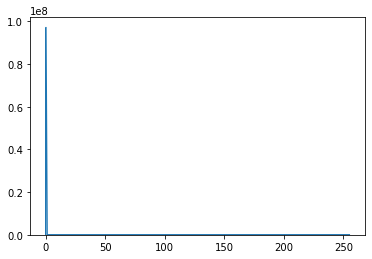

In [33]:
h = [(diam==v).sum() for v in range(256)]
plt.figure()
plt.plot(h)
plt.bar(range(256),h)
plt.show()

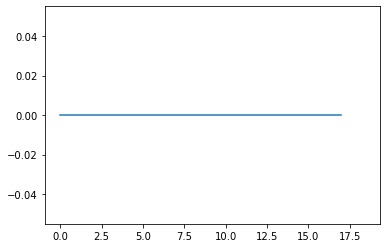

In [38]:
diam = diam*(array_dm.max()/255)
h = [(diam==v).sum() for v in range(1,19)]
plt.figure()
plt.plot(h)
plt.bar(range(1,19),h)
plt.show()

In [2]:
input_segm = r"D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\Otsu_tubeness10 of Grad_crop.tif"
segm_itk = itk.imread(input_segm)
print(segm_itk)

RuntimeError: Could not create IO object for reading file D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\Otsu_tubeness10 of Grad_crop.tif
The file doesn't exist. 
Filename = D:\Cecile\Results\Dent saine\HB02 B VECAD EPHB4 SMA SAINE RACINE_001\Label3\Otsu_tubeness10 of Grad_crop.tif

In [4]:
hess_matrix = itk.HessianRecursiveGaussianImageFilter(segm_itk)

In [13]:
print(hess_matrix.shape)
print(hess_matrix)

(101, 1863, 516, 6)
Image (000001E9B82991C0)
  RTTI typeinfo:   class itk::Image<class itk::SymmetricSecondRankTensor<double,3>,3>
  Reference Count: 1
  Modified Time: 258
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 416
  UpdateMTime: 254
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [516, 1863, 101]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [516, 1863, 101]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [516, 1863, 101]
  Spacing: [1, 1, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (000001E9B42CC3F0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int

In [18]:
#image=hess_matrix.GetOutput()
t = hess_matrix.GetPixel([1,0,35])
print("%f,%f,%f,%f,%f,%f"%(t[0],t[1],t[2],t[3],t[4],t[5]))
print("%f,%f,%f,%f,%f,%f"%(t(0,0),t(0,1),t(0,2),t(1,1),t(1,2),t(2,2)))

# size=hess_matrix.GetOutput().GetBufferedRegion().GetSize()
# print("%d,%d,%d"%(size[0],size[1],size[2]))

v=itk.FixedArray[itk.D,3]()
e=itk.Matrix[itk.D,3,3]()
t.ComputeEigenAnalysis(v,e)
print("%f,%f,%f"%(v[0],v[1],v[2]))
arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
print(arr)


-0.000026,-0.000000,-0.000006,-0.000000,-0.000000,-60.440567
-0.000026,-0.000000,-0.000006,-0.000000,-0.000000,-60.440567
-60.440567,-0.000026,-0.000000
[[-9.65724556e-08 -6.77844091e-10 -1.00000000e+00]
 [-9.99999783e-01 -6.58505468e-04  9.65728810e-08]
 [ 6.58505468e-04 -9.99999783e-01  6.14250454e-10]]


In [29]:
array_segm = itk.array_view_from_image(segm_itk)

for y in range(1863):
    for x in range(516):
        for z in range(101):
            skel_intensity = array_skeleton[z,y,x]
            if skel_intensity != 0:
                t = hess_matrix.GetPixel([x,y,z])
                v=itk.FixedArray[itk.D,3]()
                e=itk.Matrix[itk.D,3,3]()
                t.ComputeEigenAnalysis(v,e)
                print("%f,%f,%f"%(v[0],v[1],v[2]))
                arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
                print(arr)
                

-0.000000,0.000000,0.051016
[[ 9.99999254e-01 -1.22163564e-03 -5.18021459e-10]
 [-1.22163564e-03 -9.99999254e-01  2.37114451e-12]
 [-5.18023902e-10 -1.73830915e-12 -1.00000000e+00]]
-0.000000,0.000000,0.051016
[[ 9.99992504e-01  3.87205208e-03 -5.16735377e-10]
 [ 3.87205208e-03 -9.99992504e-01  2.65497607e-12]
 [-5.16721166e-10 -4.65578270e-12 -1.00000000e+00]]
-0.000000,0.000000,0.051016
[[ 9.96699223e-01  8.11828737e-02 -3.70114191e-11]
 [ 8.11828737e-02 -9.96699223e-01 -2.37098546e-12]
 [ 3.70817950e-11  6.41529140e-13  1.00000000e+00]]
-0.467645,-0.011787,0.041892
[[ 2.99446241e-02  1.01275547e-02 -9.99500251e-01]
 [-3.14642416e-01  9.49210258e-01  1.91425576e-04]
 [ 9.48737830e-01  3.14479442e-01  3.16103027e-02]]
-69.274715,5.401586,15.298698
[[ 0.2004153   0.06820873  0.97733376]
 [-0.24804626  0.96860364 -0.01673426]
 [-0.94779046 -0.23907018  0.2110419 ]]
-0.000000,0.000000,0.005382
[[-9.80160595e-01 -1.98204964e-01 -3.51237744e-09]
 [ 1.98204964e-01 -9.80160595e-01  2.1136180

-0.000000,0.000000,0.000001
[[-4.39187124e-01  8.98395609e-01  1.52758193e-06]
 [-8.98393181e-01 -4.39185941e-01  2.32417315e-03]
 [ 2.08869784e-03  1.01937455e-03  9.99997299e-01]]
-9.687594,-0.287310,-0.021751
[[-1.01965777e-02 -4.50681560e-03 -9.99937857e-01]
 [-9.22644307e-01 -3.85490924e-01  1.11458435e-02]
 [ 3.85517201e-01 -9.22700621e-01  2.27499589e-04]]
-102.729889,0.003061,0.036071
[[ 6.61026967e-05 -3.17316277e-05  9.99999997e-01]
 [-4.45327930e-01 -8.95367542e-01  1.02590765e-06]
 [ 8.95367539e-01 -4.45327929e-01 -7.33171891e-05]]
-0.000006,-0.000000,0.050847
[[ 9.99117085e-01  4.20124583e-02  6.14963716e-05]
 [-4.20124580e-02  9.99117087e-01 -6.00058265e-06]
 [ 6.16941749e-05 -3.41167092e-06 -9.99999998e-01]]
-76.280498,-1.175529,10.175314
[[ 0.18529248  0.01136477  0.9826177 ]
 [-0.23436159  0.97159072  0.03295639]
 [-0.95432769 -0.23639442  0.18269192]]
-92.153595,-0.000012,0.000345
[[ 1.39540635e-06 -1.99646260e-08  1.00000000e+00]
 [-7.97855050e-02  9.96812055e-01  1.

 [ 2.33168762e-04  1.29094777e-05 -9.99999973e-01]]
-0.000167,0.002020,0.111810
[[ 1.91922359e-01 -9.81410102e-01 -1.40555503e-04]
 [-9.81261068e-01 -1.91890715e-01 -1.74547713e-02]
 [ 1.71033176e-02  3.48788254e-03 -9.99847644e-01]]
-0.001143,0.005043,0.120673
[[ 2.59247373e-01 -9.65810743e-01 -6.39135521e-04]
 [-9.62548876e-01 -2.58317351e-01 -8.22909949e-02]
 [ 7.93124271e-02  2.19489234e-02 -9.96608139e-01]]
-92.153763,0.000341,0.004778
[[-2.08880694e-06 -2.73848619e-08 -1.00000000e+00]
 [-3.04097542e-01  9.52640900e-01  6.09113116e-07]
 [ 9.52640900e-01  3.04097542e-01 -1.99821059e-06]]
-10.722136,-0.638769,-0.034151
[[-0.0953725  -0.04135084 -0.99458242]
 [-0.9183055  -0.38198373  0.10393954]
 [ 0.38421229 -0.92324349  0.00154197]]
-0.000000,-0.000000,0.000001
[[-0.74994468 -0.661341   -0.01452824]
 [-0.66142148  0.75001373  0.00101138]
 [-0.01022751 -0.01036777  0.99989395]]
-102.707214,-0.000891,0.015297
[[-1.56846850e-05 -6.62618424e-06 -1.00000000e+00]
 [-3.95014479e-01  9.18

KeyboardInterrupt: 

In [31]:
hess_matrix = itk.HessianRecursiveGaussianImageFilter(skeleton_itk, sigma=2)

In [32]:
for y in range(1863):
    for x in range(516):
        for z in range(101):
            skel_intensity = array_skeleton[z,y,x]
            if skel_intensity != 0:
                t = hess_matrix.GetPixel([x,y,z])
                v=itk.FixedArray[itk.D,3]()
                e=itk.Matrix[itk.D,3,3]()
                t.ComputeEigenAnalysis(v,e)
                print("%f,%f,%f"%(v[0],v[1],v[2]))
                arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
                print(arr)

-0.408548,-0.382023,-0.004331
[[-0.99964031 -0.00404728 -0.02651153]
 [-0.02495266 -0.22193305  0.97474257]
 [ 0.00982884 -0.97505351 -0.22175224]]
-0.402055,-0.369164,0.002876
[[-0.99965927 -0.01190819 -0.02322795]
 [-0.01959351 -0.24562371  0.96916721]
 [ 0.01724636 -0.96929211 -0.2453067 ]]
-0.383037,-0.338681,0.006319
[[ 0.87560634 -0.11079015  0.47014793]
 [ 0.48260626  0.24120066 -0.84196997]
 [ 0.02011801 -0.96413058 -0.26466485]]
-0.300429,-0.280160,0.071496
[[-0.61290933 -0.10071949 -0.78370768]
 [-0.61619066  0.68180232  0.39427739]
 [ 0.4946223   0.72456965 -0.47994542]]
-0.237585,-0.219367,0.134347
[[-0.48425286 -0.86828188 -0.10763709]
 [ 0.01869612 -0.13326511  0.99090406]
 [ 0.87472832 -0.47783573 -0.08076752]]
-0.405891,-0.388399,0.026094
[[-0.99919763 -0.03614867 -0.01724448]
 [-0.00614008 -0.2872142   0.9578467 ]
 [ 0.03957775 -0.95718403 -0.2867618 ]]
-0.364539,-0.321466,-0.021965
[[-0.66977822 -0.19481444 -0.7165504 ]
 [ 0.63394906 -0.6524887  -0.41517115]
 [ 0.3866

-0.419280,-0.414918,-0.003376
[[-0.24543219 -0.08717033  0.9654866 ]
 [-0.93619383 -0.23717699 -0.25939966]
 [ 0.25160316 -0.96754763 -0.02339746]]
-0.357995,-0.355266,-0.102890
[[-0.85057516 -0.09277423 -0.5176049 ]
 [-0.51435251 -0.05795526  0.8556183 ]
 [ 0.10937725 -0.99399906 -0.00157664]]
-0.556215,-0.349737,-0.217548
[[ 0.05986144  0.00623245 -0.99818724]
 [-0.6777332   0.73442325 -0.03605819]
 [ 0.73286719  0.67866313  0.04818757]]
-0.681617,-0.477688,-0.348521
[[ 0.19946329  0.04226871  0.97899323]
 [ 0.94585912 -0.26936915 -0.18108224]
 [-0.25605646 -0.96210894  0.09370951]]
-0.354177,-0.296584,0.050588
[[ 0.5408841   0.23654761  0.80714907]
 [ 0.16159468  0.91253578 -0.37572012]
 [ 0.8254281  -0.33365204 -0.45535126]]
-0.344008,-0.287531,0.017552
[[-0.51082782 -0.1698018  -0.84274687]
 [-0.24471721 -0.91102182  0.33189267]
 [ 0.82411676 -0.37577467 -0.42382187]]
-0.644024,-0.350037,0.027377
[[ 0.98689159  0.03524994 -0.15748787]
 [ 0.1551524   0.06133419  0.98598471]
 [-0.04

-0.418798,-0.414169,0.001321
[[-2.94693480e-02 -8.62313183e-03  9.99528488e-01]
 [-9.58418264e-01 -2.83710486e-01 -3.07049120e-02]
 [ 2.83841486e-01 -9.58871212e-01  9.61960134e-05]]
-0.314730,-0.310582,-0.089958
[[-2.04549866e-03 -6.04108664e-04  9.99997725e-01]
 [-9.93739621e-01 -1.11701187e-01 -2.10017750e-03]
 [ 1.11702202e-01 -9.93741656e-01 -3.71842085e-04]]
-0.432955,-0.431174,-0.013969
[[ 6.51427459e-01  2.90836042e-02  7.58153289e-01]
 [-7.57362819e-01 -3.46156391e-02  6.52076159e-01]
 [ 4.52086856e-02 -9.98977428e-01 -5.22737318e-04]]
-0.521384,-0.463412,0.134167
[[ 0.20289058 -0.00411034  0.97919279]
 [-0.96512654 -0.16977891  0.19926334]
 [ 0.16542724 -0.98547361 -0.03841354]]
-0.739363,-0.551479,0.505522
[[-0.71080201 -0.20451035  0.67300522]
 [ 0.63202764  0.2342296   0.73869991]
 [ 0.30870952 -0.95042728  0.03723467]]
-0.646989,-0.366645,0.159589
[[-0.59980686  0.00331326  0.80013796]
 [-0.75521907 -0.3327072  -0.56475665]
 [ 0.26434047 -0.94302436  0.2020623 ]]
-0.41853

-0.418415,-0.414310,-0.002723
[[-2.85573612e-03 -6.93374577e-04  9.99995682e-01]
 [-9.58348272e-01 -2.85587073e-01 -2.93482127e-03]
 [ 2.85587875e-01 -9.58352515e-01  1.51066993e-04]]
-0.420201,-0.409330,0.001060
[[-3.39625592e-03 -2.57185781e-04  9.99994200e-01]
 [-9.70344136e-01 -2.41704330e-01 -3.35771941e-03]
 [ 2.41703792e-01 -9.70349911e-01  5.71331050e-04]]
-0.437348,-0.434761,-0.000474
[[ 9.63553480e-01  2.13805733e-03  2.67507233e-01]
 [ 2.67506677e-01  5.47414784e-04 -9.63555851e-01]
 [ 2.20657506e-03 -9.99997565e-01  4.44811898e-05]]
-0.432517,-0.424315,0.025478
[[ 0.96641836  0.09837957  0.23739632]
 [ 0.23880762 -0.00265522 -0.97106327]
 [ 0.09490245 -0.99514542  0.02605985]]
-2.234372,-1.399273,0.421300
[[-0.1106741  -0.08265752  0.99041354]
 [-0.64366759 -0.75334011 -0.1347988 ]
 [ 0.75726038 -0.65241583  0.03017127]]
-1.090571,-0.432611,0.754107
[[-0.48232527 -0.09296668  0.87104508]
 [ 0.36584622  0.88210497  0.29672775]
 [ 0.79593899 -0.46178784  0.39145001]]
-0.41792

KeyboardInterrupt: 

Float image out of standard range; displaying image with stretched contrast.


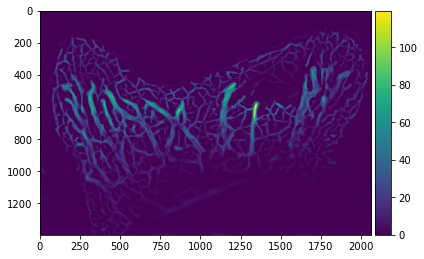

In [35]:
im_hist = imread(r"D:\Cecile\Caries\Stade4\all_tubeness of cARIE STADE 4.tif")
imshow(im_hist)

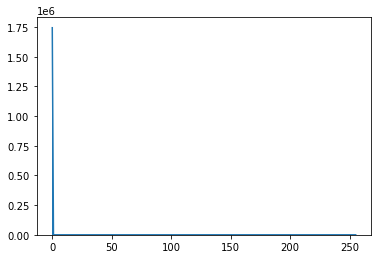

In [37]:
h = [(im_hist==v).sum() for v in range(256)]
plt.figure()
plt.plot(h)
plt.bar(range(256),h)
plt.show()

In [39]:
print(im_hist.max(), im_hist.min())

119.45206 0.0


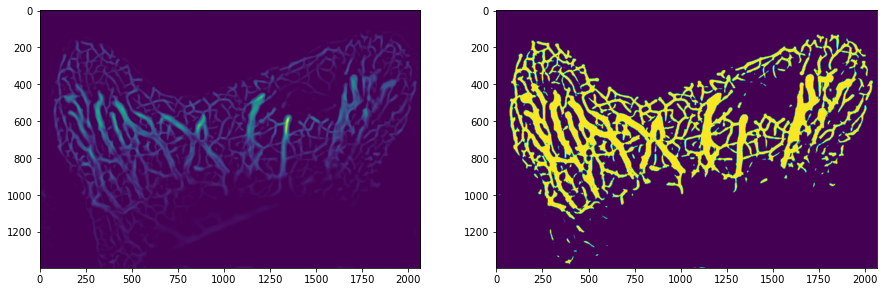

In [55]:
mask = np.zeros(im_hist.shape)
mask = im_hist > 7
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im_hist)
plt.subplot(1,2,2)
plt.imshow(mask)
plt.show()

In [56]:
imsave(r"D:\Cecile\Caries\Stade4\mask.tif", mask)

D:\Cecile\Caries\Stade4\mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
